# Description:

* In this project, I will be working with a dataset taken from Kaggle, where I will perform a credit risk analysis. The data provided comes from LendingClub, a financial services company based in San Francisco, California. LendingClub was the first peer-to-peer lending platform to register its offerings as securities with the Securities and Exchange Commission (SEC) and to offer loan trading on a secondary market. The company offers personal loans of up to $40,000, with terms ranging from 24 to 60 months, and operates entirely online, with no physical branches.

* In this project, I will apply the CRISP-DM method, which follows the following steps:

  * 1-**Business understanding**: 
    
    What does the business need?
  
  * 2-**Data understanding**: 
    
    What data do we have / need? Is it clean?
  
  * 3-**Data preparation**: 
    
    How do we organize the data for modeling?
  
  * 4-**Modeling**: 
    
    What modeling techniques should we apply?
  
  * 5-**Evaluation**: 
    
    What best meets the business objectives?
  
  * 6-**Deployment**: 
    
    How do stakeholders access the results?

* In the first step of EDA (Exploratory Data Analysis), I will proceed to step 3, which is data preparation. The goal of the project is to conduct analyses and develop a model using only the data collected during the loan release process. This dataset has a large number of variables, and I will focus on the information relevant to decision-making during the loan release process. The resulting model will be aimed at predicting both loans that will be paid and those that will not be paid, aiming to improve the bank's performance in both situations.

* The model to be developed will be with PyTorch, where we will create a neural network manually and adjust the parameters and hyperparameters according to the needs of the data in this project.

# Installs:

In [0]:
# spark-excel: install in the cluster > Libraries > Install new > Marven  insert: >>> com.crealytics:spark-excel_2.12:0.14.0

# Imports:

In [0]:
# Pyspark.SQL
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, DoubleType, IntegerType, DateType

# Pyspark.Ml
from pyspark.ml.feature import StringIndexer

# Pandas Api Pyspark
from pyspark import pandas as ps

# Sklearning features
from sklearn.feature_selection import chi2

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn 
import seaborn as sns

# Ploty
import plotly.graph_objects as go

# Numpy 
import numpy as np


# Options:

In [0]:
pd.set_option('display.max_rows', None)

# 1 - Business Understanding


## Lending Club

LendingClub is a company that specializes in providing online loans, which further reinforces the need for an accurate assessment during the analysis of the approval of requested loans.

During a loan application, the company makes only two decisions: grant the loan to the applicant or block the release of the loan. This decision is based on the data present in the registry and the information provided by the potential borrower.

We will only use the records with the following final payment statuses:

* Fully Paid
* Downloaded

The other payment statuses have not yet had final payment completion because they have not yet been completed, so there is no possibility of classifying them.

#### What is the objective of this project?

* A machine learning model will be created that seeks to make predictions that during the loan application will indicate whether the borrower will be a good payer or not.

* The main objective is to create analyses that use only the information collected at the time of the loan application. The model focuses on preventing the release of loans to potentially defaulting borrowers, using only the variables available at the time of the request.

* I will seek to generate several insights so that we have information about the institution's objective, which is to reduce unpaid loans and potential losses in relation to recent years.

#### To deal with default, we have some possible solutions:

* Do not release loans classified as risky loans that will potentially not be paid.

* If released, charge a higher interest rate for these cases.

#### For loans classified as low-risk loans that will potentially be fully paid, we can consider:

* In addition to releasing the loans, increase the loan amount in these cases.

* Reduce the interest rate, aiming to improve the relationship with the target customer and increase the company's profitability with higher-value loans.

* Offer more services to this borrower.

## Default in General

#### I also sought some information outside of LendingClub, exploring the problem of default in general. My goal was to find solutions based on the institutional context, as well as to analyze the problems associated with this broader issue.

* For this analysis, I used the following studies:

1. **Global Credit Outlook 2024: New Risks, New Playbook | S&P Global Ratings**: This study addresses default in general, focusing on the scenario for the year 2024.

2. **ciELO - Brazil - Credit risk and technical efficiency in Brazilian credit unions**: This study has a more Brazil-centric approach, but also explores the general context of the problems caused by default. It reinforces the importance of financial institutions doing a good job in preventing default in order to avoid damage and losses, often leading to bankruptcy.


* Rapid changes in the global financial scenario, the evolution of monetary policy and growing inflation are impacting credit. According to research published in Global Credit Outlook 2024: New Risks, New Playbook by S&P Global Ratings (spglo-bal.com)¹, it is expected that in 2024 there will be further credit deterioration and an increase in defaults, especially for vulnerable credit issuers, that is, the sectors of the economy that depend on consumer spending.

* Borrowers will need to adapt to tighter financing conditions, and risks include persistent inflation, economic slowdown and geopolitical tensions. The research also reports that, in 2024, 40% of credits will be at risk of downgrade for sectors exposed to a drop in consumer spending, these being the most vulnerable. Meanwhile, higher investment grade credits (i.e. those with good credit quality) should continue to show resilience, although there may be margin compression (less profit) for these issuers.

* Analyzing the temporal context of credit and default, some challenges and problems remain the same, while other risks are emerging. This highlights the need to discuss new strategies and develop tools to adapt to this environment, where we have recurring problems that lead to the deterioration of credit and the emergence of new risks that will influence the current scenario.

* Bringing part of this context to Brazil, but still maintaining the global theme, in 2020 an article was published on credit risk and technical efficiency in Brazilian credit cooperatives ². In this study, the relationship between credit risk and the efficiency of these cooperatives was analyzed from 2008 to 2017. The two-stage Data Enve-lopment Analysis (DEA) model was used to obtain efficiency scores, with the analysis of a Tobit model in the second stage.

* The results indicated that the greater the credit risk, the lower the efficiency scores. Furthermore, credit cooperatives that managed to maintain their continuity in the market and diversify their products presented higher efficiency scores, generating more benefits for members. It was also observed that the increase in the number of service points reduced efficiency scores. During the period of Brazilian economic downturn between 2015 and 2017, there was a negative impact on the average efficiency scores of cooperatives.

* As a limitation, the results are based on selected accounting and financial information, and it is suggested that new variables related to the social dimension of cooperatives be incorporated in future studies to evaluate the global efficiency of Brazilian credit cooperatives.
Based on these two studies and taking into account the current context regarding credit and its deterioration, it is possible to draw some conclusions regarding the problems that are recurring in the sector, and have a perspective on the new risks that are emerging.

* Credit unions, together with banks, are exposed to the same risks, and both must adhere to the efficient management of the risks inherent to their activities. The lack of control over risks directly affects the level of security and guarantee of the operations carried out. The main purpose of this control is to ensure efficiency in the provision of services by these financial institutions.

* Risk management is of singular importance for the survival and solidity of financial systems. For this reason, it constitutes one of the main focuses of concern both for the institutions themselves and for global banking supervision.

* Credit risk is linked to the probability of failure to fulfill the payment promise made by the borrower at the time of contracting or to the potential financial loss resulting from loan default. This type of risk has been the most related to bank failure problems, and is also one of the most common, considering that the activities of organizations such as banks and credit unions consist of granting loans.

* Here in Brazil, we have CMN Resolution No. 2682, which states that financial institutions and other companies authorized to operate by the Central Bank of Brazil (BACEN) must classify credit operations in ascending order of risk at the following levels: AA, A, B, C, D, E, F, G and H. Such classification is the responsibility of the institution holding the credit and must be carried out based on consistent and verifiable criteria.

* In the United States, credit rating is an assessment made by the market of the risk of an individual, company or country in relation to the ability to honor commitments made to other institutions. The better the rating, the better evaluated the debtor is in relation to their ability to pay the debt, or the lower the chance of default. Risk rating agencies, such as Standard & Poor’s, Moody’s and Fitch Ratings, assign credit ratings based on specific criteria. These grades range from AAA (minimum risk) to D (maximum risk), indicating the possibility of default.

* Given the circumstances above, it is understood that adequate risk management and the maintenance of satisfactory performance are determining factors for the continuity of financial institutions. Considering the importance of credit risk management and analysis, we must pay attention to recurring problems of a historical nature and new market challenges in the coming years. Seeking solutions that bring greater security to operations during credit granting, aiming to maintain the quality of services provided by financial institutions and their longevity.


##### Sources: 
##### ¹ Global Credit Outlook 2024: New Risks, New Playbook | S&P Global Ratings (spglobal.com): 

https://www.spglobal.com/ratings/en/research-insights/special-reports/global-credit-outlook-2024

##### ² SciELO - Brazil - Risco de crédito e eficiência técnica nas cooperativas de crédito brasileiras Risco de crédito e eficiência técnica nas cooperativas de crédito brasileiras:

https://www.scielo.br/j/cebape/a/cQzwGPNRSWrKBVZrTRLjZQx/


# 2 - Data Understanding


## The dataset

**We have records from 12-2006 to 12-2015 with information about the payment history of this institution's customers**

**Data file**: - loan.csv

**Data dictionary**: - LoanStats tab in LCDataDictionary.xlsx

**Target dependent variable**: - 'loan_status'

**Source** : https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data?select=loan

In [0]:
%python
url = 'https://handsonbanking.org/wp-content/uploads/2020/06/credit_arroworange.jpg'
displayHTML(f'<img src="{url}" alt="Image"/>')

## Loading data file and data dictionary


In [0]:
# Creating a directory to store the files
dbutils.fs.mkdirs('dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/')
###### >>>>>>> Note: At this point, upload the files present in the notebook repository folder to this directory

True

In [0]:
# Viewing the location of files
display(dbutils.fs.ls('dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/'))

path name size modificationTime dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/LCDataDictionary.xlsx LCDataDictionary.xlsx 20995 1733174635000 dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/loan.csv loan.csv 441771600 1733174977000

In [0]:
# Dataset
# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/loan.csv'
file_type = 'csv'

# CSV options
infer_schema = 'True'
first_row_is_header = 'True'
delimiter = ','
encoding = 'UTF-8'
multiLine = 'True'
escape = '"'

# Reading Dataset
df = spark.read.format(file_type) \
    .option('inferSchema', infer_schema) \
    .option('header', first_row_is_header) \
    .option('encoding', encoding) \
    .option('multiLine', multiLine) \
    .option('escape', escape) \
    .option(delimiter, delimiter) \
    .load(file_location)
    
df.limit(10).display()

# Data dictionary

# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/LCDataDictionary.xlsx'
file_type = 'com.crealytics.spark.excel'

# Excel options
infer_schema = 'True'
first_row_is_header = 'True'

dictionary = spark.read.format(file_type) \
    .option('header', first_row_is_header) \
    .option('inferSchema', infer_schema) \
    .load(file_location)
dictionary.limit(10).display()  

id member_id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m 1077501 1296599 5000.0 5000.0 4975.0 36 months 10.65 162.87 B B2 null 10+ years RENT 24000.0 Verified Dec-2011 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501 Borrower added on 12/22/11 > I need to upgrade my business technologies. credit_card Computer 860xx AZ 27.65 0.0 Jan-1985 1.0 null null 3.0 0.0 13648.0 83.7 9.0 f 0.0 0.0 5861.07141425 5831.78 5000.0 861.07 0.0 0.0 0.0 Jan-2015 171.62 null Jan-2016 0.0 null 1.0 INDIVIDUAL null null null 0.0 null null null null null null null null null null null null null null null null null 1077430 1314167 2500.0 2500.0 2500.0 60 months 15.27 59.83 C C4 Ryder < 1 year RENT 30000.0 Source Verified Dec-2011 Charged Off n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430 Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces car bike 309xx GA 1.0 0.0 Apr-1999 5.0 null null 3.0 0.0 1687.0 9.4 4.0 f 0.0 0.0 1008.71 1008.71 456.46 435.17 0.0 117.08 1.11 Apr-2013 119.66 null Sep-2013 0.0 null 1.0 INDIVIDUAL null null null 0.0 null null null null null null null null null null null null null null null null null 1077175 1313524 2400.0 2400.0 2400.0 36 months 15.96 84.33 C C5 null 10+ years RENT 12252.0 Not Verified Dec-2011 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175 null small_business real estate business 606xx IL 8.72 0.0 Nov-2001 2.0 null null 2.0 0.0 2956.0 98.5 10.0 f 0.0 0.0 3003.65364445 3003.65 2400.0 603.65 0.0 0.0 0.0 Jun-2014 649.91 null Jan-2016 0.0 null 1.0 INDIVIDUAL null null null 0.0 null null null null null null null null null null null null null null null null null 1076863 1277178 10000.0 10000.0 10000.0 36 months 13.49 339.31 C C1 AIR RESOURCES BOARD 10+ years RENT 49200.0 Source Verified Dec-2011 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863 Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time. other personel 917xx CA 20.0 0.0 Feb-1996 1.0 35.0 null 10.0 0.0 5598.0 21.0 37.0 f 0.0 0.0 12226.3022123 12226.3 10000.0 2209.33 16.97 0.0 0.0 Jan-2015 357.48 null Jan-2015 0.0 null 1.0 INDIVIDUAL null null null 0.0 null null null null null null null null null null null null null null null null null 1075358 1311748 3000.0 3000.0 3000.0 60 months 12.69 67.79 B B5 University Medical Group 1 year RENT 80000.0 Source Verified Dec-2011 Current n https://www.lendingclub.com/browse/loanDetail.action?loan_id

LoanStatNew Description addr_state The state provided by the borrower in the loan application annual_inc The self-reported annual income provided by the borrower during registration. annual_inc_joint The combined self-reported annual income provided by the co-borrowers during registration application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers collection_recovery_fee post charge off collection fee collections_12_mths_ex_med Number of collections in 12 months excluding medical collections delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years desc Loan description provided by the borrower dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

## Adjusting the dataset for the project

* Before starting the analyzes and training the models, the data set will be adjusted to the proposal that will be the objective of this project. The objective is to create one or more models capable of predicting whether the borrower will pay all the loan installments or become a defaulter, failing to pay the loan.

* From now on, the dataset will only be separated with records that correspond to loans that have already been closed. The loan_status variable allows you to define the payment statuses that characterize these loans. 

* They are: 

* **Fully Paid**

* **Charged Off**

##### Note:

The payment statuses below will not be used because they do not comply with the institution's credit policy. Since this is a credit risk analysis model, it is important to build it now so that it adapts to the loan requests that will be made by the institution in the future.

* Does not meet the credit policy. Status:Fully Paid

* Does not meet the credit policy. Status:Charged Off

In [0]:
# Check all Status of payments 
df.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / df.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()

loan_status frequency percentage Current 601779 67.82 Fully Paid 207723 23.41 Charged Off 45248 5.1 Late (31-120 days) 11591 1.31 Issued 8460 0.95 In Grace Period 6253 0.7 Late (16-30 days) 2357 0.27 Does not meet the credit policy. Status:Fully Paid 1988 0.22 Default 1219 0.14 Does not meet the credit policy. Status:Charged Off 761 0.09

In [0]:
# List of selected status
list_status = ['Fully Paid','Charged Off']

# Applying the filter
df = df.filter(F.col('loan_status').isin(list_status))

### Checking for null data

In [0]:
def check_null_data(dataset):

    size_dataset = dataset.count()
    """
    Checks for null values ​​in columns of a DataFrame.

    Args:
    dataset (pyspark.sql.DataFrame): The input DataFrame.

    Returns:
    None: Displays the count of null values ​​per column.
    """
    dataset.agg(*[F.round(((F.count(F.when(F.col(c).isNull(), c)) / size_dataset) * 100), 2).alias(c) for c in dataset.columns]) \
        .display()

    return None

In [0]:
check_null_data(df)

id member_id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.51 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 65.09 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 55.67 87.51 0.0 0.0 0.0 0.08 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.21 0.0 100.0 0.01 0.02 81.21 0.0 0.0 100.0 100.0 100.0 0.0 25.18 25.18 99.94 99.94 99.94 99.94 99.94 99.94 99.95 99.94 99.94 99.94 99.94 25.18 99.94 99.94 99.94

## Dictionary Variables

In [0]:
dictionary.display()

LoanStatNew Description addr_state The state provided by the borrower in the loan application annual_inc The self-reported annual income provided by the borrower during registration. annual_inc_joint The combined self-reported annual income provided by the co-borrowers during registration application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers collection_recovery_fee post charge off collection fee collections_12_mths_ex_med Number of collections in 12 months excluding medical collections delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years desc Loan description provided by the borrower dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income earliest_cr_line The month the borrower's earliest reported credit line was opened emp_length Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. emp_title The job title supplied by the Borrower when applying for the loan.* fico_range_high The upper boundary range the borrower’s FICO at loan origination belongs to. fico_range_low The lower boundary range the borrower’s FICO at loan origination belongs to. funded_amnt The total amount committed to that loan at that point in time. funded_amnt_inv The total amount committed by investors for that loan at that point in time. grade LC assigned loan grade home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. id A unique LC assigned ID for the loan listing. initial_list_status The initial listing status of the loan. Possible values are – W, F inq_last_6mths The number of inquiries in past 6 months (excluding auto and mortgage inquiries) installment The monthly payment owed by the borrower if the loan originates. int_rate Interest Rate on the loan is_inc_v Indicates if income was verified by LC, not verified, or if the income source was verified issue_d The month which the loan was funded last_credit_pull_d The most recent month LC pulled credit for this loan last_fico_range_high The upper boundary range the borrower’s last FICO pulled belongs to. last_fico_range_low The lower boundary range the borrower’s last FICO pulled belongs to. last_pymnt_amnt Last total payment amount received last_pymnt_d Last month payment was received loan_amnt The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. loan_status Current status of the loan member_id A unique LC assigned Id for the borrower member. mths_since_last_delinq The number of months since the borrower's last delinquency. mths_since_last_major_derog Months since most recent 90-day or worse rating mths_since_last_record The number of months since the last public record. next_pymnt_d Next scheduled payment date open_acc The number of open credit lines in the borrower's credit file. out_prncp Remaining outstanding principal for total amount funded out_prncp_inv Remaining outstanding principal for portion of total amount funded by investors policy_code publicly available policy_code=1
new products not publicly available policy_code=2 pub_rec Number of derogatory public records purpose A category provided by the borrower for the loan request. pymnt_plan Indicates if a payment plan has been put in place for the loan recoveries post charge off gross recovery revol_bal Total credit revolving balance revol_util Revolving line utilization rate, or the a


### Conclusions and decision-making regarding data cleaning and selection:

* Variables that do not take into account the context and purpose of the project will be excluded. These columns will not be analyzed.

* In addition, secondary variables will be excluded so that the model is based only on the individual characteristics of the primary borrower.

### Variable selection: loan_amnt, funded_amnt and funded_amnt_inv:

* In this dataset, we have the variables **loan_amnt**, **funded_amnt** and **funded_amnt_inv**, which are very similar to each other, but have some differences:

* **funded_amnt**: Reflects the actual amount that was released in the loan to the borrower.

* **loan_amnt**: It is the amount of the loan that the borrower requests, but this amount was not necessarily granted.

* **funded_amnt_inv**: It is the amount that investors commit to finance for this requested loan.

* Since this is a credit risk analysis, I will be choosing the variable **loan_amnt** for our analyses and future training of our models, since at the time of the loan request, the other variables **funded_amnt** and **funded_amnt_inv** are not present, as they are only adjusted after the loan is granted.

However, I will be keeping the variable **funded_amnt** for our future analyses, as it can provide us with valuable insights for solving our problem.

### Variables outside the context of the problem that were collected after the loan was granted:

* **pymnt_plan**: This variable indicates whether the borrower selected a payment plan due to having difficulty paying the installments of his loan.

* **out_prncp** | **out_prncp_inv**: These variables represent the amount that is still pending payment.

* **total_rec_prncp** | **total_pymnt_inv** | **total_pymnt**: These variables represent the total amount that has been paid on the loan.

* **total_rec_int**: This variable refers to the total interest that has been paid on the loan installments.

* **total_rec_late_fee**: This variable refers to the late fees received by the lender to date.

* **recoveries**: This variable represents the amount that has been recovered from a loan in cases of default.

* **collection_recovery_fee**: This variable represents the amount spent on collections made when a loan becomes delinquent.

* **last_credit_pull_d**: Data from the last Lending Club credit check on the borrower.

* **last_pymnt_d** | **last_pymnt_amnt** | **next_pymnt_d**: These variables provide us with information about the payment of the loan installments, such as the last installment payment data or the last amount paid and the next payment data.

#### Redundant variables:

* I will also remove redundant columns such as **id**, **member_id**, **desc**, **url**, **policy_code** and **application_type**, because they do not provide us with relevant information to solve our problem.

#### Variables with null values:

* We can observe that some columns have a large number of null or incomplete values. I chose to keep only the columns with at least **50% valid data**, because values ​​below this percentage can compromise the analysis and training of the models.

* Missing values ​​may occur for a few specific reasons:

  * The applicant did not provide the requested information.

  * The information provided was not recorded.

  * Some of the information provided may be inconsistent with the expected information, or the values ​​provided do not match the variable in question, and were therefore recorded as missing values.

  * In some cases, the missing values ​​are actually 0.

* During the analysis, I will be checking the causes and possible solutions for these missing values.

### Removing variables that are not part of the project context

In [0]:
redundant_variables = [
    'id', 'member_id', 'funded_amnt_inv', 'url',  'desc','policy_code','annual_inc_joint', 'dti_joint', 'verification_status_joint', 'application_type', 'zip_code', 
]

variables_after_grant = [
    'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp','total_pymnt', 'total_rec_int',  'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
]

columns_deleted = []
columns_deleted.extend(redundant_variables)
columns_deleted.extend(variables_after_grant)
columns_deleted
df = df.drop(*columns_deleted)
print(f'The size dataset now: {df.count(), len(df.columns)}')

The size dataset now: (252971, 49)


### Removing columns with lots of null data

In [0]:
def drop_null_cols(dataset):

    """
    Removes columns with null values ​​greater than 50% of a
    DataFrame.

    Args:
    dataset (pyspark.sql.DataFrame): The input DataFrame.

    Returns:
    pyspark.sql.DataFrame: DataFrame without null columns.
    """

    # Number of records
    size_dataset = dataset.count()

    for column in dataset.columns:
        # Number of Null records
        null_data = dataset.filter(F.col(column).isNull()).count()

        if (null_data / size_dataset) > 0.50: # Defined rule to keep only columns with 50% of valid data.
            dataset = dataset.drop(column)
        else:
            continue
    
    # Check data of Nulls
    check_null_data(dataset)
    
    return dataset

In [0]:
df = drop_null_cols(df)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status purpose title addr_state dti delinq_2yrs earliest_cr_line inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.51 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.08 0.0 0.0 0.02 0.0 25.18 25.18 25.18

The size dataset Now

In [0]:
df.count(), len(df.columns)

(252971, 32)

## Saving dataset in Parquet format for more performance at consultations


In [0]:

# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Bronze/Data-parquet'
file_type = 'parquet'

# Mode
mode = 'overwrite'

# Options Parquet Files
compression = 'gzip'

# Writing dataset
df.write.format(file_type) \
    .option('compression', compression) \
    .mode(mode) \
    .save(file_location) 

# Reading Dataset
df = spark.read.format(file_type) \
    .option('compression', compression) \
    .load(file_location)

### Checking payments status

In [0]:
# Check all Status of payments 
df.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / df.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()

loan_status frequency percentage Fully Paid 207723 82.11 Charged Off 45248 17.89

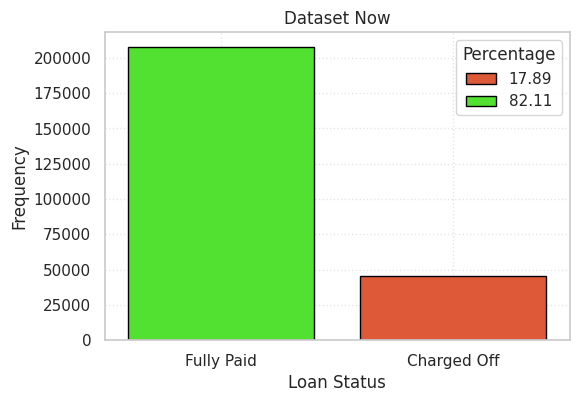

In [0]:
# Defining Data

# Checking 'loan_status' in the dataset
check_df = df.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round( (F.col('frequency') / df.count()) * 100, 2 )) 
data_ax = check_df.toPandas()

# Color
palette = ['#f8481c', '#40fd14']

# Create subplots
plt.rc('font', size = 10)
fig, ax= plt.subplots(figsize = (6, 4))
grid_style = dict(alpha = 0.5, linestyle = 'dotted')

# Bar plot ax
sns.barplot(
    data = data_ax,
    x = 'loan_status',
    y = 'frequency',
    hue = 'percentage',
    dodge = False,
    palette = palette,
    edgecolor = 'black',
    ax = ax
)
sns.set(style = 'whitegrid')
ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
ax.set_title('Dataset Now')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Frequency')
ax.legend(title = 'Percentage')

plt.show()

### Insight:

* We can see that we have an unbalanced distribution of classes in which we have 82.11% of paid loans and 17.89% of unpaid loans.

* We can consider that out of every 10 clients of this institution, 2 did not pay their loans.

## Classifying variables:

#### Concepts for Classification of variables according to statistics:

**Quantitative or numerical variables**:

* *Discrete*: only take integer values

* *Continuous*: assumes any value in the range of real numbers

**Qualitative or categorical variables**:

* *Nominals*: when categories do not have a natural order

* *Ordinals*: when categories can be ordered.

In [0]:
# Categorical Variables

categorical_nominals =  [
   'verification_status', 'emp_title', 'home_ownership', 'purpose', 'title', 'addr_state', 'initial_list_status', 'loan_status', 

]

categorical_ordinals = [ 
   'grade', 'sub_grade', 'term', 'emp_length', 
]

# Numerical Variables

numerical_discrete = [
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'collections_12_mths_ex_med', 'issue_d'
]


numerical_continuous = [
   'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',

]

### Note:

* I chose to classify the variables one by one, because in a certain way this classification will have an important role in the processing of this data.

## Cheking numerical varibles

In [0]:
df.select(*numerical_continuous, *numerical_discrete).describe().display()

summary loan_amnt funded_amnt int_rate installment annual_inc dti revol_bal revol_util tot_coll_amt tot_cur_bal total_rev_hi_lim delinq_2yrs earliest_cr_line inq_last_6mths open_acc pub_rec total_acc acc_now_delinq collections_12_mths_ex_med issue_d count 252971 252971 252971 252971 252971 252971 252971 252772 189263 189263 189263 252971 252971 252971 252971 252971 252971 252971 252915 252971 mean 13562.768854928036 13522.193749481166 13.764624957041386 418.11221562946395 72538.25102541385 16.544103988204387 15167.97594981243 54.312092518159545 203.8236422332944 138331.1523277133 29709.117397483926 0.2499140217653407 null 0.8524850674583253 10.939566195334644 0.14343936656770934 25.035905301398184 0.003114981559151049 0.006725579740228931 null stddev 8131.72953096545 8109.211388377764 4.401925733812313 244.9330593063498 58811.807620549574 7.7886955263926 18743.002656969544 24.790576502071584 21102.058036695576 152436.7191669848 29517.296672276923 0.740600227384442 null 1.0668751829044056 4.890986200081288 0.4363832310319733 11.747131299791791 0.06055263914552854 0.08900506430474125 null min 500.0 500.0 5.32 15.69 3000.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 Apr-1955 0.0 0.0 0.0 2.0 0.0 0.0 Apr-2008 max 35000.0 35000.0 28.99 1424.57 8706582.0 57.14 1746716.0 892.3 9152545.0 8000078.0 2013133.0 29.0 Sep-2011 8.0 76.0 15.0 150.0 5.0 6.0 Sep-2015

## Note:
* We can see that we have a lot of invalid data in our numeric variables, including string data that may have resulted from typing errors during data collection. Additionally, I have identified some very high values, which we will need to check to determine if they are outliers or also typing errors.

## Checking strings vairables

In [0]:
cols_strings = categorical_nominals + categorical_ordinals
other_features = ['earliest_cr_line', 'emp_length', 'issue_d']
cols_strings.extend(other_features)


In [0]:
def check_categorical_cols (dataset, cols_strings = []):

    """
    Checks the categorical columns in a DataFrame and displays the top 10 categories with their frequencies.

    Args:
    dataset (DataFrame): The DataFrame containing the columns to be checked.
    cols_strings (list, optional): List of strings column names.

    Returns:
    None
    """

    for column in dataset.columns:
        
        if column in cols_strings:
            
            dataset.groupBy(column) \
                .agg(F.count(column).alias('frequency')) \
                .orderBy('frequency', ascending = False) \
                .limit(10) \
                .display()
        else:
            continue
    
    return None

In [0]:
check_categorical_cols(df, cols_strings)

term frequency 36 months 196658 60 months 56313

grade frequency B 76065 C 65320 A 42296 D 40506 E 19186 F 7660 G 1938

sub_grade frequency B3 18068 B4 16933 C1 14959 B2 14628 C2 14341 B5 14340 C3 12778 B1 12096 C4 12056 A5 11993

emp_title frequency Manager 1941 Teacher 1909 Supervisor 852 Registered Nurse 841 RN 841 Sales 677 Project Manager 669 manager 579 Office Manager 568 Driver 534

emp_length frequency 10+ years 76881 2 years 23561 < 1 year 20886 3 years 20380 5 years 18059 1 year 16856 4 years 16197 6 years 14753 7 years 14085 8 years 11849

home_ownership frequency MORTGAGE 124844 RENT 105957 OWN 21985 OTHER 141 NONE 43 ANY 1

verification_status frequency Verified 92896 Not Verified 86064 Source Verified 74011

issue_d frequency Oct-2014 8727 Jul-2014 8527 Apr-2014 6702 Nov-2013 6642 Oct-2013 6636 Dec-2013 6623 Jan-2014 6489 Aug-2013 6401 May-2014 6391 Sep-2013 6350

loan_status frequency Fully Paid 207723 Charged Off 45248

purpose frequency debt_consolidation 148363 credit_card 50076 home_improvement 14929 other 14277 major_purchase 6265 small_business 4746 car 3646 medical 2854 moving 2028 wedding 1955

title frequency Debt consolidation 72074 Credit card refinancing 22794 Debt Consolidation 11092 Home improvement 6741 Other 6036 Consolidation 3570 debt consolidation 3215 Debt Consolidation Loan 3058 Major purchase 2158 Business 1743

addr_state frequency CA 43110 NY 21338 TX 19343 FL 17545 NJ 9601 IL 9253 PA 8399 GA 8014 VA 7942 OH 7738

earliest_cr_line frequency Oct-2000 2112 Oct-1999 1965 Oct-2001 1958 Nov-2000 1925 Aug-2000 1922 Nov-1999 1890 Aug-2001 1798 Dec-2000 1763 Sep-2000 1763 Sep-2001 1725

initial_list_status frequency f 182079 w 70892

## Checking column emp_title

Top 20 emp_title

In [0]:
df.select('emp_title').distinct().count()

132763

In [0]:
df.groupBy('emp_title') \
    .agg(F.count('emp_title').alias('Frequency')) \
    .orderBy('Frequency', ascending = False) \
    .limit(20) \
    .display()

emp_title Frequency Manager 1941 Teacher 1909 Supervisor 852 Registered Nurse 841 RN 841 Sales 677 Project Manager 669 manager 579 Office Manager 568 Driver 534 Director 501 Engineer 470 Owner 459 US Army 457 General Manager 444 teacher 394 Vice President 380 driver 380 Accountant 355 Bank of America 347

### Note:
* We have a very large number of professions and therefore it is unfeasible to treat these categorical variables and use them in training our model.

Droping the column emp_title 

### Note:

* I will be creating a list with the variables to be discarded, at the end of the analysis I will keep only the variables relevant to training and test data.

In [0]:
variables_to_discart = ['emp_title']
df = df.drop('emp_title')

## Checking column title

In [0]:
df.select('title', 'purpose').limit(10).display()

title purpose Computer credit_card bike car real estate business small_business personel other My wedding loan I promise to pay back wedding Car Downpayment car Expand Business & Buy Debt Portfolio small_business Building my credit history. other High intrest Consolidation debt_consolidation Consolidation debt_consolidation

### Note:

These columns, in a way, provide practically equivalent information. Therefore, we will choose to use the ‘purpose’ column, which provides us with more refined and official information.

Droping column: title

In [0]:
variables_to_discart.append('title')
df = df.drop('title')

### Note: 

* We can see that we have some inconsistent data in these columns, a similar situation to the numeric columns. However, in the categorical columns, we find a different situation, where some variables have numeric data as well.

* In the future, a dictionary will be defined according to the valid categories for further processing of the above data.

## Visualizing the percentage of data according to the type of variables

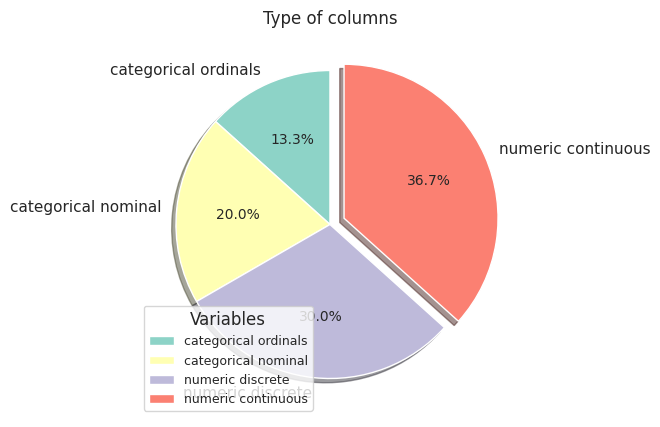

In [0]:
# Creating dataset with column types
column = ['count_type_columns']
data = [(val, ) for val in df.columns]
type_columns = spark.createDataFrame(data, column)

# Adding the types
type_columns = type_columns \
    .withColumn('count_type_columns', F.when(F.col('count_type_columns').isin(categorical_nominals), 
                                             'categorical nominal').otherwise(F.col('count_type_columns'))) \
    .withColumn('count_type_columns', F.when(F.col('count_type_columns').isin(categorical_ordinals), 
                                           'categorical ordinals').otherwise(F.col('count_type_columns'))) \
    .withColumn('count_type_columns', F.when(F.col('count_type_columns').isin(numerical_discrete), 
                                           'numeric discrete').otherwise(F.col('count_type_columns'))) \
    .withColumn('count_type_columns', F.when(F.col('count_type_columns').isin(numerical_continuous), 
                                           'numeric continuous').otherwise(F.col('count_type_columns'))) 

# Colleting Data
type_col = type_columns.groupBy('count_type_columns') \
  .agg(F.count('count_type_columns').alias('frequency')) \
  .withColumn('percentage', F.round((F.col('frequency') / len(df.columns)) * 100, 2)) \
  .orderBy('frequency')
# Data
data_ax = type_col.toPandas()

# Create subplot
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (5, 5))

ax.pie(
    data_ax['frequency'],
    labels = data_ax['count_type_columns'],
    colors = sns.color_palette('Set3', 4),
    autopct = '%1.1f%%',
    startangle = 90,
    explode = (0, 0, 0, 0.1),
    shadow = True,
)


ax.set_title('Type of columns')
ax.legend(title = 'Variables', loc = 'lower left', fontsize = 9)

plt.show()

### Insight: 

* So far, we have a majority of continuous numeric data in our dataset, followed by discrete numeric variables and nominal categorical variables. From here, we can explore and consider the strategies that will be applied to clean this data.

# 3 - Data Preparation

### Note:

* In this initial step, I will clean the data. We have a lot of invalid data. Initially, I will start by checking the data typing: continuous numeric data will be of type double, and discrete numeric data will be of type integer. This approach will already do a great deal of removing invalid values ​​from the numeric columns. In addition, categorical variables will be checked according to their respective valid categories. 

* Initially, all invalid values ​​will be marked as null, so that at the end of the analysis, I can decide whether to remove them or fill them with some data imputation technique.

## Extracting data

### Treating column emp_length:
extracting numeric data from emp_length column

In [0]:
df.select('emp_length').distinct().display()

emp_length 9 years 5 years 1 year n/a 2 years 7 years 8 years 4 years 6 years 3 years 10+ years < 1 year

In [0]:
df = df.withColumn('emp_idx', F.when(F.col('emp_length') == '< 1 year', '0').otherwise(F.col('emp_length'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '1 year', '1').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '2 years', '2').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '3 years', '3').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '4 years', '4').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '5 years', '5').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '6 years', '6').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '7 years', '7').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '8 years', '8').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '9 years', '9').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == '10+ years', '10').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.when(F.col('emp_length') == 'n/a', '0').otherwise(F.col('emp_idx'))) \
  .withColumn('emp_idx', F.col('emp_idx').cast(StringType()))

In [0]:
# Ajusting Cols
df = df.withColumn('emp_length', F.col('emp_idx'))
df = df.drop('emp_idx')

In [0]:
df.select('emp_length').distinct().display()

emp_length 7 3 8 0 5 6 9 1 10 4 2

### Note:

* I chose to extract the numerical and string variables manually from these columns in order to preserve the natural order of the data.

* The 'n/a' category refers to inapplicable or uncollected data, so I will consider these missing records as '0', I will be considering the absence of a value in these records if it is due to the borrower not having experience or employment time greater than 1 year.

### Date type columns

#### We have 2 date type columns in this dataset. They are:

* **issue_d**: Date the loan was granted.

* **earliest_cr_line**: Year the customer's first line of credit was opened.



I will choose to use the issue_d column as a parameter and calculate the months of the earliest_cr_line column.

* **earliest_cr_line**: The date of the borrower's first line of credit will be considered in relation to the date of the loan. With this, we will have the number of months since the borrower requested the loan until their first line of credit.

* **issue_d**: A similar approach will be applied, but the calculation parameter will be the maximum date of 'issue_d' because it signals the date on which the last records and loans were released. Therefore, the number of months will be calculated according to the maximum date of data collection for these loans. With this, we can conclude that the loans with more months in relation to the maximum date are the oldest loans and therefore it is easier to order them in the future and partition our training and test data.

In [0]:
df.select('issue_d', 'earliest_cr_line').limit(10).display()

issue_d earliest_cr_line Dec-2011 Jan-1985 Dec-2011 Apr-1999 Dec-2011 Nov-2001 Dec-2011 Feb-1996 Dec-2011 Nov-2004 Dec-2011 Jan-2007 Dec-2011 Apr-2004 Dec-2011 Sep-2004 Dec-2011 Jan-1998 Dec-2011 Oct-1989

#### Adjusting columns to date type format

In [0]:
df = df.withColumn('issue_d', F.to_date(F.col('issue_d'), 'MMM-yyyy')) \
    .withColumn('earliest_cr_line', F.to_date(F.col('earliest_cr_line'), 'MMM-yyy')) \
    
df.select('issue_d', 'earliest_cr_line') \
    .limit(10) \
    .display()

issue_d earliest_cr_line 2011-12-01 1985-01-01 2011-12-01 1999-04-01 2011-12-01 2001-11-01 2011-12-01 1996-02-01 2011-12-01 2004-11-01 2011-12-01 2007-01-01 2011-12-01 2004-04-01 2011-12-01 2004-09-01 2011-12-01 1998-01-01 2011-12-01 1989-10-01

#### Calculating months from column:

* earliest_cr_line

* issue_d


#### mo_earliest_cr_line

In [0]:
df = df.withColumn('mo_earliest_cr_line', F.months_between(F.col('issue_d'), F.col('earliest_cr_line'))) \
    
df.select('mo_earliest_cr_line') \
    .limit(10) \
    .display()

mo_earliest_cr_line 323.0 152.0 121.0 190.0 85.0 59.0 92.0 87.0 167.0 266.0

In [0]:
numerical_discrete.append('mo_earliest_cr_line')

#### mo_issue_d

In [0]:
max_issue_d = df.select(F.max('issue_d'))
max_issue_d.display()

max(issue_d) 2015-12-01

In [0]:
df = df.withColumn('issue_d_max', F.lit('2015-12-01').cast(DateType())) \
    .withColumn('mo_issue_d', F.months_between(F.col('issue_d_max'), F.col('issue_d'))) 


In [0]:
df.select('mo_issue_d') \
    .describe() \
    .display()

summary mo_issue_d count 252971 mean 30.92935158575489 stddev 16.874253089494122 min 0.0 max 102.0

In [0]:
numerical_discrete.append('mo_issue_d')

In [0]:
# List of discart variables
date_cols = ['earliest_cr_line', 'issue_d', 'issue_d_max']
df = df.drop(*date_cols)

# Ajusting list variables to discarted
variables_to_discart.extend(date_cols)

# Cheking result
len(df.columns)

30

Ajusting columns to discarted

In [0]:
for variable in variables_to_discart:
    # List nominal variables
    if variable in categorical_nominals:
        categorical_nominals.remove(variable)
    # List ordinal variables
    if variable in numerical_discrete:
        numerical_discrete.remove(variable)

### Removing invalid data

In [0]:
def remove_invalid_data(dataset, num_d = [], num_c = [], cat_n = [], cat_o = []):
    
    """
    Cleans and preprocesses the dataset by handling invalid or inconsistent values.

    Args:
        dataset (DataFrame): The input dataset.
        num_d (list, optional): List of integer columns. Defaults to [].
        num_c (list, optional): List of double columns. Defaults to [].
        cat_n (list, optional): List of numerical categorical columns. Defaults to [].
        cat_o (list, optional): List of ordinal categorical columns. Defaults to [].
        dic_str (dict, optional): Dictionary mapping string columns to valid values.

    Returns:
        DataFrame: Cleaned dataset.
    """
    # Columns Str
    dic_str = {
    
    'purpose': [
        'wedding', 'educational', 'other', 'small_business', 'debt_consolidation', 'credit_card', 'moving', 'vacation', 'renewable_energy', 'house', 'car', 'major_purchase', 'medical', 'home_improvement'
        ],
    
    'verification_status': ['Verified', 'Source Verified', 'Not Verified'],
    
    'grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    
    'sub_grade': [
        'A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1','C2','C3','C4','C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'
        ],
    
    'home_ownership': ['MORTGAGE', 'OWN', 'RENT', 'ANY', 'NONE', 'OTHER'],
    
    'loan_status': [
        'Fully Paid' , 'Charged Off'
        ],
    
    'initial_list_status': ['w', 'f'],


    'term': [' 36 months', ' 60 months']

    }


    # Check for null data at the beginning of the function
    print('\nCheck Null data (Begin): ')
    check_null_data(dataset)
    
    for column in dataset.columns:

        # Defining the types of variables and assigning null values ​​to records that are not part of the respective type of their column.

        # Data Trating Integer variables - (Numerical discrete varibles)
        if column in num_d:
            dataset = dataset.withColumn(column, F.when(F.round(F.col(column), 2) ==  F.col(column).cast(IntegerType()), F.col(column).cast(IntegerType())).otherwise(None))
        
        # Data Trating Double variables - (Numerical continuos varibles)
        if column in num_c:
            dataset = dataset.withColumn(column, F.when(F.col(column) ==  F.col(column).cast(DoubleType()), F.col(column).cast(DoubleType())).otherwise(None))
        
        # Data Trating String variables - (Categorical variables)
        if column in cat_n or column in cat_o:

            for col_str in dic_str:

                dataset = dataset.withColumn(col_str, F.when((F.col(col_str).isin(dic_str[col_str])), F.col(col_str).cast(StringType())).otherwise(None))
    
    # Check for null data at the end of the function
    print('\nCheck Null data (After): ')
    check_null_data(dataset)
    
    return dataset

In [0]:

df = remove_invalid_data(df, numerical_discrete, numerical_continuous, categorical_ordinals, categorical_nominals)


Check Null data (Begin): 


loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line mo_issue_d 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.08 0.0 0.0 0.02 0.0 25.18 25.18 25.18 0.0 0.0


Check Null data (After): 


loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line mo_issue_d 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.08 0.0 0.0 0.02 0.0 25.18 25.18 25.18 0.0 0.0

In [0]:
check_categorical_cols(df, cols_strings)

term frequency 36 months 196658 60 months 56313

grade frequency B 76065 C 65320 A 42296 D 40506 E 19186 F 7660 G 1938

sub_grade frequency B3 18068 B4 16933 C1 14959 B2 14628 C2 14341 B5 14340 C3 12778 B1 12096 C4 12056 A5 11993

emp_length frequency 10 76881 0 30783 2 23561 3 20380 5 18059 1 16856 4 16197 6 14753 7 14085 8 11849

home_ownership frequency MORTGAGE 124844 RENT 105957 OWN 21985 OTHER 141 NONE 43 ANY 1

verification_status frequency Verified 92896 Not Verified 86064 Source Verified 74011

loan_status frequency Fully Paid 207723 Charged Off 45248

purpose frequency debt_consolidation 148363 credit_card 50076 home_improvement 14929 other 14277 major_purchase 6265 small_business 4746 car 3646 medical 2854 moving 2028 wedding 1955

addr_state frequency CA 43110 NY 21338 TX 19343 FL 17545 NJ 9601 IL 9253 PA 8399 GA 8014 VA 7942 OH 7738

initial_list_status frequency f 182079 w 70892

In [0]:
df.select(*numerical_continuous, *numerical_discrete).describe().display()

summary loan_amnt funded_amnt int_rate installment annual_inc dti revol_bal revol_util tot_coll_amt tot_cur_bal total_rev_hi_lim delinq_2yrs inq_last_6mths open_acc pub_rec total_acc acc_now_delinq collections_12_mths_ex_med mo_earliest_cr_line mo_issue_d count 252971 252971 252971 252971 252971 252971 252971 252772 189263 189263 189263 252971 252971 252971 252971 252971 252971 252915 252971 252971 mean 13562.768854928036 13522.193749481166 13.764624957041386 418.11221562946395 72538.25102541385 16.544103988204387 15167.97594981243 54.312092518159545 203.8236422332944 138331.1523277133 29709.117397483926 0.2499140217653407 0.8524850674583253 10.939566195334644 0.14343936656770934 25.035905301398184 0.003114981559151049 0.006725579740228931 183.00082222863492 30.92935158575489 stddev 8131.72953096545 8109.211388377764 4.401925733812313 244.9330593063498 58811.807620549574 7.7886955263926 18743.002656969544 24.790576502071584 21102.058036695576 152436.7191669848 29517.296672276923 0.740600227384442 1.0668751829044056 4.890986200081288 0.4363832310319733 11.747131299791791 0.06055263914552854 0.08900506430474125 84.20566403932118 16.874253089494122 min 500.0 500.0 5.32 15.69 3000.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 2 0 0 36 0 max 35000.0 35000.0 28.99 1424.57 8706582.0 57.14 1746716.0 892.3 9152545.0 8000078.0 2013133.0 29 8 76 15 150 5 6 793 102

### Note:

* The initial data cleaning was performed with the function above.

* **Discrete numeric variables**:

  * These variables were converted to the **'Integer'** type, and the data was filtered in which the values ​​present in the column that were not of the 'Integer' type were removed and filled as null. For example, if a value in a column was 2.3, this value would be considered null, taking into account that discrete variables cannot be partitioned into real numbers.

* **Continuous numeric variables**:

  * They were also converted to their corresponding type. Therefore, the data was filtered in which the values ​​present in the column that were not of the **'Double'** type were removed and filled as null. This approach has already managed to solve the problem of string values ​​that were present in the numeric columns.

* **Categorical/dummy variables**:

  * The data was filtered using the dictionary with valid categories for each variable, and if there were values ​​that were outside these parameters, they were removed and filled in as null.

* There are some columns with values ​​much higher than expected, which apparently are typing errors or incorrect entries, these columns will be analyzed and treated.

* Therefore, I will perform an analysis to determine whether this data is outliers or invalid. It is important to identify and treat these values ​​to ensure the quality of the data used in the analysis.

### Select columns to be analyzed for data error checking:

In [0]:
col_num_error = [
'annual_inc', 'dti', 'open_acc', 'int_rate', 'pub_rec', 'revol_bal', 'total_acc',  'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'mo_earliest_cr_line', 
]
len(col_num_error)

13

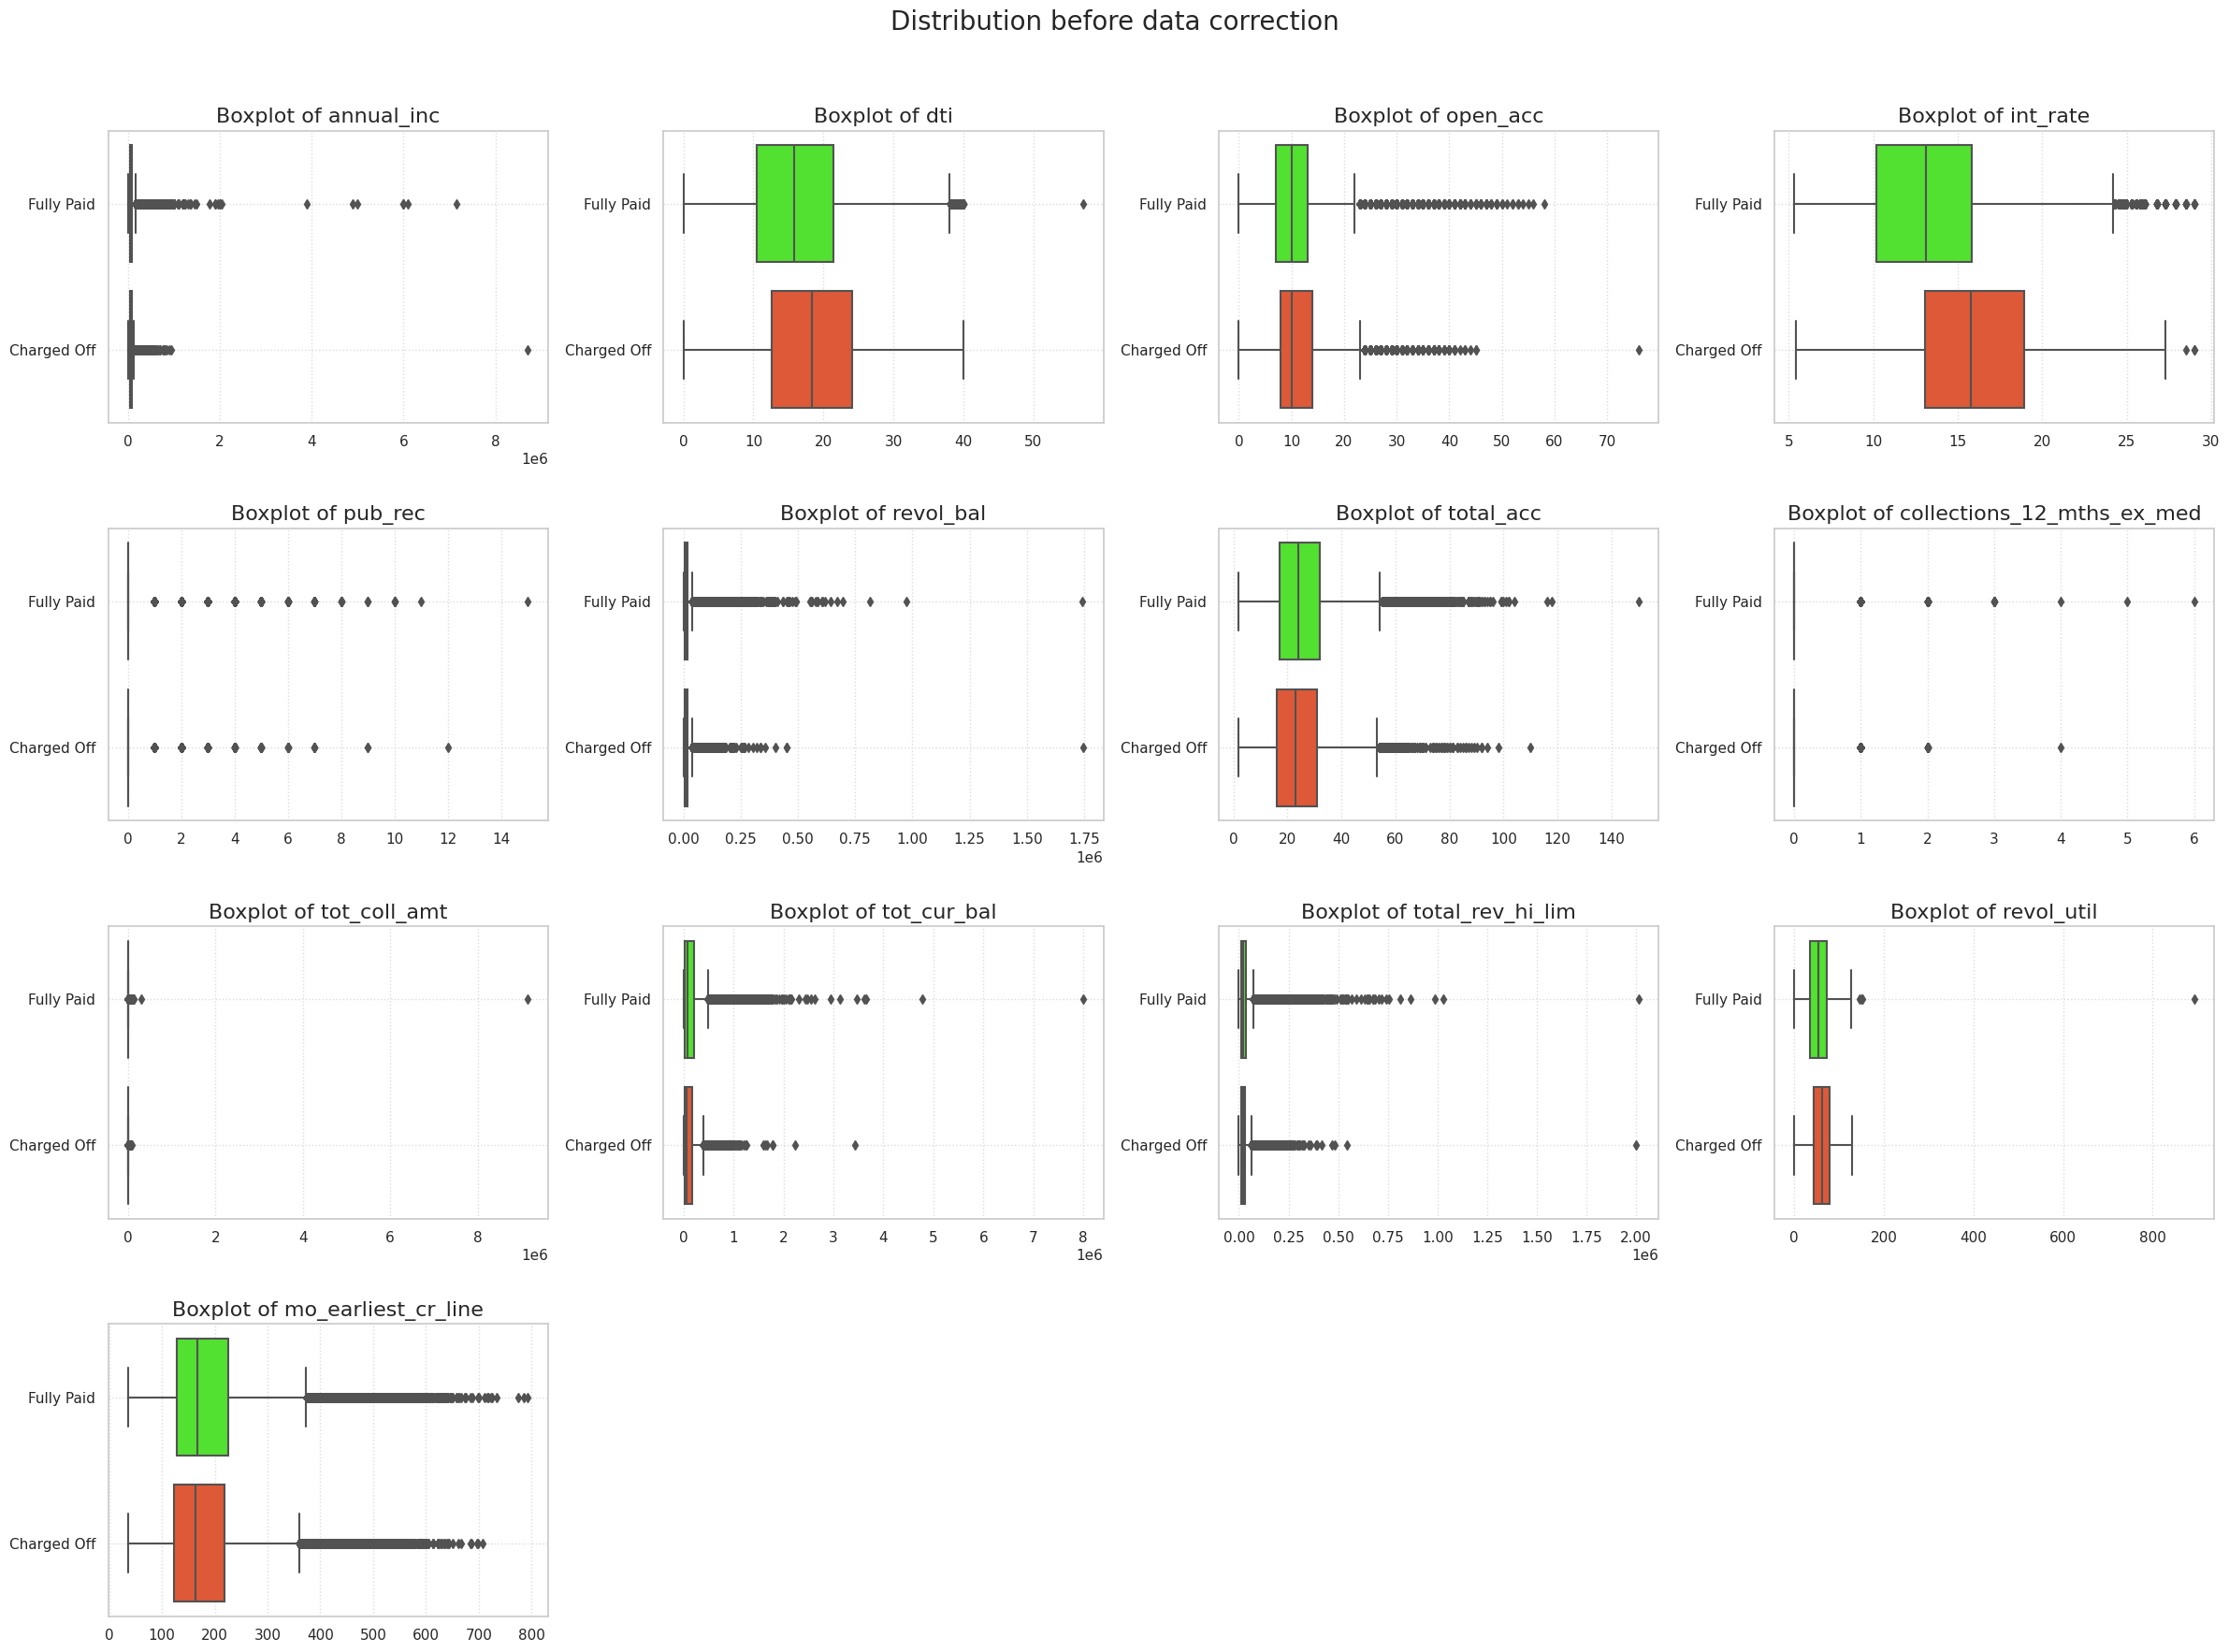

In [0]:
# Data collect
data_ax = df.toPandas()

plt.rc('font', size = 10)
fig, ax = plt.subplots(4, 4, figsize = (24, 18))
fig.delaxes(ax[3, 3])
fig.delaxes(ax[3, 2])
fig.delaxes(ax[3, 1])


ax = ax.flatten()
grid_style = dict(alpha = 0.7, linestyle = 'dotted')
for i, col_list in enumerate(col_num_error):
    sns.boxplot(
        data = data_ax,
        x = col_list,
        y = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\nBoxplot of {col_list}', fontsize = 16)

plt.suptitle('Distribution before data correction', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

In [0]:
# Size dataset
df.count(), len(df.columns)

(252971, 30)

In [0]:
# dti
df.filter(F.col('dti') > 40).count()

1

In [0]:
# annual_inc
df.filter(F.col('annual_inc') > 1000000).count()

34

In [0]:
# revol_bal
df.filter(F.col('revol_bal') > 1000000).count()

2

In [0]:
# tot_coll_amt
df.filter(F.col('tot_coll_amt') > 1000000).count()

1

In [0]:
# tot_cur_bal
df.filter(F.col('tot_cur_bal') > 5000000).count()

1

In [0]:
# total_rev_hi_lim
df.filter(F.col('total_rev_hi_lim') > 1000000).count()

3

In [0]:
# revol_util
df.filter(F.col('revol_util') > 180).count()

1

### Example of invalid data

In [0]:
df.filter(F.col('annual_inc') > 8000000).display()

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line mo_issue_d 8000.0 8000.0 36 months 13.66 272.11 C C3 10 MORTGAGE 8706582.0 Source Verified Charged Off credit_card IL 0.11 0 1 11 0 16449.0 54.1 18 w 0 0 0.0 79135.0 30400.0 174 11

Ajusting invalid data

In [0]:
# removing invalid data
df = df.withColumn('invalid_data', F.when(F.col('dti') > 40, True).otherwise(False))
df = df.withColumn('invalid_data', F.when(F.col('annual_inc') > 1000000, True).otherwise(F.col('invalid_data')))
df = df.withColumn('invalid_data', F.when(F.col('revol_bal') > 1000000, True).otherwise(F.col('invalid_data')))
df = df.withColumn('invalid_data', F.when(F.col('tot_coll_amt') > 1000000, True).otherwise(F.col('invalid_data')))
df = df.withColumn('invalid_data', F.when(F.col('tot_cur_bal') > 5000000, True).otherwise(F.col('invalid_data')))
df = df.withColumn('invalid_data', F.when(F.col('total_rev_hi_lim') > 1000000, True).otherwise(F.col('invalid_data')))
df = df.withColumn('invalid_data', F.when(F.col('revol_util') > 180, True).otherwise(F.col('invalid_data')))

total_invalid = df.filter(F.col('invalid_data') == True).count()
df = df.filter(F.col('invalid_data') == False)
df = df.drop('invalid_data')
print(f'Total of invalid data: {total_invalid}')


Total of invalid data: 40


The size now dataset

In [0]:
df.count(), len(df.columns)

(252931, 30)

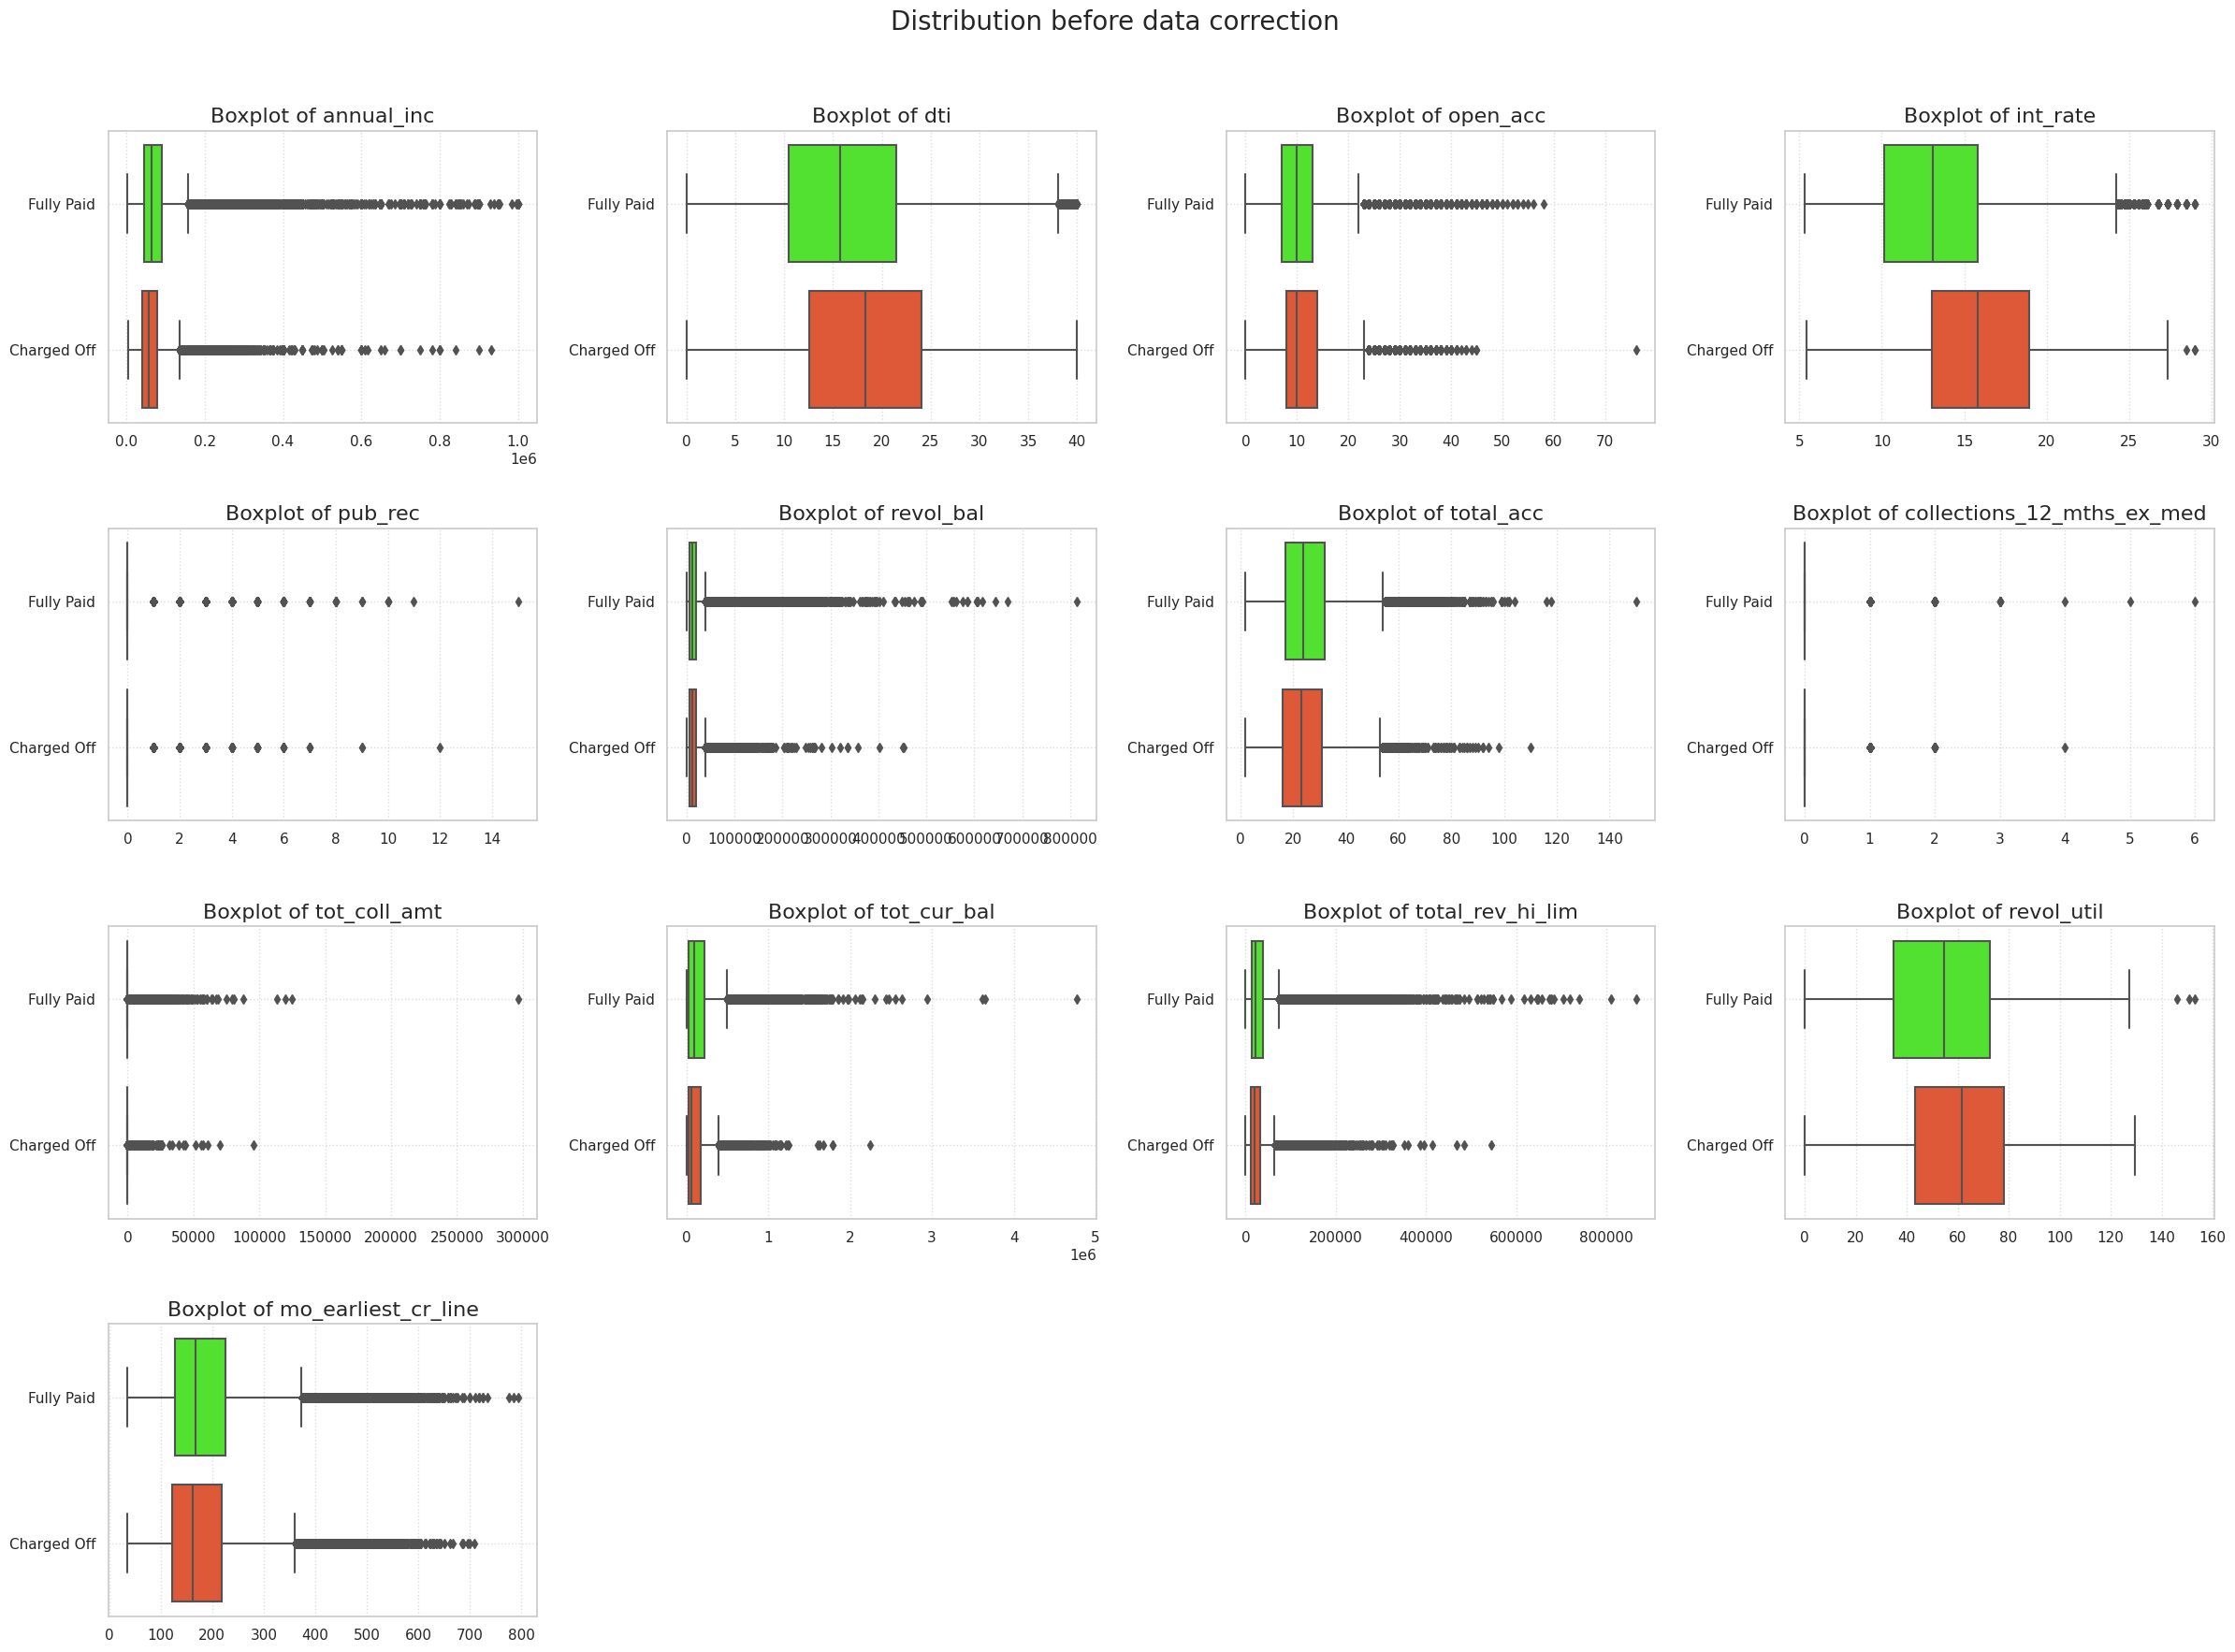

In [0]:
# Data collect
data_ax = df.toPandas()

plt.rc('font', size = 10)
fig, ax = plt.subplots(4, 4, figsize = (24, 18))
fig.delaxes(ax[3, 3])
fig.delaxes(ax[3, 2])
fig.delaxes(ax[3, 1])



ax = ax.flatten()
grid_style = dict(alpha = 0.7, linestyle = 'dotted')
for i, col_list in enumerate(col_num_error):
    sns.boxplot(
        data = data_ax,
        x = col_list,
        y = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\nBoxplot of {col_list}', fontsize = 16)

plt.suptitle('Distribution before data correction', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

### Note:

* This cleaning process was delicate and mostly done manually. I chose to use boxplots to get an accurate view of the data that fell far outside the expected distributions for each column. I decided to remove these data points rather than impute them because they were significantly outside the expected values, somewhat characterizing possible data collection errors. Since this was a small number of records, there will be no disruption to the distribution of the data. Below is an example of these records:

  * funded_amount: $ 8,000.00

  * annual_inc: $8,706,582.00

  * dti: 0.11%

  * total_rev_hi_lim: 30,400.00

  * loan_status: 'Charged Off'

* In this **example**, we have a borrower with an annual income of over $8 million and a DTI of 0.11% who has applied for a loan of **US$8,000.00**. What is striking in this case is his total_rev_hi_lim, which is **US$30,400.00**. This does not make sense, considering that he has an annual income of over **US$8 million**; having only this value as a limit is a bit out of context of what is expected as natural. Considering records like this, it does not make sense to keep them or try to recover them, since it is possible to conclude that some of this data is very out of context of what is expected.

* There is a possibility that these records are an exception to this data set, but considering the context and the visualizations, it is possible to conclude that this data is not part of the natural distribution of this data. We have some outliers that in the visualizations we can see that they follow a natural pattern, but the records mentioned above are extreme outliers and are somehow out of context.

* I tried not to interfere with the normal distribution of the data, removing only the outliers that were not part of the context of the column in which they were inserted.

* I chose to preserve as much as possible the outliers of this dataset, as I believe that some of them are part of the normal distribution of these records. If this is the case, we will keep these values ​​so that the model learns according to the real distributions of the data.

* I defined a function to remove this invalid data. First, I created a dictionary with the columns to be treated and, in each of them, I defined a threshold based on their respective distributions. These values ​​were chosen considering the specific context of each column. Although many values ​​were outside the third quartile, some of them made sense for certain columns.

* Discrete numeric columns were easier to deal with, as it was possible to find clear boundaries between valid and invalid data. For continuous numeric variables, defining a boundary without compromising the data distributions was a bit more challenging, but I believe we were successful in this step.

* Despite the removal of some of the invalid records, it is possible to notice that some columns may not be able to be used in training. The quality of the data present in them is slightly below what we need for our analysis and training.

* As for the DTI column, I considered the terms of the institution. LendingClub only accepts loans with a DTI of up to 40%. Above that amount, the loan is automatically denied.

* Source info of DTI: https://www.forbes.com/advisor/personal-loans/lendingclub-vs-prosper-personal-loans/

## Saving clean data

In [0]:

# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Silver/Dataset-clear'
file_type = 'parquet'

# Mode
mode = 'overwrite'

# Options Parquet Files
compression = 'gzip'

# Writing dataset
df.write.format(file_type) \
    .option('compression', compression) \
    .mode(mode) \
    .save(file_location) 

# Reading Dataset
df = spark.read.format(file_type) \
    .option('compression', compression) \
    .load(file_location)

## EDA 


#### Next steps:

#### Feature selection:

* In this step, I will select features using two approaches:

  * **First**, I will consider the **context** of each of the variables and their importance in the records of this dataset.

  * **Second**, I will evaluate the correlation and relationship of the features with the target variable, which is **loan_status**.

* Based on these points and concepts, I will choose the features that add value to the solution of this problem.

* To calculate the correlation between the columns, I will define a function to index the categorical columns. I will use the correlation to check for numerical variables, while for categorical variables I will use the p-value along with the chi-square (chi2) test.

#### Splitting the training and testing data

* From here on, all the analyses will be based on our training dataset, which will be approximately 80% of the total dataset. I will choose to separate from this point on to avoid leaking **test data**, since this data cannot be influenced by the analysis or data modeling that will be applied to the training data.

* Since this is a credit risk analysis, it is important to consider that the division of the data must take into account the chronological order of the records. This is important to verify the performance of the model with past data (loans that were used for training) in relation to future data (loans that will be requested in the future).

* In other words, this step is important to verify how well the model trained with past data can predict the default of credit applicants at a future point in time.

* Then I will use the **mo_issue_d** variable to classify the records in chronological order, and the division of our data is as follows:

  * **trainset**: Approximately 80% of the records being the oldest and in chronological order.

  * **testset**: Approximately 20% of the records being the newest and in chronological order.

* I will make a small adjustment so that the data is distributed more organically, I will be looking for a margin where we have a time point between the training data and another for the test data. Therefore, with this adjustment we will not have loans with the same number of months in the training and testing data.

### Separating training and test data

In [0]:
# Sorting the data
sorted_dataset = df
sorted_dataset = sorted_dataset.orderBy('mo_issue_d', ascending = False)

# Creating an id for each record in an orderly manner
sorted_dataset = sorted_dataset.withColumn('index', F.monotonically_increasing_id()) 

sorted_dataset.select('index', 'loan_amnt', 'loan_status', 'mo_issue_d') \
    .limit(10) \
    .display()

index loan_amnt loan_status mo_issue_d 0 7500.0 Fully Paid 102 1 3500.0 Fully Paid 101 2 5750.0 Fully Paid 101 3 5000.0 Fully Paid 101 4 1200.0 Fully Paid 101 5 12250.0 Fully Paid 101 6 2700.0 Fully Paid 101 7 5000.0 Fully Paid 101 8 3500.0 Fully Paid 101 9 5000.0 Fully Paid 101

#### Looking for a margin for data division

In [0]:
# Calculating the limit for division

total_data = sorted_dataset.count()

train_size = int(total_data * 0.8)

# Partitioning the data
# trainset
train_m = sorted_dataset.filter(F.col('index') < train_size)

# testset
test_m = sorted_dataset.filter(F.col('index') >= train_size)

* Training margin

In [0]:
train_m.select('mo_issue_d').describe().display()

summary mo_issue_d count 202344 mean 35.92608132684933 stddev 15.059871781016199 min 17 max 102

* Test margin

In [0]:
test_m.select('mo_issue_d').describe().display()

summary mo_issue_d count 50587 mean 10.937256607428786 stddev 4.088634805923174 min 0 max 17

#### Final parameters for splitting training and test data:

* I will be considering the number of months as 17 with a parameter to separate the training and test data.

##### For the training data, it will be as follows:

* **training_set**: from **18** months to **102** months of loan time in relation to the maximum data collection period.

* There will be records of loans from **1 year and 6 months to loans of 8 years and 6 months**.

##### For the test data, it will be as follows:

* **test_set**: from **0** months to **17** months of loan time in relation to the maximum data collection period

* There will be records of loans from **0 months to loans of 1 year and 5 months**.

In [0]:
train = df
train = train.withColumn('drop', F.when(F.col('mo_issue_d') > 17, False).otherwise(True))
train.groupBy('drop').count().display()

drop count true 57509 false 195422

In [0]:
test = df
test = test.withColumn('drop', F.when(F.col('mo_issue_d') <= 17, False).otherwise(True))
test.groupBy('drop').count().display()

drop count true 195422 false 57509


* Therefore, the division of training and testing data was as follows:

* training: 77% of the data

* test: 23% of the data

In [0]:
print(f'Training size: {round(195422 / (57509 + 195422), 2)}%')
print(f'Test size: {round(57509 / (57509 + 195422), 2)}%')

Training size: 0.77%
Test size: 0.23%


In [0]:
# Train
train = train.filter(F.col('drop') == False)
# Test
test = test.filter(F.col('drop') == False)

# Dropping columns that were used to partition the data
columns_partition = ['drop', 'mo_issue_d']

train = train.drop(*columns_partition)

test = test.drop(*columns_partition)

Train size | Null data | info

In [0]:
train.count(), len(train.columns)

(195422, 29)

In [0]:
check_null_data(train)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.08 0.0 0.0 0.03 0.0 32.59 32.59 32.59 0.0

In [0]:
train.printSchema()

root
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: double (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: integer (nullable = true)
 |-- inq_last_6mths: integer (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: integer (nullable = true)
 |-- revol_bal: double (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- collections_12_mths_e

Test size | Null data | Info

In [0]:
test.count(), len(test.columns)

(57509, 29)

In [0]:
check_null_data(test)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [0]:
test.printSchema()

root
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: double (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: integer (nullable = true)
 |-- inq_last_6mths: integer (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: integer (nullable = true)
 |-- revol_bal: double (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- collections_12_mths_e

### Checking payments status train data and test data

#### Train data

In [0]:
# Check all Status of payments 
train.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / train.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()

loan_status frequency percentage Fully Paid 159210 81.47 Charged Off 36212 18.53

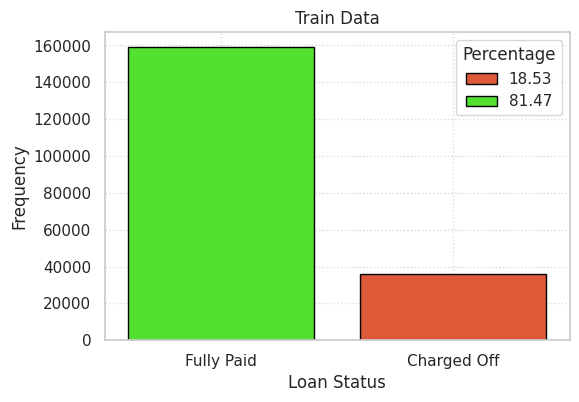

In [0]:
# Defining Data

# Checking 'loan_status' in the dataset
check_train = train.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round( (F.col('frequency') / train.count()) * 100, 2 )) 
data_ax = check_train.toPandas()

# Color
palette = ['#f8481c', '#40fd14']

# Create subplots
plt.rc('font', size = 10)
fig, ax= plt.subplots(figsize = (6, 4))
grid_style = dict(alpha = 0.7, linestyle = 'dotted')

# Bar plot ax
sns.barplot(
    data = data_ax,
    x = 'loan_status',
    y = 'frequency',
    hue = 'percentage',
    dodge = False,
    palette = palette,
    edgecolor = 'black',
    ax = ax
)
sns.set(style = 'whitegrid')
ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
ax.set_title('Train Data')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Frequency')
ax.legend(title = 'Percentage')

plt.show()

#### Test data

In [0]:
# Check all Status of payments 
test.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round((F.col('frequency') / test.count()) * 100, 2)) \
    .orderBy('frequency', ascending = False) \
    .display()

loan_status frequency percentage Fully Paid 48475 84.29 Charged Off 9034 15.71

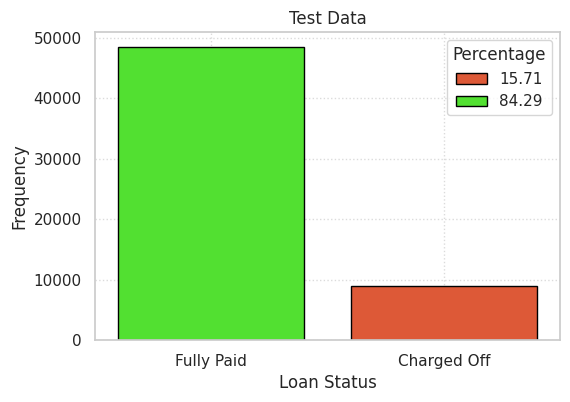

In [0]:
# Defining Data

# Checking 'loan_status' in the dataset
check_test = test.groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round( (F.col('frequency') / test.count()) * 100, 2 )) 
data_ax = check_test.toPandas()

# Color
palette = ['#f8481c', '#40fd14']

# Create subplots
plt.rc('font', size = 10)
fig, ax= plt.subplots(figsize = (6, 4))
grid_style = dict(alpha = 0.7, linestyle = 'dotted')

# Bar plot ax
sns.barplot(
    data = data_ax,
    x = 'loan_status',
    y = 'frequency',
    hue = 'percentage',
    dodge = False,
    palette = palette,
    edgecolor = 'black',
    ax = ax
)
sns.set(style = 'whitegrid')
ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
ax.set_title('Test Data')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Frequency')
ax.legend(title = 'Percentage')

plt.show()

### Note:

* Comparing the two data sets, it is possible to observe that the test data has a lower default rate.

### Analyzing problems and possible solutions

#### With this data, what are the impacts generated by the institution through the loans granted?

In [0]:
# Data collect
# Sum of the values ​​of all loans that were granted
total_amount = df.select(F.sum('funded_amnt')).collect()[0][0]
# Create GroupBy: funded_amnt
total_amout_loan  = df.groupBy('loan_status') \
    .agg(F.sum('funded_amnt').alias('total_loan_amnt')) \
    .withColumn('percentage', F.round( (F.col('total_loan_amnt') / total_amount) * 100, 2 ))
total_amout_loan.display()

loan_status total_loan_amnt percentage Fully Paid 2.763446275E9 80.8 Charged Off 6.56539375E8 19.2

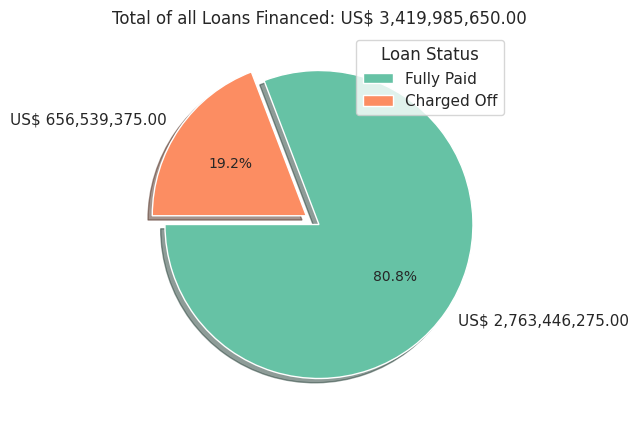

In [0]:
# Data
data_ax = total_amout_loan.toPandas()

# Create subplot
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (5, 5))

ax.pie(
    data_ax['total_loan_amnt'],
    labels = ['US$ 2,763,446,275.00', 'US$ 656,539,375.00'],
    colors = sns.color_palette('Set2', 2),
    autopct = '%1.1f%%',
    startangle = 180,
    explode = (0, 0.1),
    shadow = True,
)
ax.set_title('Total of all Loans Financed: US$ 3,419,985,650.00')
ax.legend(title = 'Loan Status', labels = ['Fully Paid', 'Charged Off'], loc = 'upper right')

plt.show()

### Insight:

It can be seen that, in total, loans worth **US$ 3,419,985,650.00** were granted. Of these, **US$ 2,763,446,275.00** was paid in full, while **US$ 656,539,375.00** was lost in part or in full.


#### So, what is the consequence of a wrong classification when granting a loan?

If we consider that the loans that were considered lost by Lending Club, if they were declined at the time of application, a **loss** of approximately **US$ 656,539,375.00** could have been avoided.

##### What if there was the opposite situation?

If loans that were considered **paid** by Lending Club at the time of application were **unfairly denied**? Because they presented a risk of fraud to the institution. What would be the consequences of this scenario?

In [0]:
# Data collect
total_int_rate = df.withColumn('int_rate_value', F.round( (F.col('funded_amnt') * F.col('int_rate')) / 100, 4 )) \
    .groupBy('loan_status') \
    .agg(F.round(F.sum('int_rate_value'),0).alias('total_int_rate'))
total_int_rate.display()

loan_status total_int_rate Fully Paid 3.80373134E8 Charged Off 1.09607412E8

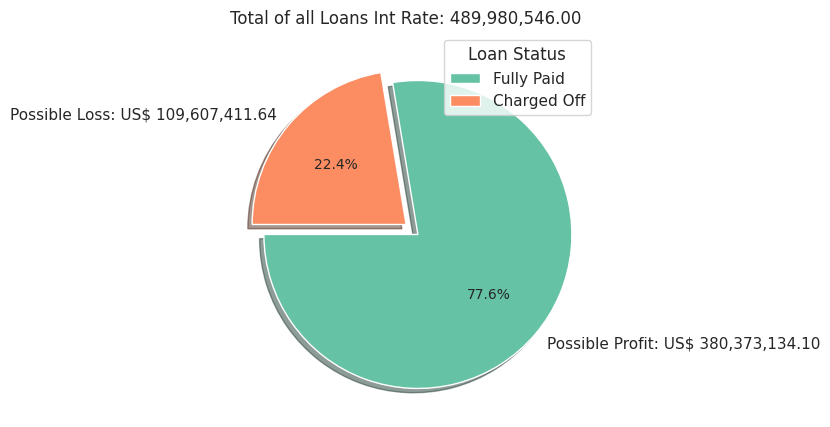

In [0]:
# Data
data_ax = total_int_rate.toPandas()

# Create subplot
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (5, 5))

ax.pie(
    data_ax['total_int_rate'],
    labels = ['Possible Profit: US$ 380,373,134.10', 'Possible Loss: US$ 109,607,411.64'],
    colors = sns.color_palette('Set2', 2),
    autopct = '%1.1f%%',
    startangle = 180,
    explode = (0.1, 0),
    shadow = True,
)
ax.set_title('Total of all Loans Int Rate: 489,980,546.00')
ax.legend(title = 'Loan Status', labels = ['Fully Paid', 'Charged Off'], loc = 'upper right')

plt.show()

### Insight:

It is possible to note that loans that were **fully paid** generate a gross interest amount of **US$ 380,373,134.10**. If these loans were denied, this would be a parameter to quantify the **financial loss** that would be caused to the institution.

### Check variables correlations with 'loan_status'

In [0]:
def indexer_cols(dataset, cols_nominals, col_ordinals):

    """
    Indexes categorical columns in a DataFrame.

    Args:
    dataset (pyspark.sql.DataFrame): The DataFrame containing the data.
    cols_nominals (list): List of nominal categorical column names.
    col_ordinals (list): List of ordinal categorical column names.

    Returns:
    pyspark.sql.DataFrame: The DataFrame with the indexed columns.
    """
    
    for column in dataset.columns:
        if column in cols_nominals :

            indexer = StringIndexer(inputCol = column, outputCol = f'{column}idx', stringOrderType = 'frequencyDesc')
            model = indexer.fit(dataset)
            dataset = model.transform(dataset)
            dataset = dataset.withColumn(column, F.col(f'{column}idx'))
            dataset = dataset.drop(f'{column}idx')

        if column in col_ordinals :

            indexer = StringIndexer(inputCol = column, outputCol = f'{column}idx',  stringOrderType = 'alphabetAsc')
            model = indexer.fit(dataset)
            dataset = model.transform(dataset)
            dataset = dataset.withColumn(column, F.col(f'{column}idx'))
            dataset = dataset.drop(f'{column}idx')

        else:
            continue

    return dataset

###  Note:

* I will be imputing the null values ​​so that I can perform correlation and importance checks of the features with our response variable **'loan_status'**.

In [0]:
    # Imput Null data
    num_input = [
        'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
    ] 
    data_corr = train # dataset for correlations
    # Numeric cols
    for column in num_input:    
        # Median of column
        median = data_corr.filter(F.col(column).isNotNull()).approxQuantile(column, [0.50], 0)[0]
        
        # Imputing to the median in null values in training and test data
        
        # Data_corr data
        data_corr = data_corr.withColumn(column, F.when(F.col(column).isNull(), median).otherwise(F.col(column)))
       

In [0]:
check_null_data(data_corr)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Indexing column for correlation and relationship analysis

In [0]:
# Removing variables from lists to index manually
categorical_nominals.remove('loan_status') # The column will be indexed manually
categorical_ordinals.remove('emp_length') # The column will be indexed manually

# Applying indexing function
data_corr = indexer_cols(data_corr, categorical_nominals, categorical_ordinals)

# loan_status
data_corr = data_corr.withColumn('loan_status', F.when(F.col('loan_status') == 'Fully Paid', 0).otherwise(1).cast(IntegerType()))

# emp_length
data_corr = data_corr.withColumn('emp_length', F.when(F.col('emp_length') == '0', 0).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '1', 1).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '2', 2).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '3', 3).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '4', 4).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '5', 5).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '6', 6).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '7', 7).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '8', 8).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '9', 9).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '10', 10).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.col('emp_length').cast(IntegerType())) 

# Added back the list variables
categorical_nominals.append('loan_status')
categorical_ordinals.append('emp_length') 
  
data_corr.limit(10).display()

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 5000.0 5000.0 0.0 10.65 162.87 1.0 6.0 10 1.0 24000.0 0.0 0 1.0 13.0 27.65 0 1 3 0 13648.0 83.7 9 0.0 0.0 0 0.0 79803.0 22100.0 323 2500.0 2500.0 1.0 15.27 59.83 2.0 13.0 0 1.0 30000.0 2.0 1 6.0 8.0 1.0 0 5 3 0 1687.0 9.4 4 0.0 0.0 0 0.0 79803.0 22100.0 152 2400.0 2400.0 0.0 15.96 84.33 2.0 14.0 10 1.0 12252.0 1.0 0 5.0 5.0 8.72 0 2 2 0 2956.0 98.5 10 0.0 0.0 0 0.0 79803.0 22100.0 121 10000.0 10000.0 0.0 13.49 339.31 2.0 10.0 10 1.0 49200.0 2.0 0 3.0 0.0 20.0 0 1 10 0 5598.0 21.0 37 0.0 0.0 0 0.0 79803.0 22100.0 190 5000.0 5000.0 0.0 7.9 156.46 0.0 3.0 3 1.0 36000.0 2.0 0 8.0 13.0 11.2 0 3 9 0 7963.0 28.3 12 0.0 0.0 0 0.0 79803.0 22100.0 85 3000.0 3000.0 0.0 18.64 109.43 4.0 20.0 9 1.0 48000.0 2.0 0 6.0 0.0 5.35 0 2 4 0 8221.0 87.5 4 0.0 0.0 0 0.0 79803.0 22100.0 59 5600.0 5600.0 1.0 21.28 152.39 5.0 26.0 4 2.0 40000.0 2.0 1 5.0 0.0 5.55 0 2 11 0 5210.0 32.6 13 0.0 0.0 0 0.0 79803.0 22100.0 92 5375.0 5375.0 1.0 12.69 121.45 1.0 9.0 0 1.0 15000.0 0.0 1 3.0 2.0 18.08 0 0 2 0 9279.0 36.5 3 0.0 0.0 0 0.0 79803.0 22100.0 87 6500.0 6500.0 1.0 14.65 153.45 2.0 12.0 5 2.0 72000.0 1.0 0 0.0 13.0 16.12 0 2 14 0 4032.0 20.6 23 0.0 0.0 0 0.0 79803.0 22100.0 167 12000.0 12000.0 0.0 12.69 402.54 1.0 9.0 10 2.0 75000.0 2.0 0 0.0 0.0 10.78 0 0 12 0 23336.0 67.1 34 0.0 0.0 0 0.0 79803.0 22100.0 266

### Numerical variables

In [0]:
# Numeric Variables
numerical_discrete.remove('mo_issue_d') # Adjusting list of numeric variables
numeric_var = numerical_continuous + numerical_discrete
numeric_var.append('loan_status')

In [0]:
datacorr = data_corr.toPandas()
correlation_matrix = datacorr[numeric_var].corr(method = 'spearman', numeric_only = True).abs()

The top Correlations

In [0]:
correlation_matrix['loan_status'].sort_values(ascending = False)

loan_status                   1.000000
int_rate                      0.233229
dti                           0.105098
annual_inc                    0.091317
revol_util                    0.090274
funded_amnt                   0.061743
loan_amnt                     0.061605
inq_last_6mths                0.058270
tot_cur_bal                   0.057755
installment                   0.050615
total_rev_hi_lim              0.040759
total_acc                     0.026106
mo_earliest_cr_line           0.023245
tot_coll_amt                  0.019760
open_acc                      0.015811
delinq_2yrs                   0.014810
revol_bal                     0.014425
pub_rec                       0.010526
collections_12_mths_ex_med    0.006347
acc_now_delinq                0.005052
Name: loan_status, dtype: float64

### Categorical variables

In [0]:
X = datacorr[['home_ownership', 'purpose', 'addr_state', 'grade','sub_grade', 'term', 'emp_length',
              'verification_status', 'initial_list_status',]]
y = datacorr['loan_status']

# Chi2 and P_values
chi2_stat, p_values = chi2(X, y)

# Show Results
chi2_results = pd.DataFrame({'*feature': X.columns, '*chi2_stat': chi2_stat, '*p_value': p_values})
print(chi2_results)

              *feature    *chi2_stat      *p_value
0       home_ownership    193.156464  6.506871e-44
1              purpose     33.049991  8.981947e-09
2           addr_state      5.307081  2.123891e-02
3                grade  10427.945514  0.000000e+00
4            sub_grade  43546.894076  0.000000e+00
5                 term   4326.733479  0.000000e+00
6           emp_length     13.079114  2.986066e-04
7  verification_status    128.946926  6.965629e-30
8  initial_list_status     12.346698  4.417672e-04


### Insights:

#### Numeric Variables:

* **int_rate**: The variable has a strong correlation with payment status and reflects a natural decision by the bank, possibly related to the 'subgrade' and 'grade' columns, due to the fact that the bank is offering higher interest rates for loans considered to be higher risk. In the future, we will investigate the relationship between these two columns.

* **dti**: The variable had a lower than expected share in the relationship with payment status. Contextually, this variable seems to reflect valuable information about the borrower's financial situation.

* **revol_util**: The variable demonstrated a significant correlation with payment status, which makes sense since this variable reports the borrower's utilization of revolving credit.

* **inq_last_6mths**: The variable had a lower than expected share in the relationship with payment status. Contextually, this variable appears to reflect valuable information about the borrower’s financial situation, as it provides us with information about the borrower’s most recent credit inquiries.

* **loan_amnt**, **funded_amnt**, and **annual_inc**: The variables demonstrated a lower correlation with payment status than expected. However, they still show significance with payment status.

* **mo_earliest_cr_line**: The variable provides us with information about the number of months since the borrower’s first line of credit was opened and has a small correlation with payment status.

#### Categorical Variables:

* **home_ownership**: The variable has a strong correlation with payment status. This variable provides us with information about the borrower’s homeownership status. It also has a p-value less than 0.05, indicating that it is a significant characteristic.

* **purpose**: The variable provides us with information about the purpose of the loan taken by the borrower. It has a p-value below 0.05, indicating that it has a considerable relationship with payment status.

* **addr_state**: The variable has a relatively considerable relationship with payment status. However, compared to the others, it has a weaker relationship if we take into account its chi2_stat score, which is 5.30.

* **grade** | **sub_grade**: The variables give us the same information in a way. However, the **sub_grade** variable gives us more detailed information, as it divides each category into subcategories. Both variables have a very strong relationship with payment status. The p-value for both is very close to 0, indicating that they are strongly associated with payment status.

* **term**: The **term** variable gives us information about whether the loans can be paid off in 30 or 60 months. It has a strong relationship with our payment status. The p-value is less than 0.05, which indicates that the number of installments influences the final payment status.

* **emp_length**: The variable provides us with information about the employment status of borrowers. It seems to be related to the payment status, considering that its p-value is less than 0.05.

* **verification_status**: The variable provides us with information about the verifications carried out by the institution in relation to the information provided by borrowers during the loan application. It has a p-value much lower than 0.05, which indicates that it has a strong relationship with the payment status.

* **initial_list_status**: The variable provides us with information about the ways in which loans are released: **f** for fractional or **w** for full. This variable has a p-value below 0.05, which indicates that it has a significant association with the payment status, but when compared to the others, it has a more discreet participation.

### Notes:

* The **other numerical variables** have a correlation with payment status, but are not as relevant as the other numerical variables.

* However, it is important to consider that this is just an initial analysis and that **correlation** does not necessarily imply **causality**. In future analyses, we will examine the best decisions to make regarding our numerical data.

* For the **categorical variables**, I used the p-value and chi2 as parameters to have an initial assessment of the categorical variables in relation to their payment status. However, as mentioned before, this is an initial analysis and, on a statistical basis, it does not imply causality. In future analyses, we will examine in more detail the relationships of these variables with payment status.

### Cheking numerical discrete variables

In [0]:
train.select(*numerical_discrete).limit(5).display()

delinq_2yrs inq_last_6mths open_acc pub_rec total_acc acc_now_delinq collections_12_mths_ex_med mo_earliest_cr_line 0 1 3 0 9 0 0 323 0 5 3 0 4 0 0 152 0 2 2 0 10 0 0 121 0 1 10 0 37 0 0 190 0 3 9 0 12 0 0 85

### Note:

* To analyze the discrete variables, I chose to separate them, as some variables, due to the nature of their distribution, are more suitable for visualization through histoplots, while others are more appropriate for countplots.

Columns to countplot

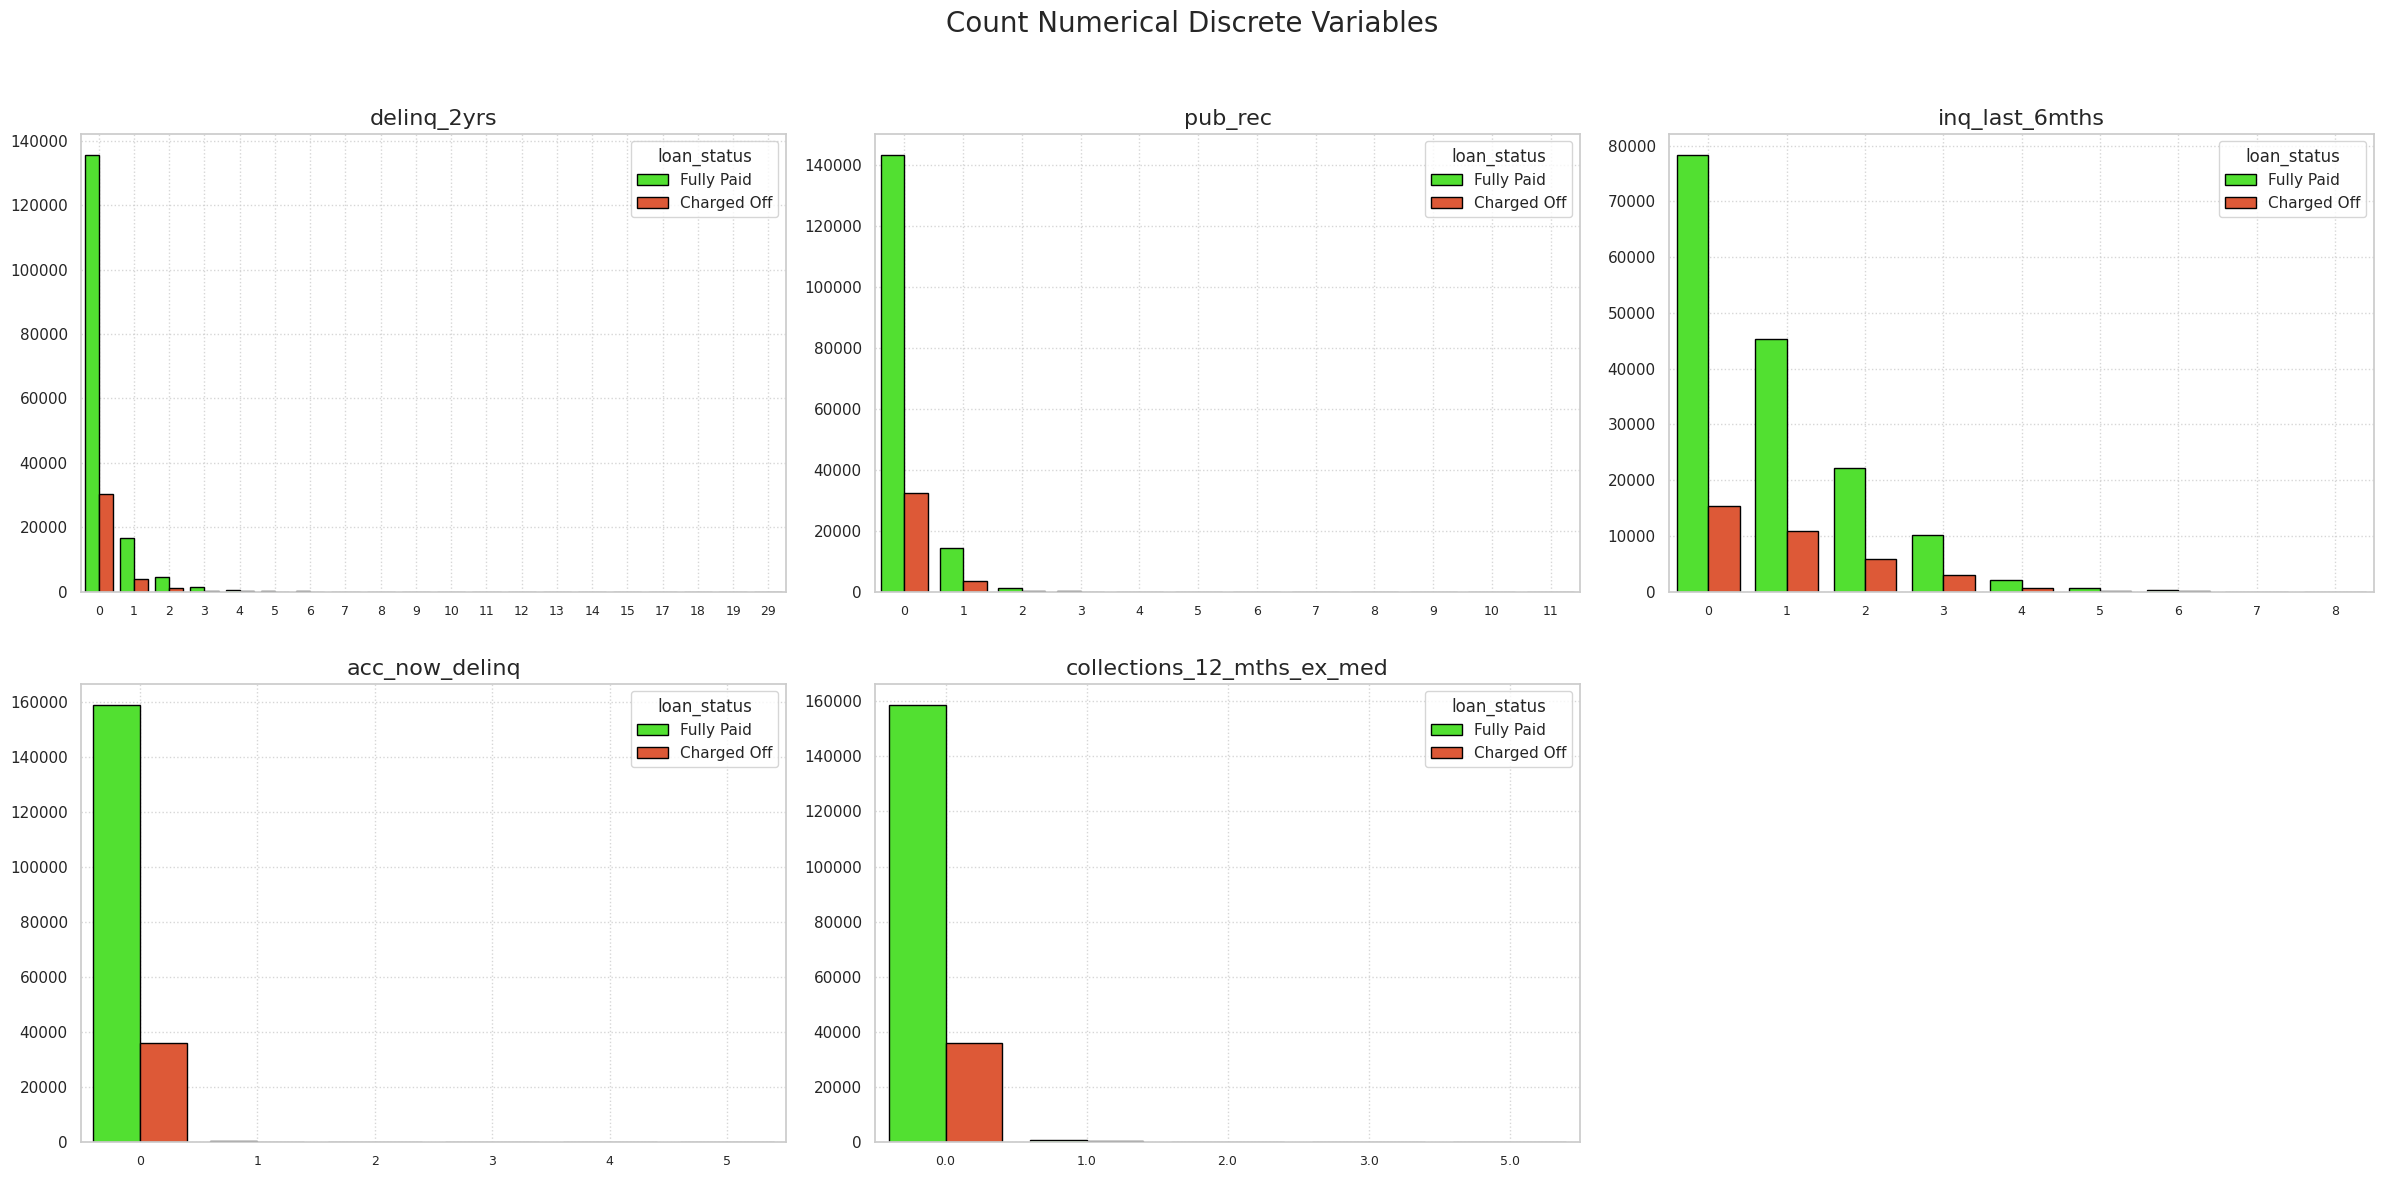

In [0]:
count_cols = [
   'delinq_2yrs', 'pub_rec', 'inq_last_6mths', 'acc_now_delinq', 'collections_12_mths_ex_med', 
]
# Data collect
data_ax = train.toPandas()
fig, ax = plt.subplots(2, 3, figsize = (24, 12))
fig.delaxes(ax[1, 2])

ax = ax.flatten()
grid_style = dict(alpha = 0.8, linestyle = 'dotted')
for i, col_list in enumerate(count_cols):
    sns.countplot(
        data = data_ax,
        x = col_list,
        edgecolor = 'black',
        hue = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize = 9)

plt.suptitle('Count Numerical Discrete Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

### Note:

* In these discrete numerical variables, we have a very large asymmetry, making the information present in them not relevant. I will try a Binning approach, which aims to transform these discrete variables into ordinal categorical variables, thus aiming to bring more information and relevance to our training data.

* However, I will not apply this approach to the variables: **acc_now_delinq**, **collections_12_mths_ex_med** because they have practically only zero values ​​in their columns. Contextually, these variables are of important relevance to solving the problem, but considering the lack of diversity in the values ​​of these variables, what it indicates is that the data for this period was not collected consistently.

In [0]:
def Binning(dataset, cols):
    """
    This function takes a dataset and a list of columns, and applies binning to each column.
    For each specified column, values greater than or equal to 1 are set to 1, and all other values remain unchanged.

    Parameters:
    dataset (DataFrame): The input DataFrame containing the data to be binned.
    cols (list): A list of column names to apply the binning operation.

    Returns:
    DataFrame: The DataFrame with the binned columns.
    """

    for column in cols:
        dataset = dataset.withColumn(column, F.when(F.col(column) > 0, 1).otherwise(F.col(column)))

    return dataset


In [0]:
# Ajusting columns
binary_cols = ['delinq_2yrs', 'pub_rec', 'inq_last_6mths',]
data_corr = Binning(data_corr, binary_cols)
datacorr = data_corr.toPandas()

In [0]:
X = datacorr[['delinq_2yrs', 'pub_rec', 'inq_last_6mths',]]
y = datacorr['loan_status']
# Chi2 and P_values
chi2_stat, p_values = chi2(X, y)

# Show Results
chi2_results = pd.DataFrame({'*feature': X.columns, '*chi2_stat': chi2_stat, '*p_value': p_values})
print(chi2_results)

         *feature  *chi2_stat      *p_value
0     delinq_2yrs   33.568560  6.879577e-09
1         pub_rec   19.022551  1.291827e-05
2  inq_last_6mths  253.550725  4.368889e-57


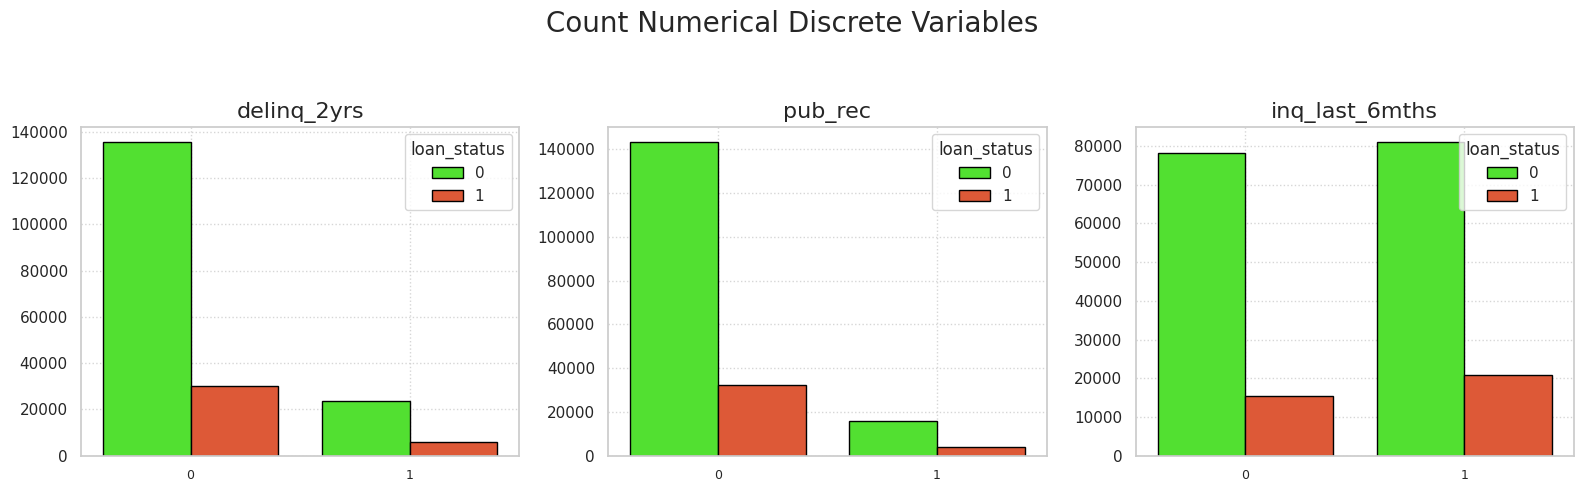

In [0]:
count_cols = [
   'delinq_2yrs', 'pub_rec', 'inq_last_6mths',
]
# Data collect
data_ax = datacorr
fig, ax = plt.subplots(1, 3, figsize = (16, 5))
#fig.delaxes(ax[1, 2])

ax = ax.flatten()
grid_style = dict(alpha = 0.8, linestyle = 'dotted')
for i, col_list in enumerate(count_cols):
    sns.countplot(
        data = data_ax,
        x = col_list,
        edgecolor = 'black',
        hue = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize = 9)

plt.suptitle('Count Numerical Discrete Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

### Insights:

* These variables have a very large asymmetry, which possibly makes it difficult to obtain relevant information for our model. Therefore, I chose to transform them into ordinal categorical columns, considering that **0** is a category that classifies the absence of occurrences and **1** for the occurrence of at least one occurrence, but it can be more than one.

* The variable **delinq_2yrs**, which provides us with information on whether the customer had any default in the 2-year period, demonstrated to have a statistically low relationship with the payment status but is relevant since its p-value is below 0.05, which indicates that it is a possibly significant variable.

* The variable **pub_rec** demonstrated to have a medium correlation with our payment status. Its p-value is below 0.05, which also indicates that it is a potentially significant variable.

* The variable **inq_last_6mths**, which provides us with information about the number of credit inquiries in the last 6 months, has been shown to have a relevant relationship with payment status. Its p-value is low and, graphically, we can see a proportionally higher number of defaulting debtors in cases where there was at least one credit inquiry in the last 6 months.

* The variables **collections_12_mths_ex_med** and **acc_now_delinq**, all have records with the value '0', it is not feasible to keep them because they do not add any information to solve our problem.

### Notes:

* If we consider the data from the set without the training and testing partition, which divided the data according to the date on which the loans were made, the data that lack diversity, such as the columns above, do not present this same problem, the records in the columns above do not have '0' as the only value. This indicates that, in the initial years of the records in this dataset, there was not a good quality of data collection, and over time, this information began to be collected more consistently.

* I will create a list again with the variables to be discarded, at the end of the analysis I will keep only the variables relevant to the training and testing data.

In [0]:
variables_to_discart = ['acc_now_delinq', 'collections_12_mths_ex_med',]


### Columns to histplot:

* To perform the analyses with histplots, considering that I will be using a train data, I will be using **Sturges' rule** to determine the number of bins in the histoplots.

In [0]:
# Determining the number of bins with Sturges' Rule
n = train.count()
bins = round(1 + (3.322 * np.log(n)))
bins

41

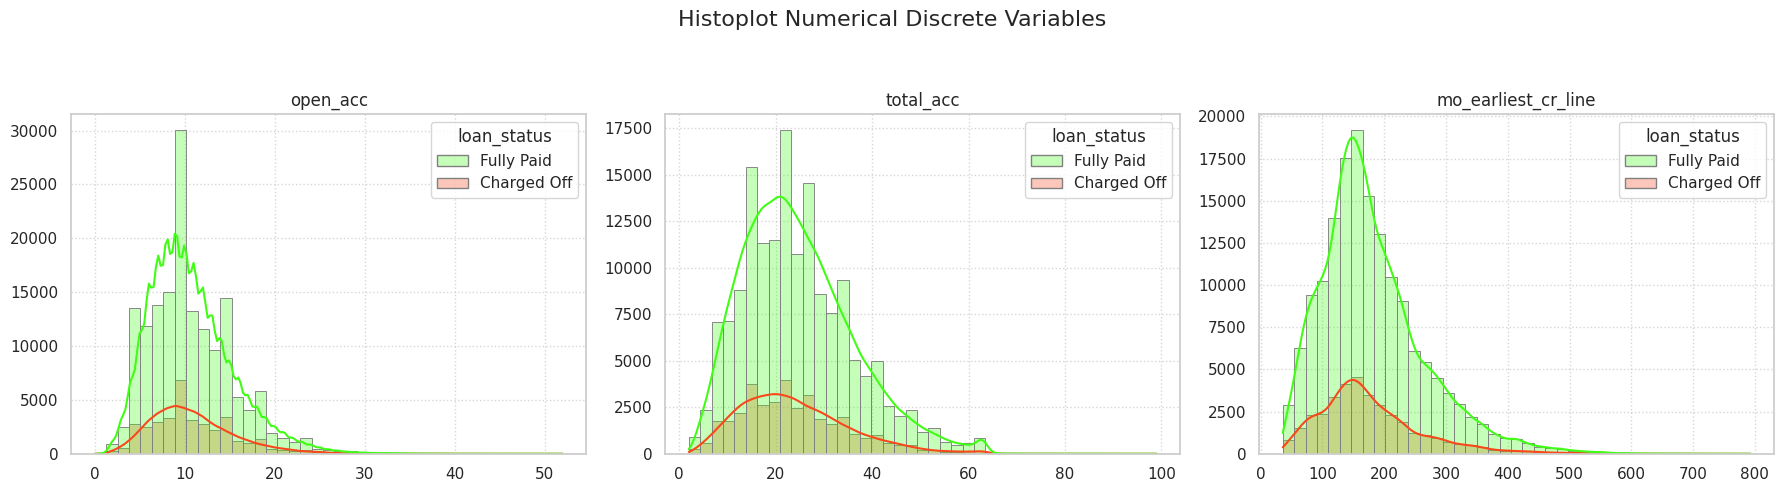

In [0]:
data_ax = train.toPandas()
hist_cols = ['open_acc', 'total_acc', 'mo_earliest_cr_line',]

plt.rc('font', size = 12)
fig, ax = plt.subplots(1, 3, figsize = (18, 5))


ax = ax.flatten()
grid_style = dict(alpha = 0.8, linestyle = 'dotted')
for i, col_list in enumerate(hist_cols):
    sns.histplot(
        data = data_ax,
        x = col_list,
        bins = bins,
        hue = 'loan_status',
        #multiple = 'fill',
        kde = True,
        alpha = 0.3,
        edgecolor = 'grey',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 12)

plt.suptitle('Histoplot Numerical Discrete Variables', fontsize = 16)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

* Checking the describe mo_earliest_cr_line

In [0]:
print('\nFully Paid describe mo_earliest_cr_line: ')
train.filter(F.col('loan_status') == 'Fully Paid') \
    .select('mo_earliest_cr_line') \
    .describe() \
    .display()
print('\nCharged Off describe mo_earliest_cr_line: ')
train.filter(F.col('loan_status') == 'Charged Off') \
    .select('mo_earliest_cr_line') \
    .describe() \
    .display()


Fully Paid describe mo_earliest_cr_line: 


summary mo_earliest_cr_line count 159210 mean 181.06610137554173 stddev 83.61573126686153 min 36 max 793


Charged Off describe mo_earliest_cr_line: 


summary mo_earliest_cr_line count 36212 mean 176.8388103391141 stddev 83.82908777667863 min 36 max 708

* Checking the describe total_acc

In [0]:
print('\nFully Paid describe total_acc: ')
train.filter(F.col('loan_status') == 'Fully Paid') \
    .select('total_acc') \
    .describe() \
    .display()
print('\nCharged Off describe total_acc: ')
train.filter(F.col('loan_status') == 'Charged Off') \
    .select('total_acc') \
    .describe() \
    .display()


Fully Paid describe total_acc: 


summary total_acc count 159210 mean 24.629300923308836 stddev 11.472727684679393 min 2 max 99


Charged Off describe total_acc: 


summary total_acc count 36212 mean 23.87233513752347 stddev 11.278796761870996 min 2 max 88

* Checking the describe open_acc

In [0]:
print('\nFully Paid describe open_acc: ')
train.filter(F.col('loan_status') == 'Fully Paid') \
    .select('open_acc') \
    .describe() \
    .display()
print('\nCharged Off describe open_acc: ')
train.filter(F.col('loan_status') == 'Charged Off') \
    .select('open_acc') \
    .describe() \
    .display()


Fully Paid describe open_acc: 


summary open_acc count 159210 mean 10.659355568117581 stddev 4.676187061659367 min 0 max 52


Charged Off describe open_acc: 


summary open_acc count 36212 mean 10.851320004418424 stddev 4.76784073678164 min 0 max 45

### Insights:

* **mo_earliest_cr_line**: It is possible to conclude that, in a way, some borrowers with a longer credit tenure tend to be less likely to default. However, this rule is not absolute.

* **total_acc**: Provides us with information about the number of credit lines in the borrower's file. We can see that there is a small relationship between the number of credit lines and the payment status. Generally, the higher the number of credit lines, the lower the default rate. However, it is important to note that this relationship is not an absolute rule.

* **open_acc**: Provides us with information about the number of transactions the borrower has had. We can see that there is a slight correlation between the number of transactions and the payment status. Generally, the lower the number of credit lines, the lower the default rate. However, it is important to note that this relationship is not an absolute rule.

### Viewing boxplots of discrete numerical variables

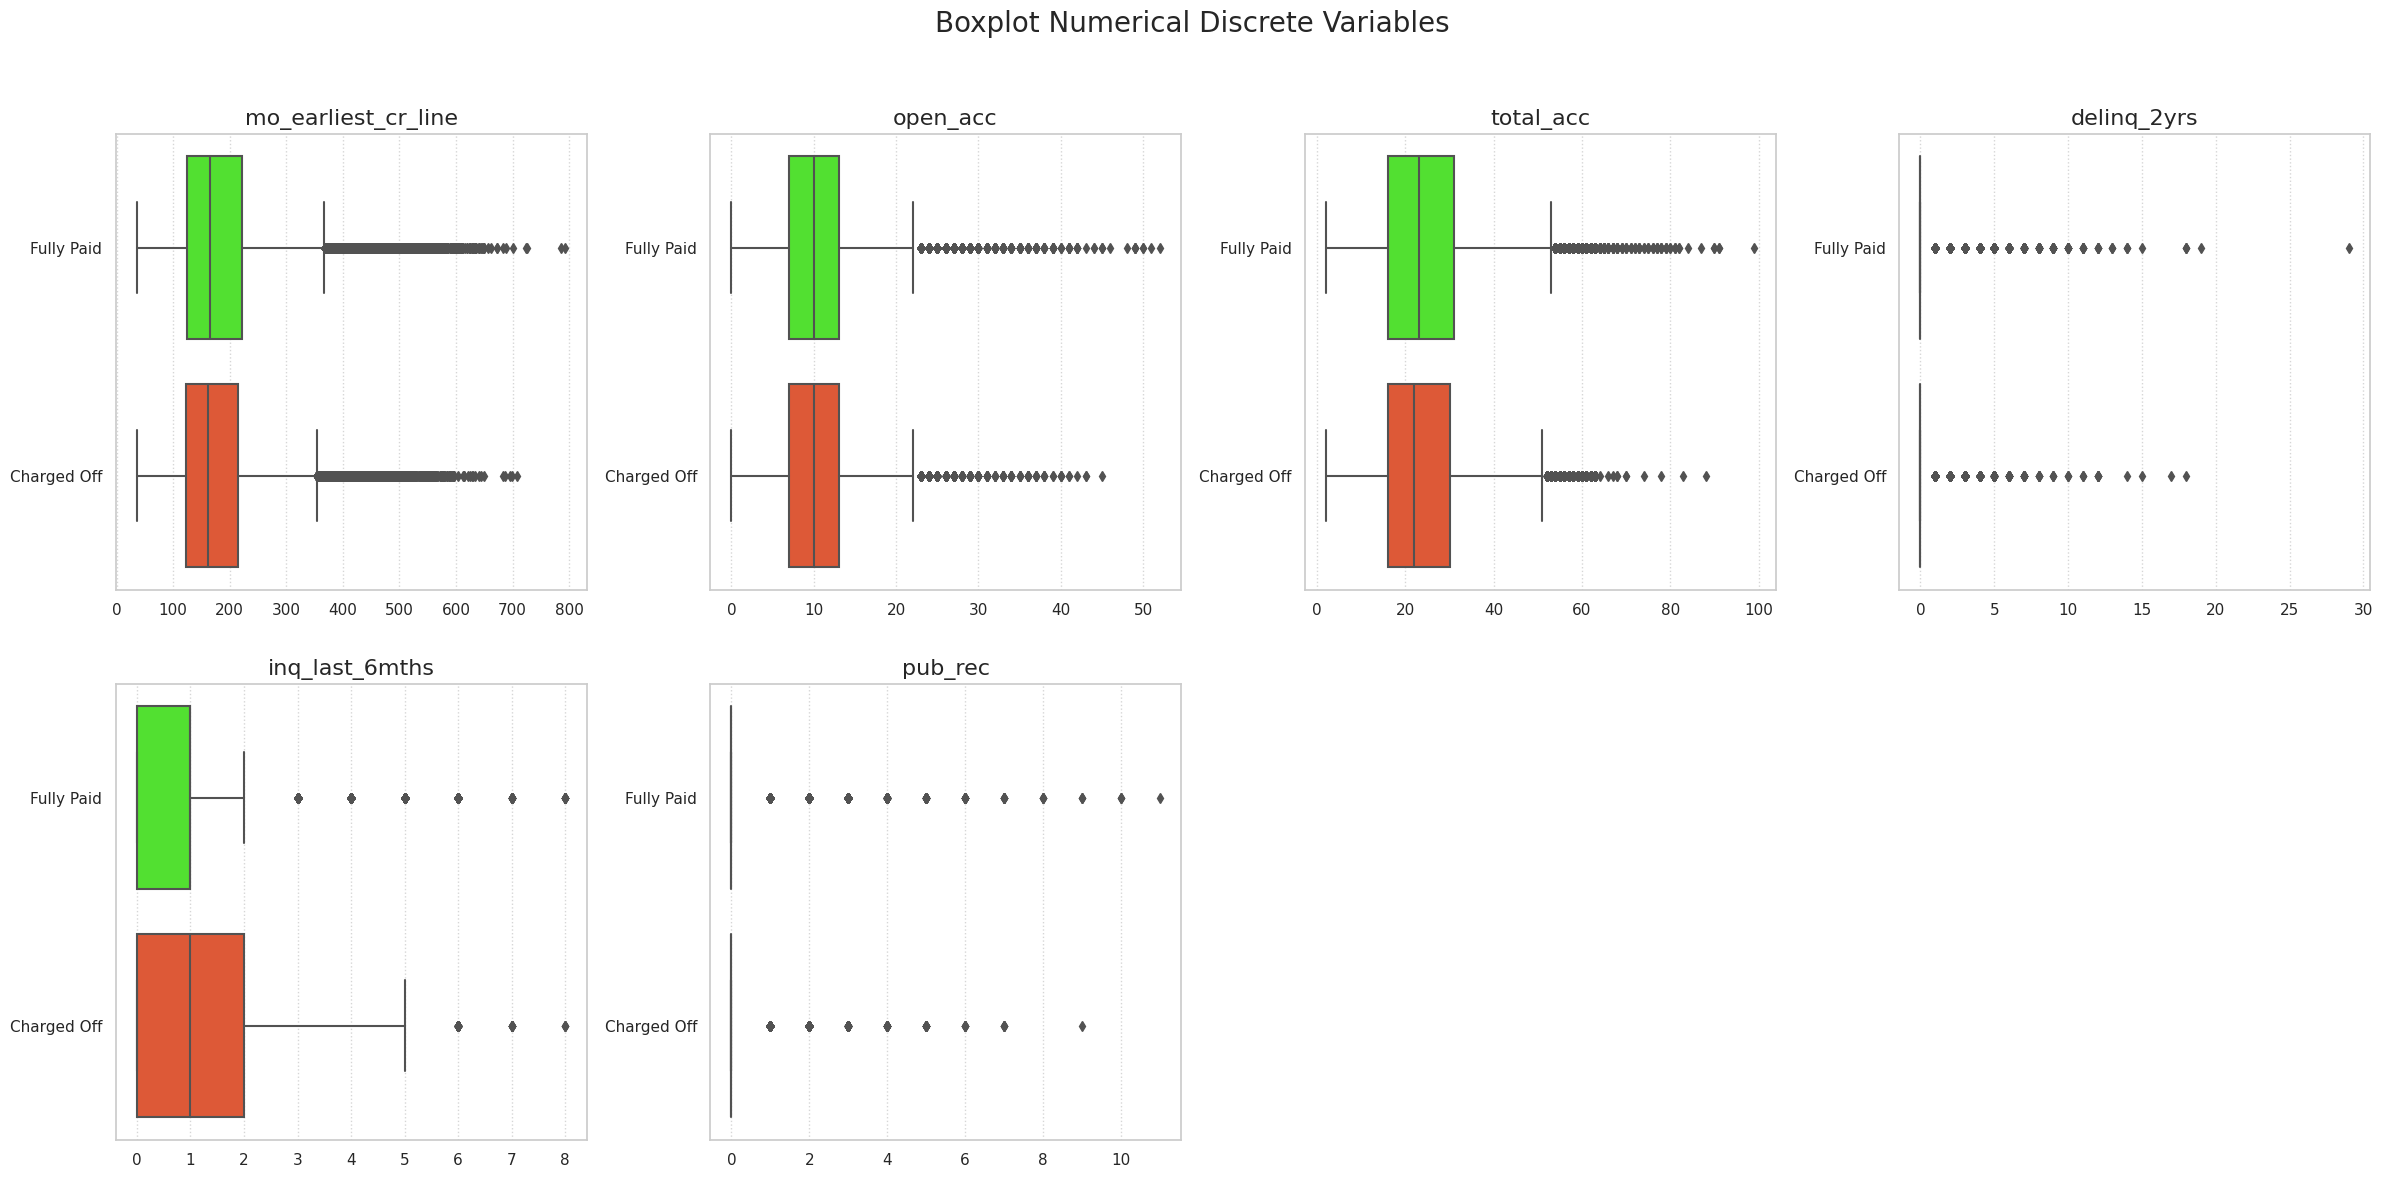

In [0]:
# Data
data_ax = train.toPandas()

num_disc_remain = [
 'mo_earliest_cr_line', 'open_acc', 'total_acc','delinq_2yrs', 'inq_last_6mths', 'pub_rec', 
]

fig, ax = plt.subplots(2, 4, figsize = (24, 12))
fig.delaxes(ax[1, 3])
fig.delaxes(ax[1, 2])

ax = ax.flatten()
grid_style = dict(alpha = 0.8, linestyle = 'dotted')
for i, col_list in enumerate(num_disc_remain):
    sns.boxplot(
        data = data_ax,
        x = col_list,
        y = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid') 
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)

plt.suptitle('Boxplot Numerical Discrete Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

### Note:

It is possible to notice a large number of outliers in most of these variables. Possibly, a good part of them are part of the distribution of this data. Furthermore, it is possible to notice that, in most of this data, the central distributions are similar between the payment statuses, which reflects the analysis of the previous graphs and in a certain way some of these variables will not contribute to the training of our models.

### Cheking numerical continuos variables

In [0]:
train.select(*numerical_continuous).limit(5).display()

loan_amnt funded_amnt int_rate installment annual_inc dti revol_bal revol_util tot_coll_amt tot_cur_bal total_rev_hi_lim 5000.0 5000.0 10.65 162.87 24000.0 27.65 13648.0 83.7 null null null 2500.0 2500.0 15.27 59.83 30000.0 1.0 1687.0 9.4 null null null 2400.0 2400.0 15.96 84.33 12252.0 8.72 2956.0 98.5 null null null 10000.0 10000.0 13.49 339.31 49200.0 20.0 5598.0 21.0 null null null 5000.0 5000.0 7.9 156.46 36000.0 11.2 7963.0 28.3 null null null

In [0]:
# Adjusting the data in the 'annual_inc', 'tot_coll_amt', 'tot_cur_bal' and 'revol_bal' columns so that they can be analyzed
data_ax = data_ax[data_ax['annual_inc'] <= 250000]
data_ax = data_ax[data_ax['revol_bal'] <= 250000]
data_ax = data_ax[data_ax['tot_coll_amt'] <= 10000]
data_ax = data_ax[data_ax['tot_cur_bal'] <= 500000]

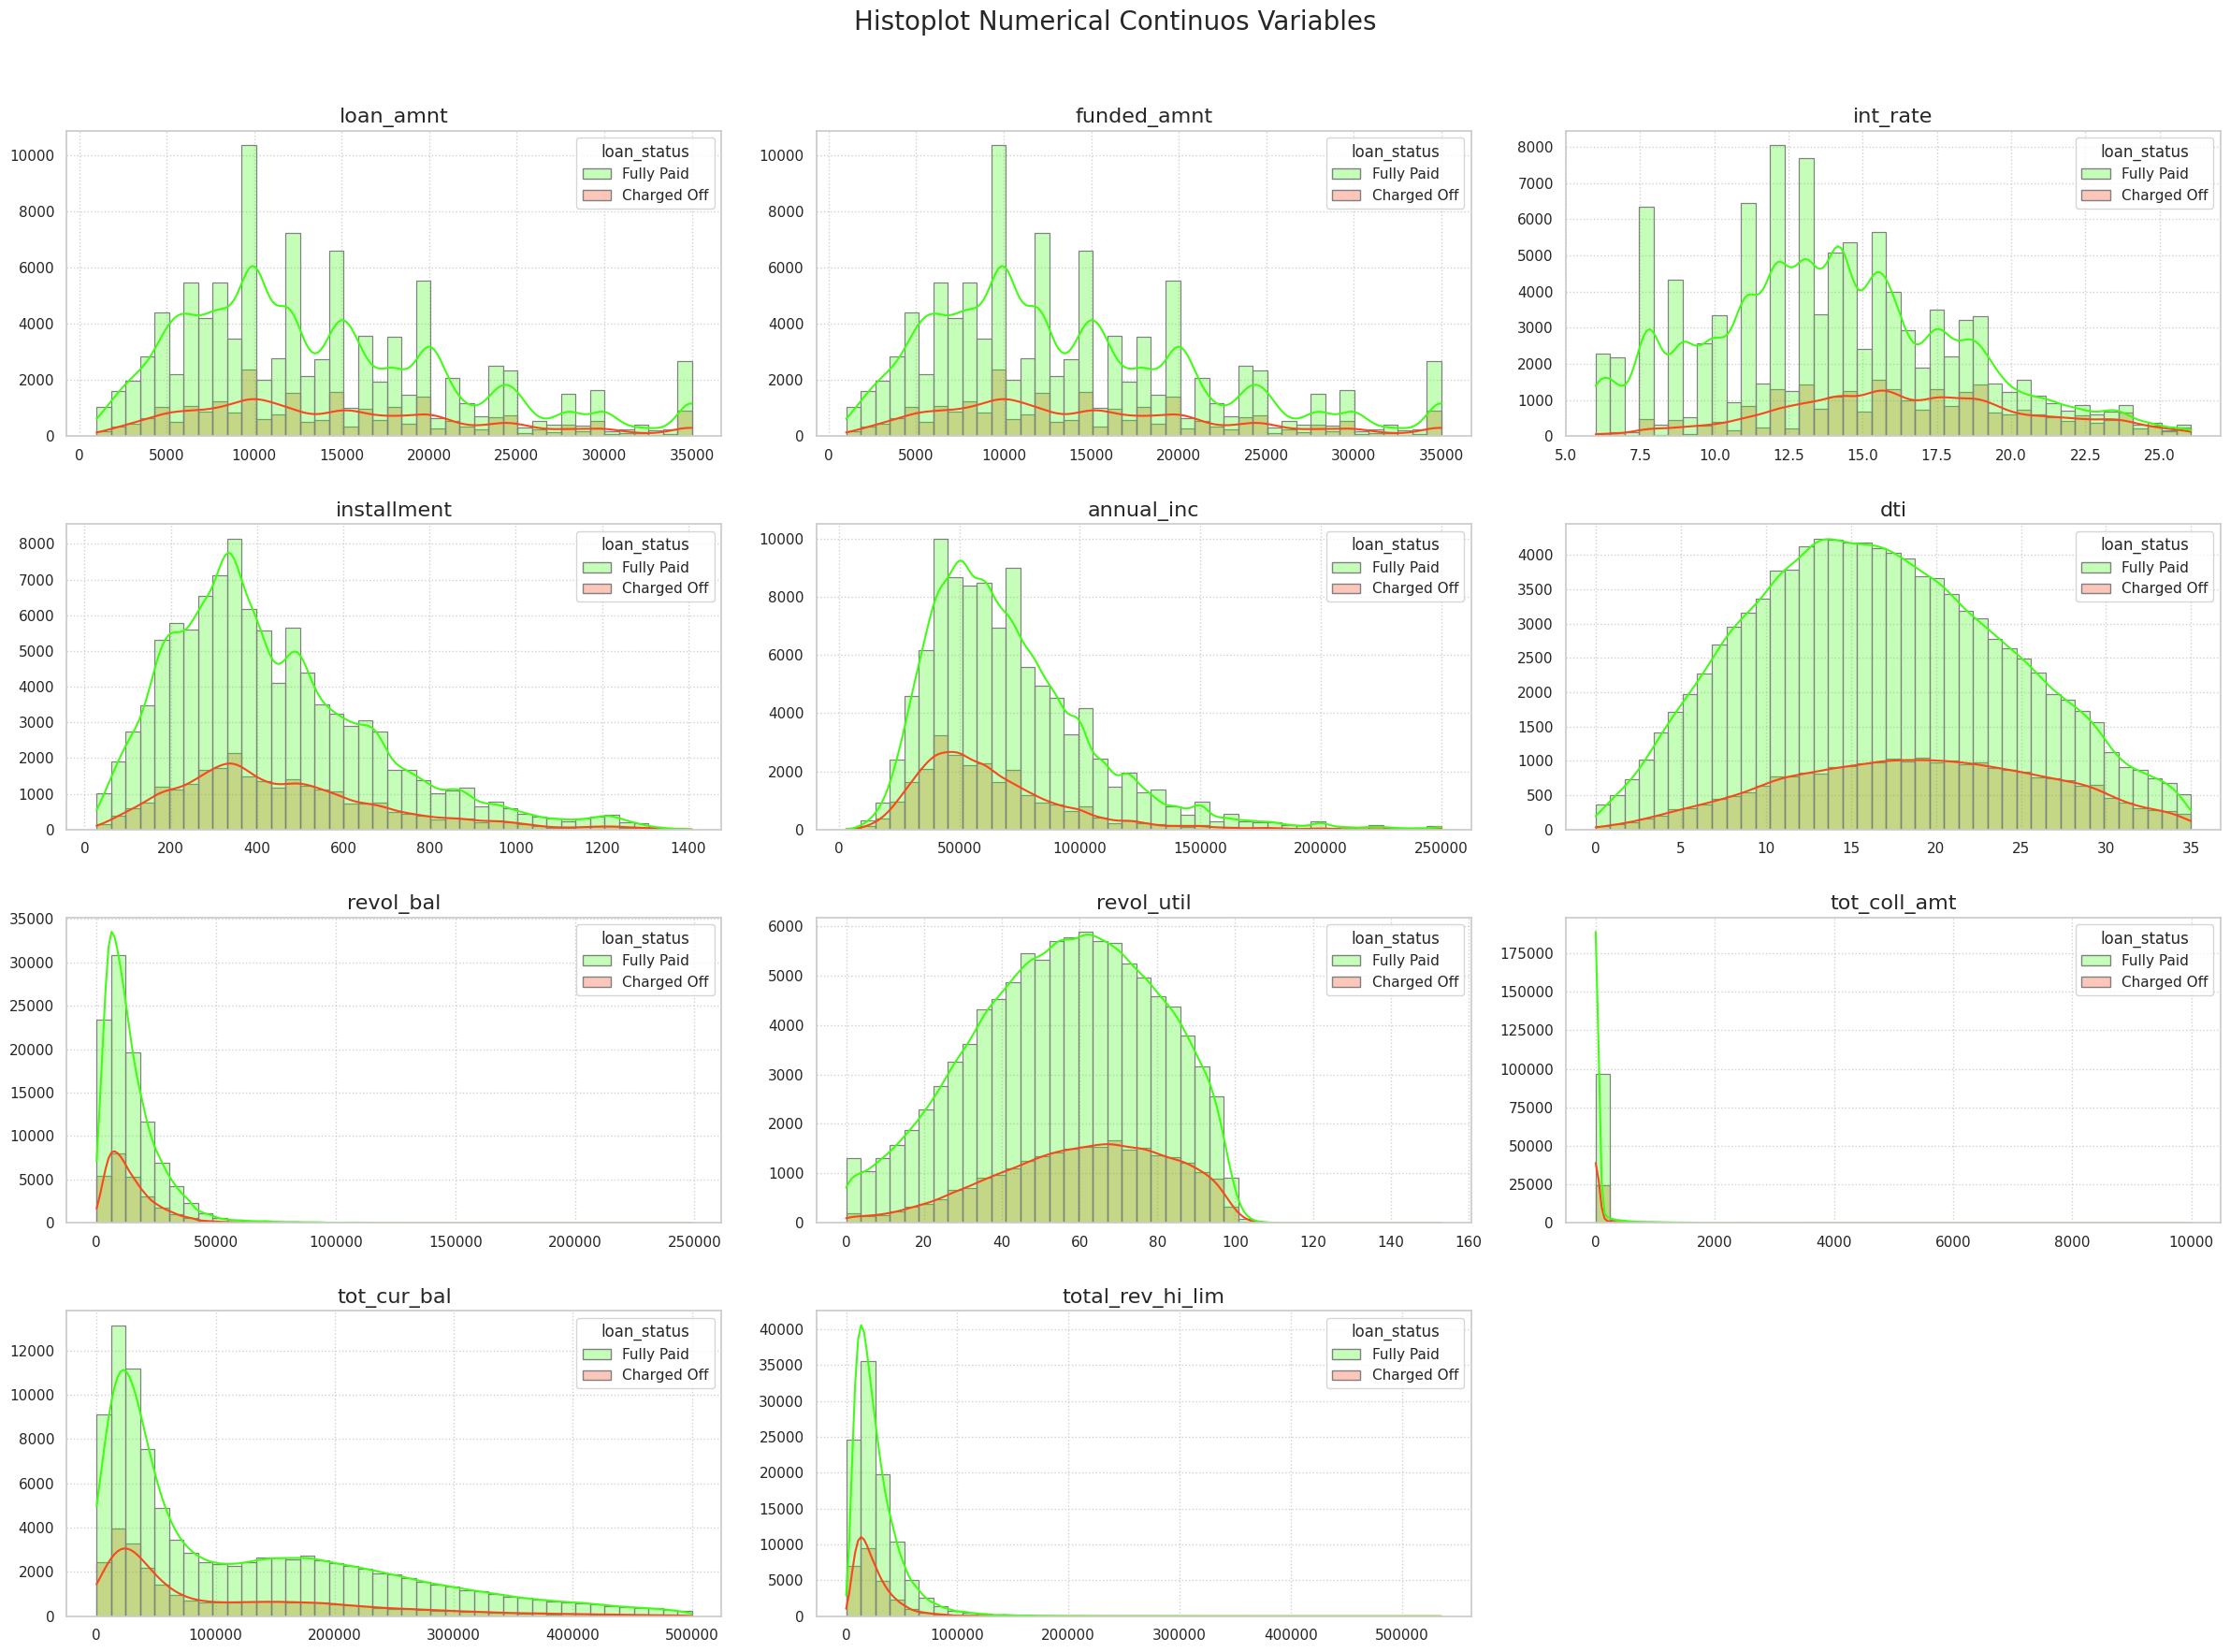

In [0]:
plt.rc('font', size = 12)
fig, ax = plt.subplots(4, 3, figsize = (24, 18))
fig.delaxes(ax[3, 2])
#fig.delaxes(ax[3, 1])
ax = ax.flatten()
grid_style = dict(alpha = 0.9, linestyle = 'dotted')
for i, col_list in enumerate(numerical_continuous):
    sns.histplot(
        data = data_ax,
        x = col_list,
        bins = bins,
        hue = 'loan_status',
        #multiple = 'fill',
        kde = True,
        alpha = 0.3,
        edgecolor = 'grey',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)

plt.suptitle('Histoplot Numerical Continuos Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

* Cheking column 'tot_cur_bal'

Borrowers with a balance below or equal to 50,000.00 Borrowers with a balance below or equal to 50,000.00

In [0]:
tot_cur_bal_low = train.filter(F.col('tot_cur_bal') <= 50000).count()
train.filter(F.col('tot_cur_bal') <= 50000) \
    .groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round(F.col('frequency') / tot_cur_bal_low, 2)) \
    .display()

loan_status frequency percentage Fully Paid 41708 0.78 Charged Off 12054 0.22

Borrowers with balance over 50,000.00

In [0]:
tot_cur_bal_upper = train.filter(F.col('tot_cur_bal') > 50000).count()
train.filter(F.col('tot_cur_bal') > 50000) \
    .groupBy('loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .withColumn('percentage', F.round(F.col('frequency') / tot_cur_bal_upper, 2)) \
    .display()

loan_status frequency percentage Fully Paid 63827 0.82 Charged Off 14139 0.18

Checking column 'tot_coll_amt' 

#### tot_coll_amt:

* This column gives us information about the amount of fees the borrower has paid in the past, which indicates that he may have had difficulty paying back his previous loans. We can see that most of the data in this column are '0' values, which makes its distribution highly skewed. Therefore, I will apply the binning approach to this column.

* I will classify it as follows: Values ​​of '0' will be considered as borrowers who have never paid any fees, indicating that they have not had difficulty paying back their previous loans. Therefore, they will be assigned to **target '0'**.

* Values ​​above '0' will be assigned to **target '1'**, indicating that the borrower has paid fees on his previous loans, which may be an indicator that he has had difficulty paying back his previous loans.



In [0]:
# Ajusting column
binary_cols = ['tot_coll_amt']
data_corr = Binning(data_corr, binary_cols)
data_corr = data_corr.withColumn('tot_coll_amt', F.when(F.col('tot_coll_amt').isNull(), 0).otherwise(F.col('tot_coll_amt')))
datacorr = data_corr.toPandas()

In [0]:
# Checking if the column has statistical relevance with the loan_status variable
X = datacorr[['tot_coll_amt',]]
y = datacorr['loan_status']
# Chi2 and P_values
chi2_stat, p_values = chi2(X, y)

# Show Results
chi2_results = pd.DataFrame({'*feature': X.columns, '*chi2_stat': chi2_stat, '*p_value': p_values})
print(chi2_results)

       *feature  *chi2_stat      *p_value
0  tot_coll_amt   73.869495  8.345611e-18


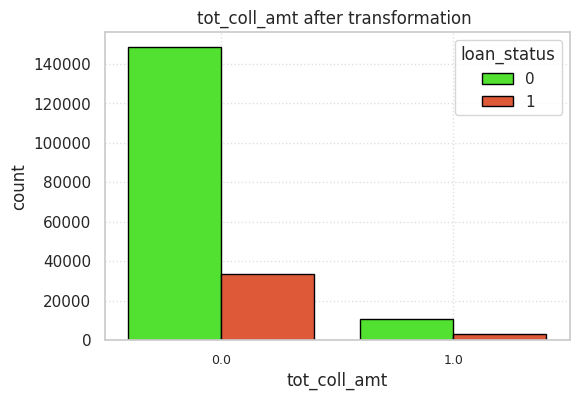

In [0]:
# Data collect
data_ax = datacorr
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

grid_style = dict(alpha = 0.6, linestyle = 'dotted')

sns.countplot(
    data = data_ax,
    x = 'tot_coll_amt',
    edgecolor = 'black',
    hue = 'loan_status',
    palette = ['#40fd14', '#f8481c'],
    ax = ax
    
    )
sns.set(style = 'whitegrid')

ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
#ax.set_xlabel(None)
#ax.set_ylabel(None)
ax.set_title('tot_coll_amt after transformation ', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 9)

plt.show()


### Insights:

* The distribution of the **loan_amnt** variable shows that larger-value loans have a higher default rate compared to loans under $10,000. This relationship suggests that the loan amount may be a relevant factor in determining payments.

* The **funded_amnt** variable has a similar distribution to the **loan_amnt** variable. Therefore, as mentioned previously, this variable provides us with more accurate information about the amounts that were released when the loans were granted, which allows us to draw more accurate and valuable insights and conclusions about our data. However, it cannot be used in our training, as it is a variable that is calculated after the loan is released and not at the time of the request.

* In the **int_rate** variable, we can see that it follows the same trend: the higher the interest rate, the higher the default rate. Loans with interest rates of 20% or more have a higher default rate than others; these loans are almost all in default.

* In the **installment** variable, we can conclude that it follows the same direction as the others: larger installments have a higher default rate compared to smaller installments.

* The **annual_inc** variable has a very varied and dispersed distribution, which makes our analysis somewhat difficult. However, it follows a trend contrary to the other variables: the higher the income, the lower the default rate.

* The variable **dti** has a distribution with an interesting relationship with the payment status. We observe that there is a significant increase in defaulted loans starting at the 20% dti rate. After this point, defaulted loans begin to gradually increase in relation to paid loans. Loans with more than 30% dti have a default rate above 50%, which makes this variable relevant for solving this problem.

* The column **revol_util** provides important information about the movements of borrowers in their revolving credit lines. It has a significant relationship with the payment status. It is possible to observe that values ​​close to the 80% to 120% rate have a higher proportion of defaulted loans compared to other periods.

* The variable **revol_bal** does not appear to have a direct relationship with the payment status, as it follows a similar distribution in both statuses. We may consider working with this variable in another way in the future. The information contained in it is of great value, as it provides us with data on the financial health of our customers. It refers to the revolving balance of the borrower's accounts. When the borrower does not pay his credit card in full, he is left with an outstanding balance for the next bill, and this outstanding balance is our ‘revol_bal’. Therefore, even if this variable does not present a satisfactory correlation index with the payment statuses and, graphically, does not provide us with relevant information, it makes sense to explore it in the future, as contextually it provides us with important information.

* The variable **tot_cur_bal** provides us with information about the current balance of all the borrower’s accounts. It is possible to observe that there is a relationship with the payment status: lower balances tend to have a higher tendency to default compared to higher balances.

* The **total_rev_hi_lim** variable provides us with information about the borrower’s total credit limit. Although it does not seem to have a direct relationship with payment status, it is possible to notice that borrowers with a lower limit have a slightly higher default rate compared to borrowers with a higher limit.

* We have some variables that provide us with relevant and valuable information for solving the problem. Most of them have an **asymmetric distribution to the right**, which means that the highest values ​​are found at the end of the distribution, with a lower frequency than the other values. We have the variables **dti** and **revol_util**, which follow an almost normal distribution. These variables have shown to have important relationships with our payment status. Finally, we have the variable **int_rate**, which both statistically and graphically has shown to have a significantly strong relationship with our payment status, and may be, in a way, our continuous numerical variable with the greatest influence on payment status.

### Viewing boxplots of continuos numerical variables

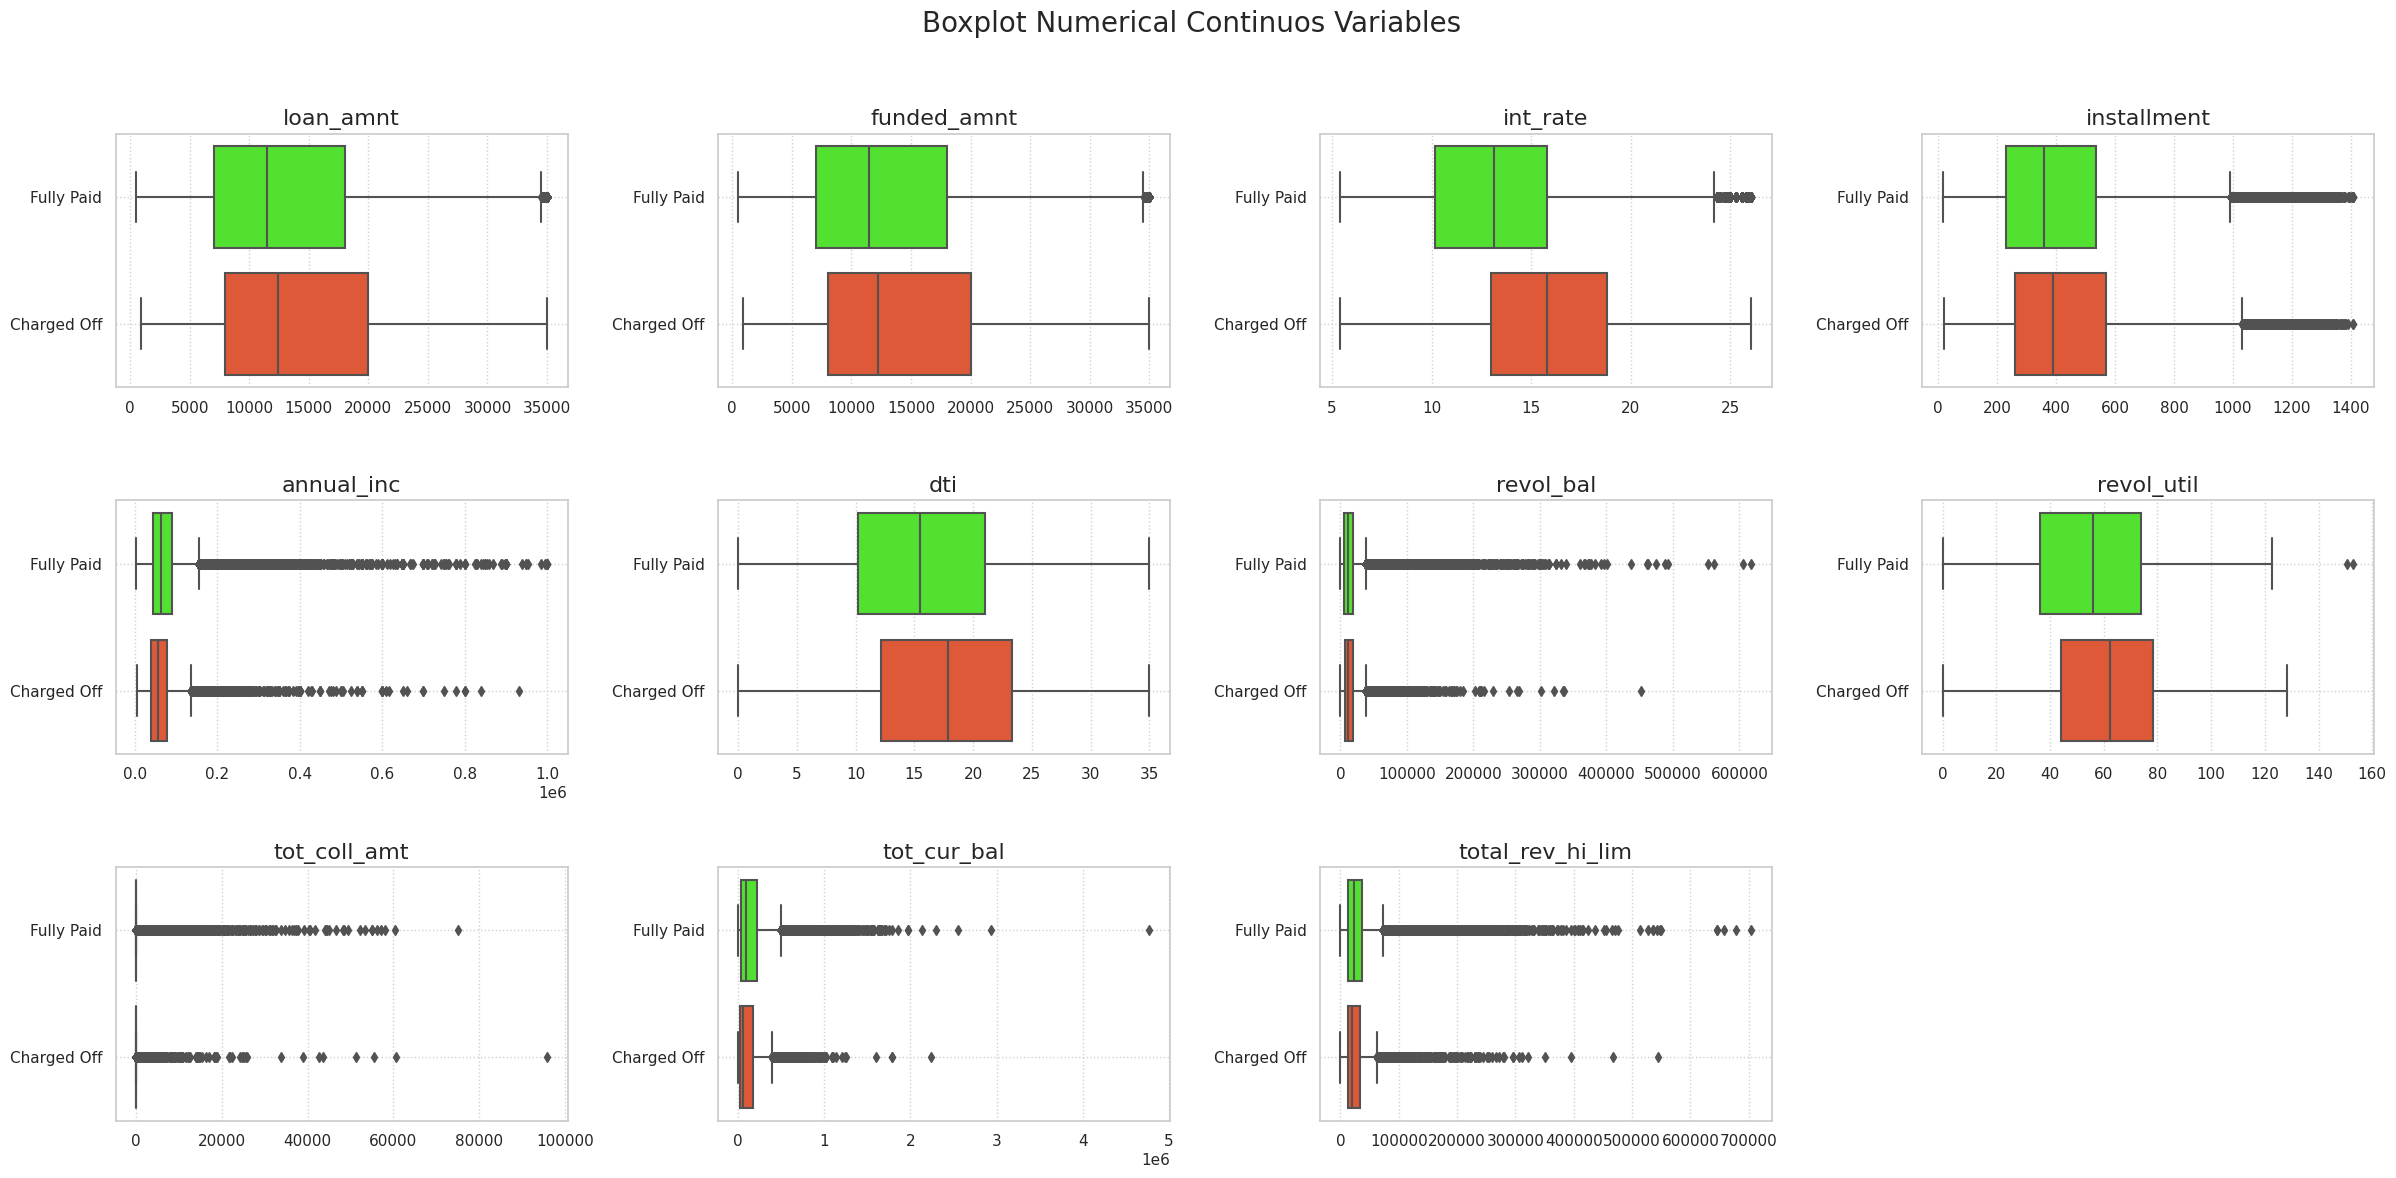

In [0]:
# Data
data_ax = train.toPandas()

#plt.rc('font', size = 10)

fig, ax = plt.subplots(3, 4, figsize = (24, 12))
fig.delaxes(ax[2, 3])
#fig.delaxes(ax[2, 2])


ax = ax.flatten()
grid_style = dict(alpha = 0.9, linestyle = 'dotted')
for i, col_list in enumerate(numerical_continuous):
   
    sns.boxplot(
        data = data_ax,
        x = col_list,
        y = 'loan_status',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)  
    
plt.suptitle('Boxplot Numerical Continuos Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

### Note:

* As with discrete variables, it is possible to notice a large number of outliers in most of these variables. Possibly, a good part of them are part of the distribution of this data. Furthermore, it is possible to notice that, in most of this data, the central distributions are different between the payment statuses, which reflects the analyses of the previous graphs.

### Cheking categorical  variables

In [0]:
train.select(*categorical_nominals, *categorical_ordinals).limit(5).display()

verification_status home_ownership purpose addr_state initial_list_status loan_status grade sub_grade term emp_length Verified RENT credit_card AZ f Fully Paid B B2 36 months 10 Source Verified RENT car GA f Charged Off C C4 60 months 0 Not Verified RENT small_business IL f Fully Paid C C5 36 months 10 Source Verified RENT other CA f Fully Paid C C1 36 months 10 Source Verified RENT wedding AZ f Fully Paid A A4 36 months 3

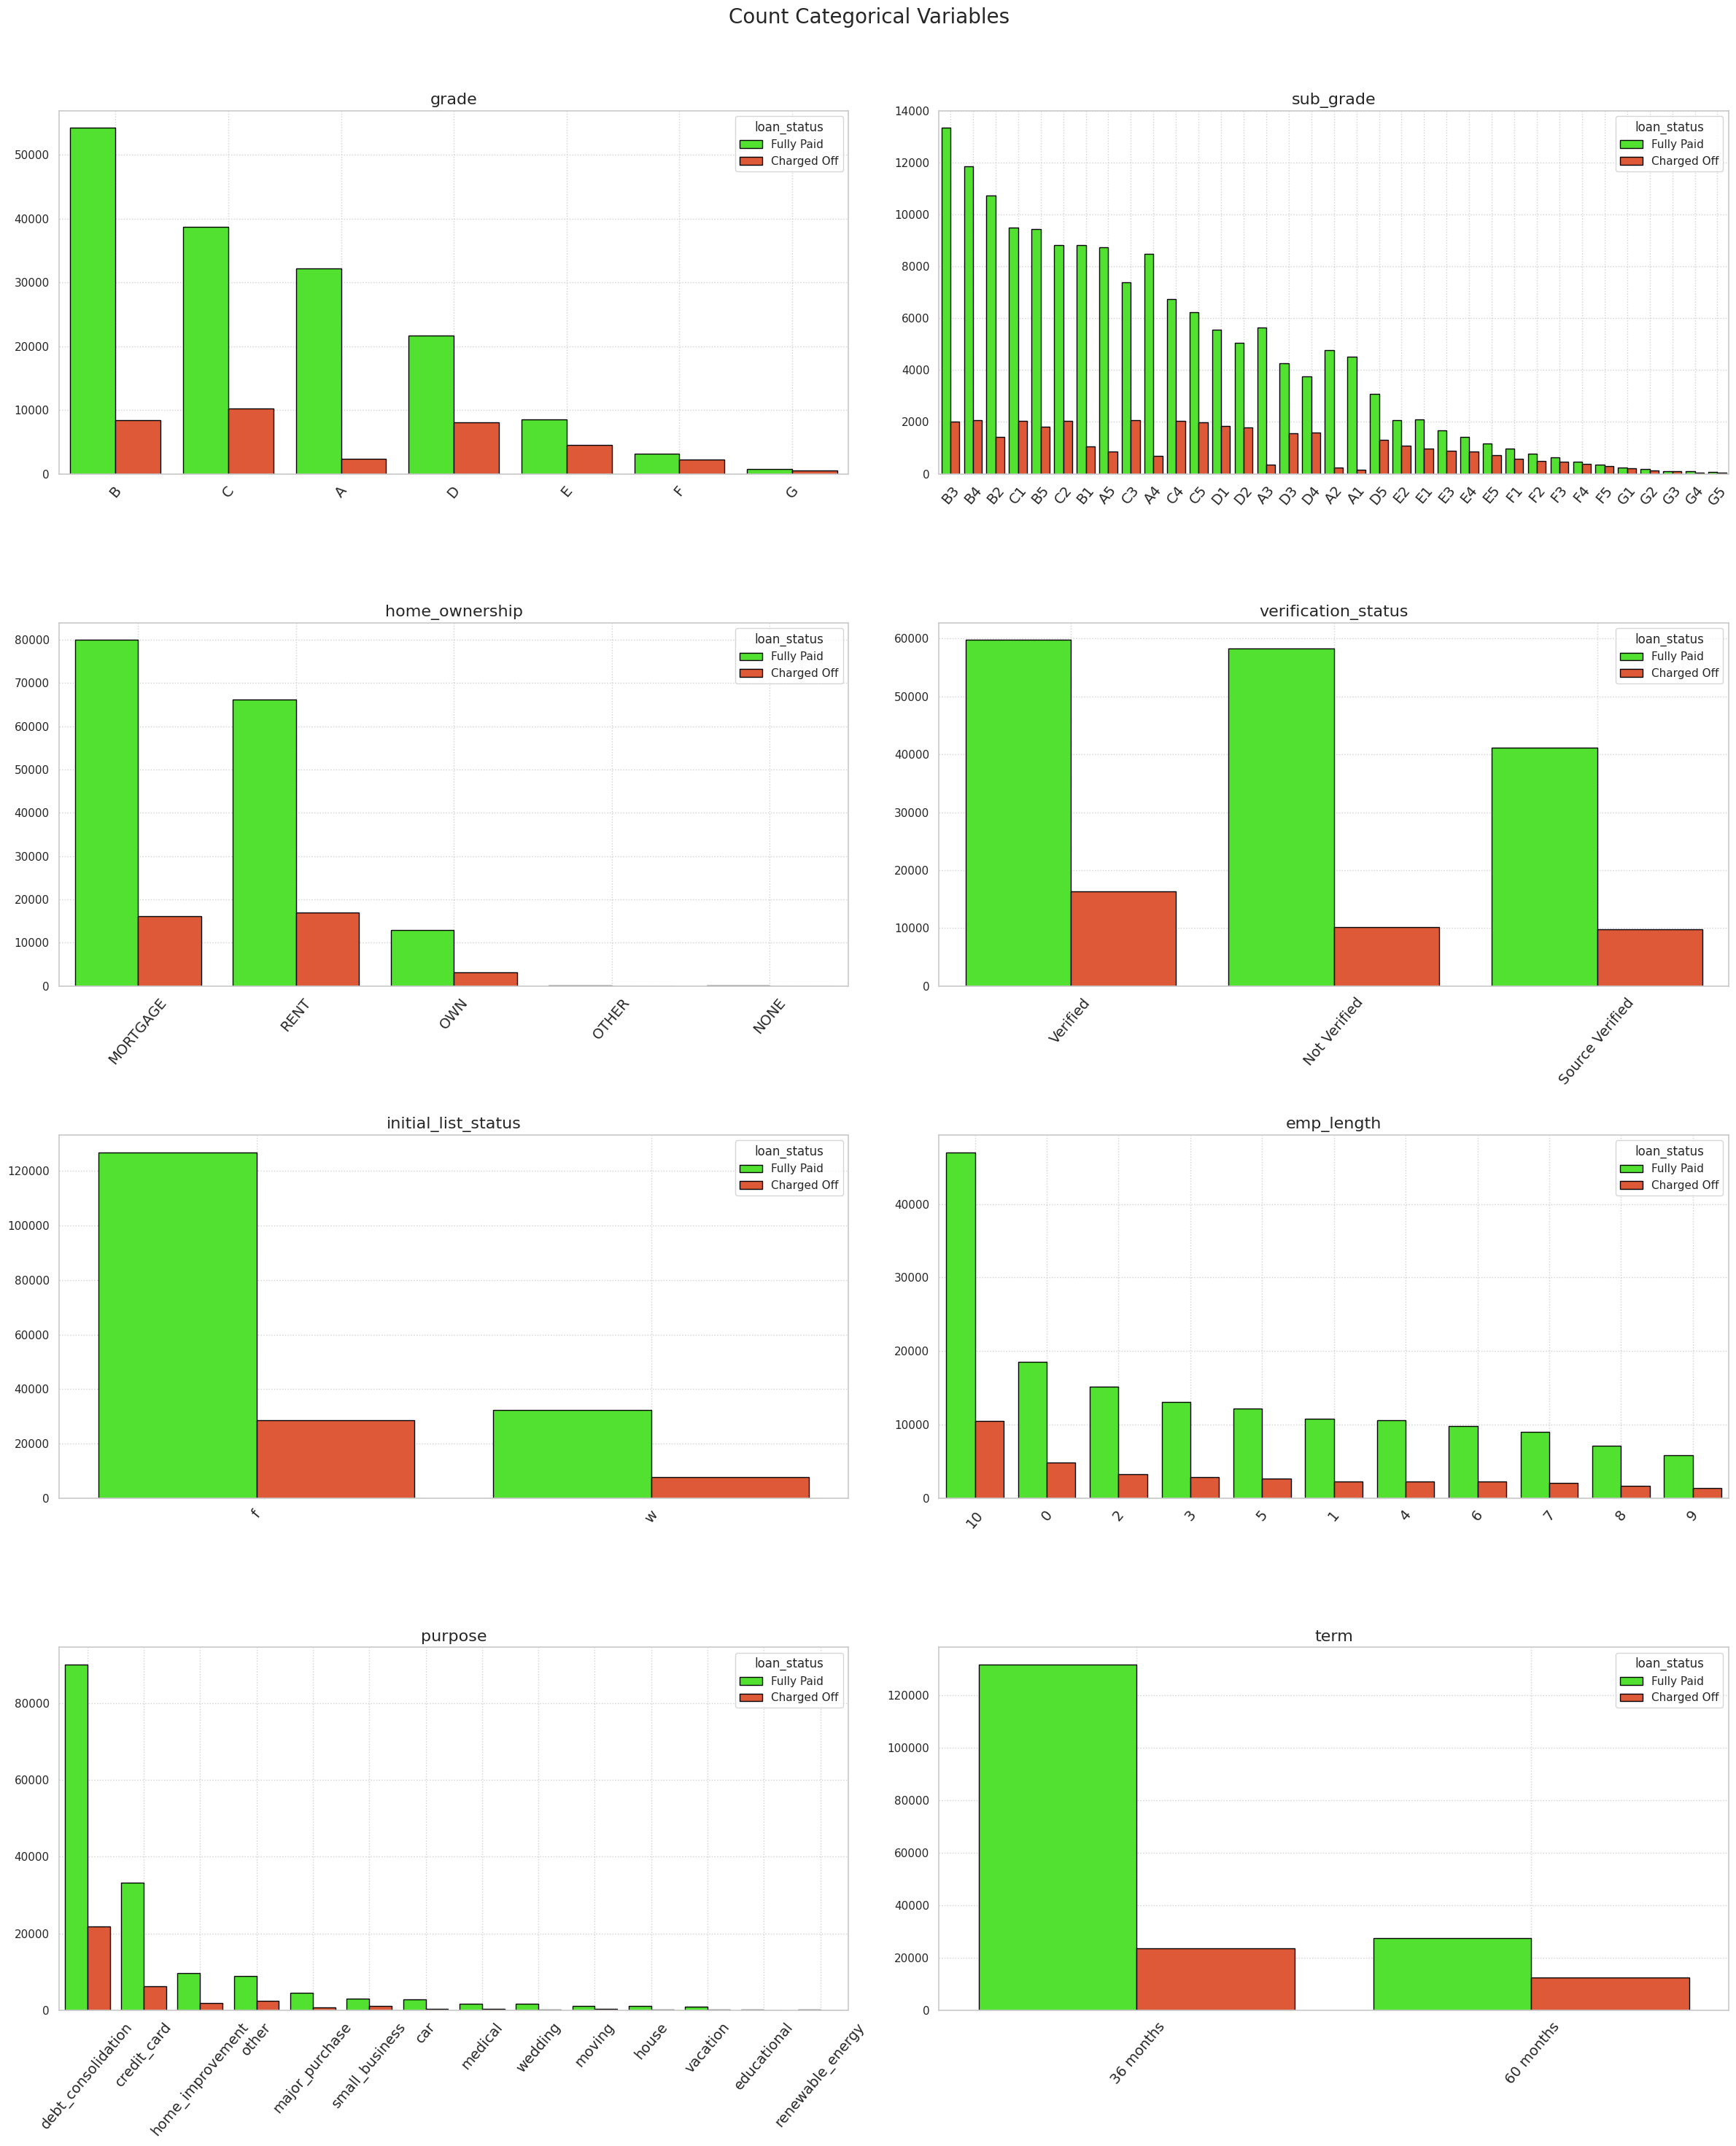

In [0]:
count_cols_str = [
    'grade', 'sub_grade', 'home_ownership', 'verification_status', 'initial_list_status', 'emp_length', 'purpose',
    'term'
]

plt.rc('font', size = 16)
fig, ax = plt.subplots(4, 2, figsize = (24, 30))

ax = ax.flatten()
grid_style = dict(alpha = 0.9, linestyle = 'dotted')
for i, col_list in enumerate(count_cols_str):
    sns.countplot(
        data = data_ax,
        x = col_list,
        hue = 'loan_status',
        order = data_ax[col_list].value_counts(ascending = False).index,
        edgecolor = 'black',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 50, fontsize = 14)

plt.suptitle('Count Categorical Variables', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

* Checking column emp_length  

In [0]:
# Data collect

# Total of emp_length for year
count_emp = data_corr.filter(F.col('emp_length').isNotNull()) \
    .groupBy('emp_length') \
    .agg(F.count('emp_length').alias('frequency')) \
    .orderBy('emp_length') \
    .collect()

count_emp[1][1]

# Total of emp_length for loan_status
count_emp_loan = data_corr.filter(F.col('emp_length').isNotNull()) \
    .groupBy('emp_length', 'loan_status') \
    .agg(F.count('loan_status').alias('frequency'))\
    .orderBy('emp_length', 'loan_status') \
    .collect()

# Printing percentages of loan status for emp_length
cont = 0
for temp_emp in count_emp_loan:
    cont += 1
    if cont == 1:
        print('##########################')

    print(f'\nEmployment time: {temp_emp[0]} years')
    print(f'Loan Status: {temp_emp[1]}')
    print(f'Percentage:{round((temp_emp[2] / count_emp[temp_emp[0]][1] * 100), 2)}\n')

    if cont == 2:
        cont = 0
        print('##########################\n')
    else:
        continue

##########################

Employment time: 0 years
Loan Status: 0
Percentage:79.22


Employment time: 0 years
Loan Status: 1
Percentage:20.78

##########################

##########################

Employment time: 1 years
Loan Status: 0
Percentage:82.37


Employment time: 1 years
Loan Status: 1
Percentage:17.63

##########################

##########################

Employment time: 2 years
Loan Status: 0
Percentage:82.43


Employment time: 2 years
Loan Status: 1
Percentage:17.57

##########################

##########################

Employment time: 3 years
Loan Status: 0
Percentage:82.04


Employment time: 3 years
Loan Status: 1
Percentage:17.96

##########################

##########################

Employment time: 4 years
Loan Status: 0
Percentage:82.71


Employment time: 4 years
Loan Status: 1
Percentage:17.29

##########################

##########################

Employment time: 5 years
Loan Status: 0
Percentage:81.85


Employment time: 5 years
Loan Status: 1
Percenta

* Checking column home_ownership

In [0]:
train.groupBy('home_ownership', 'loan_status') \
    .agg(F.count('loan_status').alias('frequency')) \
    .orderBy('home_ownership', 'loan_status', ascending = False) \
    .display()

home_ownership loan_status frequency RENT Fully Paid 66209 RENT Charged Off 16958 OWN Fully Paid 12887 OWN Charged Off 3110 OTHER Fully Paid 114 OTHER Charged Off 27 NONE Fully Paid 36 NONE Charged Off 7 MORTGAGE Fully Paid 79964 MORTGAGE Charged Off 16110

* Checking column purpose  

In [0]:
# Data collect

# Total of purpose for type
count_purpose = train.filter(F.col('purpose').isNotNull()) \
    .groupBy('purpose') \
    .agg(F.count('purpose').alias('frequency')) \
    .orderBy('purpose') \
    .collect()

# Total of emp_length for loan_status
count_purpose_loan = train.filter(F.col('purpose').isNotNull()) \
    .groupBy('purpose', 'loan_status') \
    .agg(F.count('loan_status').alias('frequency'))\
    .orderBy('purpose', 'loan_status') \
    .collect()

# Printing percentages of loan status for emp_length
cont = 0
cont_var = 0
for quant_purp in count_purpose_loan:
    cont += 1
     
    if cont == 1:
        print('##########################')

    print(f'\nPurpose: {quant_purp[0]}')
    print(f'Loan Status: {quant_purp[1]}')
    print(f'Percentage:{round((quant_purp[2] / count_purpose[cont_var][1] * 100), 2)}\n')

    if cont == 2:
        cont = 0
        cont_var += 1
        print('##########################\n')
    else:
        continue

##########################

Purpose: car
Loan Status: Charged Off
Percentage:12.38


Purpose: car
Loan Status: Fully Paid
Percentage:87.62

##########################

##########################

Purpose: credit_card
Loan Status: Charged Off
Percentage:15.95


Purpose: credit_card
Loan Status: Fully Paid
Percentage:84.05

##########################

##########################

Purpose: debt_consolidation
Loan Status: Charged Off
Percentage:19.48


Purpose: debt_consolidation
Loan Status: Fully Paid
Percentage:80.52

##########################

##########################

Purpose: educational
Loan Status: Charged Off
Percentage:17.23


Purpose: educational
Loan Status: Fully Paid
Percentage:82.77

##########################

##########################

Purpose: home_improvement
Loan Status: Charged Off
Percentage:15.75


Purpose: home_improvement
Loan Status: Fully Paid
Percentage:84.25

##########################

##########################

Purpose: house
Loan Status: Charged Off
Perc

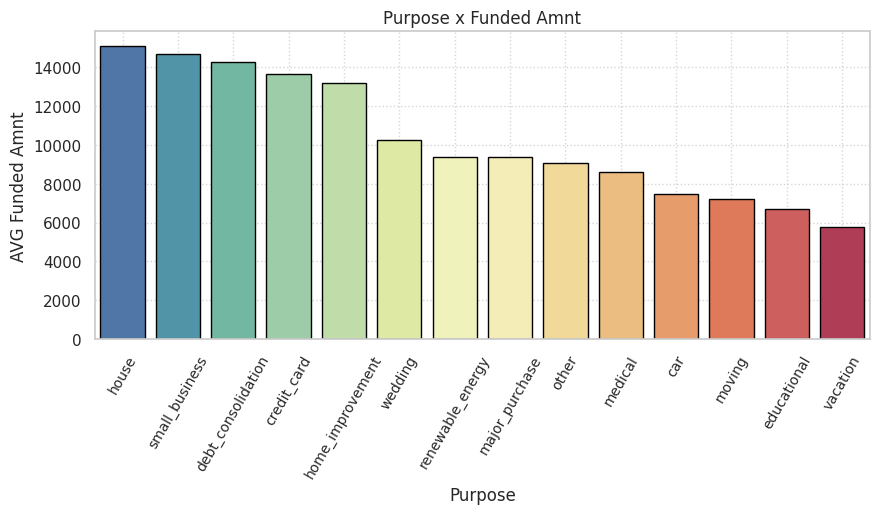

In [0]:
# Defining Data
purpose_loan_amnt = train.groupBy('purpose') \
    .agg(F.round(F.avg('funded_amnt'), 2).alias('avg_funded_amnt')) \
    .orderBy('avg_funded_amnt', ascending = False)
# Data to Pandas
data_ax = purpose_loan_amnt.toPandas()

# Color
palette = sns.color_palette('Spectral_r', 14)

# Create subplots
plt.rc('font', size = 10)
fig, ax= plt.subplots(figsize = (10, 4))
grid_style = dict(alpha = 0.8, linestyle = 'dotted')

# Bar plot ax
sns.barplot(
    data = data_ax,
    x = 'purpose',
    y = 'avg_funded_amnt',
    #hue = 'loan_status',
    dodge = False,
    palette = palette,
    edgecolor = 'black',
    ax = ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 10)
sns.set(style = 'whitegrid')
ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
ax.set_title('Purpose x Funded Amnt')
ax.set_xlabel('Purpose')
ax.set_ylabel('AVG Funded Amnt')

plt.show()

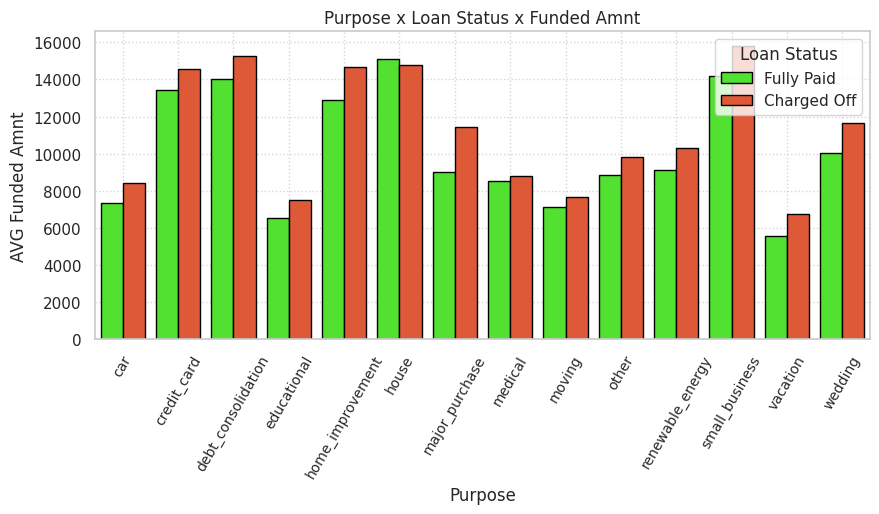

In [0]:
# Defining Data
purpose_loan_status = train.groupBy('purpose', 'loan_status') \
    .agg(F.round(F.avg('funded_amnt'), 2).alias('avg_funded_amnt')) \
    .orderBy('purpose', 'avg_funded_amnt')
# Data to Pandas
data_ax = purpose_loan_status.toPandas()

# Color
palette = ['#40fd14', '#f8481c']

# Create subplots
plt.rc('font', size = 10)
fig, ax= plt.subplots(figsize = (10, 4))
grid_style = dict(alpha = 0.8, linestyle = 'dotted')

# Bar plot ax
sns.barplot(
    data = data_ax,
    x = 'purpose',
    y = 'avg_funded_amnt',
    hue = 'loan_status',
    dodge = True,
    palette = palette,
    edgecolor = 'black',
    ax = ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 10)
sns.set(style = 'whitegrid')
ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
ax.set_title('Purpose x Loan Status x Funded Amnt')
ax.set_xlabel('Purpose')
ax.set_ylabel('AVG Funded Amnt')
ax.legend(title = 'Loan Status', loc = 'upper right')

plt.show()

In [0]:
train.groupBy('purpose') \
    .agg(F.count('purpose').alias('frequency')) \
    .withColumn('percentage', F.round(((F.col('frequency') / train.count()) * 100), 2))\
    .orderBy('frequency', ascending = False) \
    .display()

purpose frequency percentage debt_consolidation 111902 57.26 credit_card 39539 20.23 home_improvement 11464 5.87 other 11267 5.77 major_purchase 5179 2.65 small_business 4199 2.15 car 3150 1.61 medical 2201 1.13 wedding 1952 1.0 moving 1518 0.78 house 1311 0.67 vacation 1195 0.61 educational 325 0.17 renewable_energy 220 0.11

* Checking column addr_state

In [0]:
# Checking loans Fully Paid
# Data
addr_fully_paid =  train.filter(F.col('loan_status') == 'Fully Paid') \
    .groupBy('addr_state') \
    .agg(F.count('loan_status').alias('loan_status'))
data_ax = addr_fully_paid.toPandas()

# Fig maps
ax = go.Figure(
    data = go.Choropleth(locations = data_ax['addr_state'], 
    z = data_ax['loan_status'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'bluyl',
    colorbar_title = 'Count Fully Paid Loans'
))

ax.update_layout(
    title_text = 'Fully Paid Loans x States',
    geo_scope = 'usa',
    width = 800,
    height = 500,
)


In [0]:
# Checking loans Charged Off
# Data
addr_charged_off =  train.filter(F.col('loan_status') == 'Charged Off') \
    .groupBy('addr_state') \
    .agg(F.count('loan_status').alias('loan_status'))
data_ax = addr_charged_off.toPandas()

# Fig maps
ax = go.Figure(
    data = go.Choropleth(locations = data_ax['addr_state'], 
    z = data_ax['loan_status'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'reds',
    colorbar_title = 'Count Charged Off Loans'
))

ax.update_layout(
    title_text = 'Charged Off Loans x States',
    geo_scope = 'usa',
    width = 800,
    height = 500,
)

### Insights:

* The variables **grade** and **sub_grade** are the risk ratings of loans that an institution assigns during the analysis process. We can see that class 'A' is proportionally the one with the fewest defaults in relation to the others. Next, we have class 'B', which is the most participatory in this data and has a satisfactorily low default rate in relation to the others. Classes 'E', 'F' and 'G' are the ones with the most defaults. It is possible to conclude that the lower the class, the higher the defaults.

* Still analyzing the variables **grade** and **sub_grade**, we can see that class 'C', in the context of quantity (not proportion), has the highest number of defaulters. When viewing the 'sub_grade' column, it is possible to see that classes 'C3', 'C4', 'C5' and all 'D' classes store the two highest numbers of defaulters. In contrast, the 'B3' class stores the largest number of paid loans.

* The **home_ownership** variable provides information provided by the borrower about the current status of their home at the time of the loan application. It can be seen that borrowers whose homes are in the ‘RENT’ status, that is, rented homes, are more likely to default than those in other categories. 
The categories **NONE**, **ANY** and **OTHER** represent a very small portion of this variable, about 0.0009% of the total amount of data. I will choose to unify these classes and pass them to the **RENT** class, as it does not make sense to maintain a category with such a small participation as those above. The classes **NONE**, **ANY** and **OTHER** do not fit into any of the main classes, which are: **OWN**, **RENT**, **MORTGAGE**. However, the **RENT** class, which refers to borrowers who rent their homes, is contextually closer to the minority classes in this column.

* The **verification_status** variable shows us three verification statuses:

    * **Verified**: The information provided by the borrower has been verified by the financial institution.

    * **Source Verified**: The information has been verified by a reliable source, but not directly by the financial institution.

    * **Not Verified**: The information provided by the borrower has not been verified.

    * We can see that the **Not Verified** verification statuses have a lower default rate than the others, which was not expected. It is possible to conclude that there is a problem with the **Verified** and **Source Verified** verification statuses. This goes completely against the naturalness of what one would expect in this data. Considering that the purpose of verifications is to analyze and validate the information provided by the loan applicant to prevent possible fraud or defaults due to unrealistic information that may be provided at the time of the loan application, the verifications carried out in recent years by the institution have not had the expected result.

    
    * There may be some factors that contributed to this result, but it would not be appropriate to use this information in our machine learning models, because, in a way, we would be teaching the model that a loan that does not undergo verification is potentially lower risk, when in reality and contextually speaking, this information is not true.

    Therefore, this data, although statistically relevant, will not be viable to use in our training and testing data, because it could bias our model with out-of-context information regarding the verifications of the data provided by loan applicants.

* The variable **initial_list_status** seems to have a significant relationship with the payment statuses, so it will be kept for the model training.

* The **purpose** variable gives us information about the reason why the borrower is requesting the loan. We can see a weak relationship with the payment status, but if we consider the reasons with smaller distributions. This variable has a good value to differentiate defaulted from paid loans. However, it is necessary to evaluate how our model will behave in relation to the number of categories of this variable.

    * Still analyzing the **purpose** variable, we can observe that the reasons 'home', 'small_business', 'debt_consolidation' and 'credit_card' have the highest average values ​​of 'financed_amount'. These categories require loans of larger amounts than the others.

    * Still analyzing the **purpose** variable, it is possible to conclude that, in most cases, loans that have not been paid have a higher average loan amount than loans that have been paid in full.

    * We have the categories **educational** and **renewable_energy** which have a very low share in relation to the other categories. These two categories together have 0.26% of participation in the data which is relatively low compared to the other categories, I will make a small adjustment and move these categories to the **other** category.

* The **term** variable showed a strong correlation with our payment status. Loans with 36-month installments are notably less likely to default than loans with 60-month installments. This could give the lender an opportunity to work with this data, since loans with 60 months to pay have a default rate close to 40%. This could give the lender an opportunity to reduce the loan amount in these cases or increase the interest rate to reduce the potential losses that this installment option could cause..

* The variable **emp_length** provides us with information about the length of employment of borrowers. It can be seen that borrowers with at least 10 years of employment are the majority in this data. The default rates in these categories are quite similar. Borrowers with 4 years of employment have the lowest default rate, followed by borrowers with 2, 1 and 10 years of employment, who have the second lowest default rate. This variable seems to be related to payment status, however, this relationship seems to be weak.

* The variable **addr_state** provides us with information about the states where our borrowers reside. This variable seems to have a very weak relationship with payment status, since the distributions for both payment statuses are quite similar. However, we can extract some information from this variable. It is possible to conclude that the state with the largest number of borrowers is California (CA), which can be considered natural since the institution is headquartered in that state. We also have the state of New York (NY) with the second largest number of clients for the institution, followed by Texas (TX) with the third largest number of clients. This may open the possibility of new strategies to attract new clients in these regions and consider why other regions have a smaller number of clients. Considering that we have a very high cardinality in this variable and that its relationship with payment statuses is low compared to the others, it is not feasible to keep it in our training and testing data.

* Evaluating our categorical variables reveals that we have valuable and highly important information. The **sub_grade**, **term**, and **home_ownership** columns appear to be, at first glance, the most important variables in our data.

Adjusting variables to be discarded

In [0]:
temp_list = [
  'grade', 'verification_status', 'addr_state', 
]
variables_to_discart.extend(temp_list)

### Correlation Variables

Adjusting data according to the variables maintained in the analysis

In [0]:
data_corr = data_corr.drop(*variables_to_discart)

In [0]:
numerical_colums = [
  'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'mo_earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim',
  ]
datacorr = data_corr.select(* numerical_colums).toPandas()
correlation_matrix = datacorr.corr(method = 'spearman', numeric_only = True)

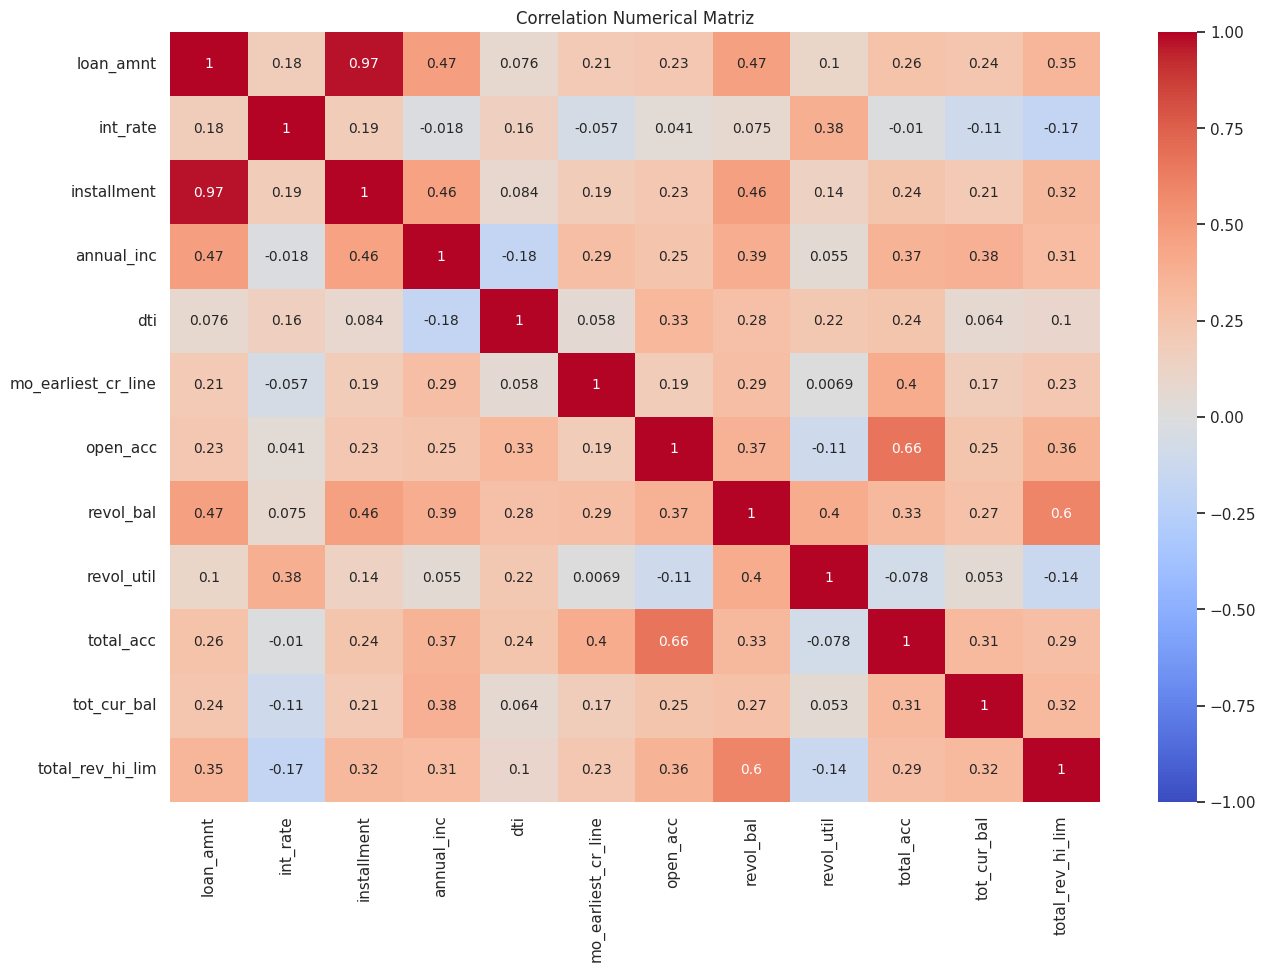

In [0]:
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True , cmap = 'coolwarm', vmin = -1, vmax = 1, ax = ax)
ax.set_title('Correlation Numerical Matriz')
plt.show()

### Note: 

**loan_amnt** x **installment**: There is a very strong correlation between the **loan_amnt** and **installment** variables. Although both provide similar information, there are some differences. The **loan_amnt** variable tells us about the amount granted to the borrower during the loan approval process, while the **installment** variable represents the loan amount in installments, including the calculated interest. However, since the correlation between the two is almost perfect, it makes sense to choose only one of them, since statistically both will be passing the same information to our machine learning models.


### Creating new features


* This dataset has some data that are not viable for training a machine learning model, due to the fact that they **have no relationships with the target variable** and, in some cases, due to the **lack of diversity in the numbers**, since most of the values ​​are **zero**.

* We also have some variables with a very large number of null data that, contextually, would be of great value for our analyses, but because they **do not have even 50% of the valid data**, they were not added to the analyses and training. Due to these facts and characteristics present in this dataset, I will choose to explore the data used in the analyses a little more and look for new possibilities and combination of values ​​for the existing variables.

* Therefore, I will explore new possibilities with our data and check the possibility of combining some characteristics to generate new variables, in order to add information to our data.

* I will use the **data_corr** dataset, since the variables there are already indexed, which facilitates our analyses.


### Real income


* I will be calculating the annual income considering the **DTI** (debt to equity ratio). I will subtract the borrower’s debts and consider only his/her net salary, with debts and liabilities already discounted.

Dti formula:
$$ DTI = \frac{\text{ Total Debts }}{\text{ Total Income  }}{\text{ x 100 }} $$

Real Income formula:

$$ Real Income = {\text{Annual Income - }} \frac{\text{( Annual Income x DTI )}}{\text{100}}$$

In [0]:
data_corr = data_corr.withColumn('real_income', F.round((F.col('annual_inc') - (F.col('annual_inc') * F.col('dti')) / 100), 2))

In [0]:
data_corr.select('annual_inc', 'real_income').limit(10).display()

annual_inc real_income 24000.0 17364.0 30000.0 29700.0 12252.0 11183.63 49200.0 39360.0 36000.0 31968.0 48000.0 45432.0 40000.0 37780.0 15000.0 12288.0 72000.0 60393.6 75000.0 66915.0

### Ability to pay


* I am creating a new column that will interact with the previously created column called **real_income**. This new column will calculate the impact of the monthly installments on the borrower’s monthly income. The calculation will be done as follows: first, I will divide the **real_income by 12**, converting it from annual income to monthly income. Then, I will apply a formula similar to the ‘DTI’ (debt-to-income) calculation to get the impact of the installment on the borrower’s monthly income. I will do this by **dividing the installment amount by the real_income and then multiplying it by 100**. This way, we will get the impact of the installment on the borrower’s monthly income as a percentage.

Ability To Pay formula:

$$ Ability To Pay = \frac{\text{Installment}} {\frac{\text{Real Income }}{\text{12 Months}}}{\text{ x 100}}$$

In [0]:
data_corr = data_corr.withColumn('ability_to_pay', F.round(((F.col('installment') / (F.col('real_income') / 12)  * 100 )), 2))

In [0]:
data_corr.select('real_income', 'installment', 'ability_to_pay').limit(10).display()

real_income installment ability_to_pay 17364.0 162.87 11.26 29700.0 59.83 2.42 11183.63 84.33 9.05 39360.0 339.31 10.34 31968.0 156.46 5.87 45432.0 109.43 2.89 37780.0 152.39 4.84 12288.0 121.45 11.86 60393.6 153.45 3.05 66915.0 402.54 7.22

### Expenses credit rotative vs Income

* The **revol_bal** variable: refers to the borrower's revolving balance, which is the amount unpaid at the end of the credit card billing cycle. In other words, it is the amount of debt that remains after the minimum or partial payment of a credit card bill.

* Although our **revol_bal** variable has shown a low correlation with our payment status, it provides us with very important information to assess the financial health of our borrowers. With this, it was possible to create a new variable that calculates the borrower's monthly income and then the percentage of monthly income committed to the borrower's current revolving balance.

* I then created a new variable that classifies this as follows:

* **A**: borrowers with 50% or less of their monthly income committed to their current revolving balance.

* **B**: borrowers with more than 50% to 120% of their monthly income committed to their current revolving balance.

* **C**: borrowers with more than 120% to 300% of their monthly income committed to their current revolving balance.

* **D**: borrowers with more than 300% of their monthly income committed to their current revolving balance.

Expenses credit rotative vs Income formula:

$$ Expen Cr Inc = \frac{\text{Revol Bal}} {\frac{\text{Anual Income }}{\text{12 Months}}}{\text{ <= Income Commitment Limit }}$$

In [0]:
data_corr = data_corr.withColumn('mo_income', F.round(F.col('annual_inc') / 12, 2)) \
    .withColumn('expen_cr_inc', F.when((F.round(F.col('revol_bal') / (F.col('mo_income')), 2) <= 0.5) , 'A').otherwise(None)) \
    .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 0.5) & 
                                       (F.col('revol_bal') / (F.col('mo_income')) <= 1.2), 'B').otherwise(F.col('expen_cr_inc'))) \
    .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 1.2) & 
                                       (F.col('revol_bal') / (F.col('mo_income')) <= 3), 'C').otherwise(F.col('expen_cr_inc'))) \
    .withColumn('expen_cr_inc', F.when(F.col('revol_bal') / (F.col('mo_income')) > 3 , 'D').otherwise(F.col('expen_cr_inc'))) 

data_corr.groupBy('expen_cr_inc', 'loan_status') \
    .agg(F.count('loan_status')) \
    .orderBy('expen_cr_inc') \
    .display()

expen_cr_inc loan_status count(loan_status) A 0 14320 A 1 2415 B 0 25715 B 1 4846 C 0 66775 C 1 14196 D 0 52400 D 1 14755

### Score_cr

The **score_cr** variable is based on the rules of the FICO Score. This score takes into account some information about the borrower's financial health and generates a score.

*Here are the FICO Score scoring rules:*

* **Payment history (35%)**
* The first thing any lender wants to know is whether you have paid previous credit accounts on time. This helps the lender figure out how much risk they will take on granting you credit. This is the most important factor in a FICO score.

* *Columns in the dataset*: 'delinq_2yrs', 'pub_rec', 'tot_coll_amt'.

* **Amounts owed (30%)**
* Having credit accounts and owing money on them does not necessarily mean you are a high-risk borrower with a low FICO score. However, if you’re using too much of your available credit, it could indicate that you’re overextended — and lenders may interpret this to mean that you’re at higher risk of defaulting.

* *Columns in the dataset*: 'expen_cr_inc', 'revol_util', 'dti'

* **Length of credit history (15%)**
* In general, having a longer credit history is positive for your FICO Scores, but it’s not necessary for a good credit score. How long ago specific credit accounts were established. How long it’s been since you used certain accounts

* *Column in the dataset*: 'mo_earliest_cr_line'

* **Credit mix (10%)**
* FICO Scores will consider your mix of credit cards, retail accounts, installment loans, finance company accounts, and mortgage loans. Don’t worry, you don’t need to have one of each. 

* *Column in the dataset*: 'total_acc'

* **New credit (10%)**
* Research shows that opening multiple credit accounts in a short space of time poses a greater risk – especially for people who don't have a long credit history.

* *Columns in the dataset*: 'open_acc', 'inq_last_6mths'

### Note: 
* I adapted these rules according to the data present in this dataset, defined the maximum score as 1000 and divided this score according to the rules, leaving each category with its determined weight according to the Fico Score rules.

In [0]:
print('Total points: 1000')
print(f'Payment history 35% of points: {1000 * 0.35}')
print(f'Amounts due 30% of points: {1000 * 0.30}')
print(f'Length of credit history 15% of points: {1000 * 0.15}')
print(f'Credit mix 10% of points: {1000 * 0.10}')
print(f'New credit 10% of points: {1000 * 0.10}')

Total points: 1000
Payment history 35% of points: 350.0
Amounts due 30% of points: 300.0
Length of credit history 15% of points: 150.0
Credit mix 10% of points: 100.0
New credit 10% of points: 100.0


In [0]:
# Payment history: 350 points divided by 3 features('delinq_2yrs', 'collections_12_mths_ex_med', 'tot_coll_amt') = 166.66.
weigth_pay_history = (350 / 3)

# Amounts due: 350 points divided by 3 features('expen_cr_inc', 'revol_util', 'dti') = 100.
weigth_amnt_due = (300 / 3)

# Length of credit: 150 points only feature('credit_time') = 150.
weigth_length_cr = 150

# Credit mix: 100 points only feature('total_acc') = 100.
weigth_cr_mix = 100

# New credit: 100 points divided by 2 features('open_acc', 'inq_last_6mths') = 50.
weigth_new_cr = (100 / 2)

data_corr = data_corr.withColumn('score_cr', F.lit(0)) \
    .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 0, 
                                   F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 1, 
                                   F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('pub_rec') == 0, 
                                   F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('pub_rec') == 1, 
                                   F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 0, 
                                   F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 1, 
                                   F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'A', 
                                   F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'B', 
                                   F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'C', 
                                   F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'D', 
                                   F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('dti') <= 10, 
                                   F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(((F.col('dti') <= 20) & ( F.col('dti') > 10)), 
                                   F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(((F.col('dti') <= 30) & (F.col('dti') > 20)), 
                                   F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('dti') > 30, 
                                   F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('revol_util') <= 30, 
                                   F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(((F.col('revol_util') <= 60) & ( F.col('revol_util') > 30)), 
                                   F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(((F.col('revol_util') <= 90) & (F.col('revol_util') > 60)), 
                                   F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('revol_util') > 90, 
                                   F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') > 150, 
                                   F.col('score_cr') + (weigth_length_cr)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') <= 150, 
                                   F.col('score_cr') + (weigth_length_cr / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('total_acc') > 20, 
                                   F.col('score_cr') + (weigth_cr_mix)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('total_acc') <= 20, 
                                   F.col('score_cr') + (weigth_cr_mix / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('open_acc') <= 10, 
                                   F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('open_acc') > 10, 
                                   F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 0, 
                                   F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 1, 
                                   F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
    .withColumn('score_cr', F.round(F.col('score_cr'), 2))

data_corr.select('score_cr').limit(10).display()

score_cr 716.67 875.0 708.33 858.33 733.33 716.67 708.33 700.0 850.0 783.33

### Note:

Rules applied in the division of missions: Each category had a weight defined according to its percentage over the maximum score:

**Payment history**

* **delinq_2yrs**: 

* If there was no default: Maximum score.

* If there was at least one delinquency: Only 50% of the score.

* **pub_rec**: 

* If there was no collection: Maximum score.

* If there was at least one collection: Only 50% of the score.

* **tot_coll_amt**: 

* If there was no collection payment: Maximum score.

* If there was one less collection payment: Only 50% of the score.

**Amounts due** *

**expen_cr_inc**:

* A: Maximum score.

* B: Only 50% of the score.

* C: Only 33% of the score.

* D: Only 25% of the score.

**dti**:

* dti <= 10%: Maximum score.

* dti <= 20%: Only 50% of the score.

* dti <= 30%: Only 33% of the score.

* dti > 30%: Only 25% of the score.

**revol_util**:

* revol_util <= 30%: Maximum score.

* revol_util <= 60%: Only 50% of the score.

* revol_util <= 90%: Only 33% of the score.

* revol_util > 90%: Only 25% of the score.

**Length of credit history**

**mo_earliest_cr_line**:

* credit_time > 150: Maximum score.

* credit_time <= 150: Only 50% of the score.

**Credit mix**

**total_acc**:

* total_acc > 20: Maximum score.

* total_acc <= 20: Only 50% of the score.

**New credit**

**open_acc**:

* open_acc <= 10: Maximum score.

* open_acc > 10: Only 50% of the score.

**inq_last_6mths**:

* No inquiries: Maximum score.

* At least one inquiry: Only 50% of the score.

### Checking the correlation of the new variables with the payment statuses

In [0]:
numerical_colums = [ 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 'real_income', 'ability_to_pay', 'score_cr',  'loan_status']
datacorr_num = data_corr.select(*numerical_colums).toPandas()
correlation_matrix = datacorr_num.corr(method = 'spearman', numeric_only = True)

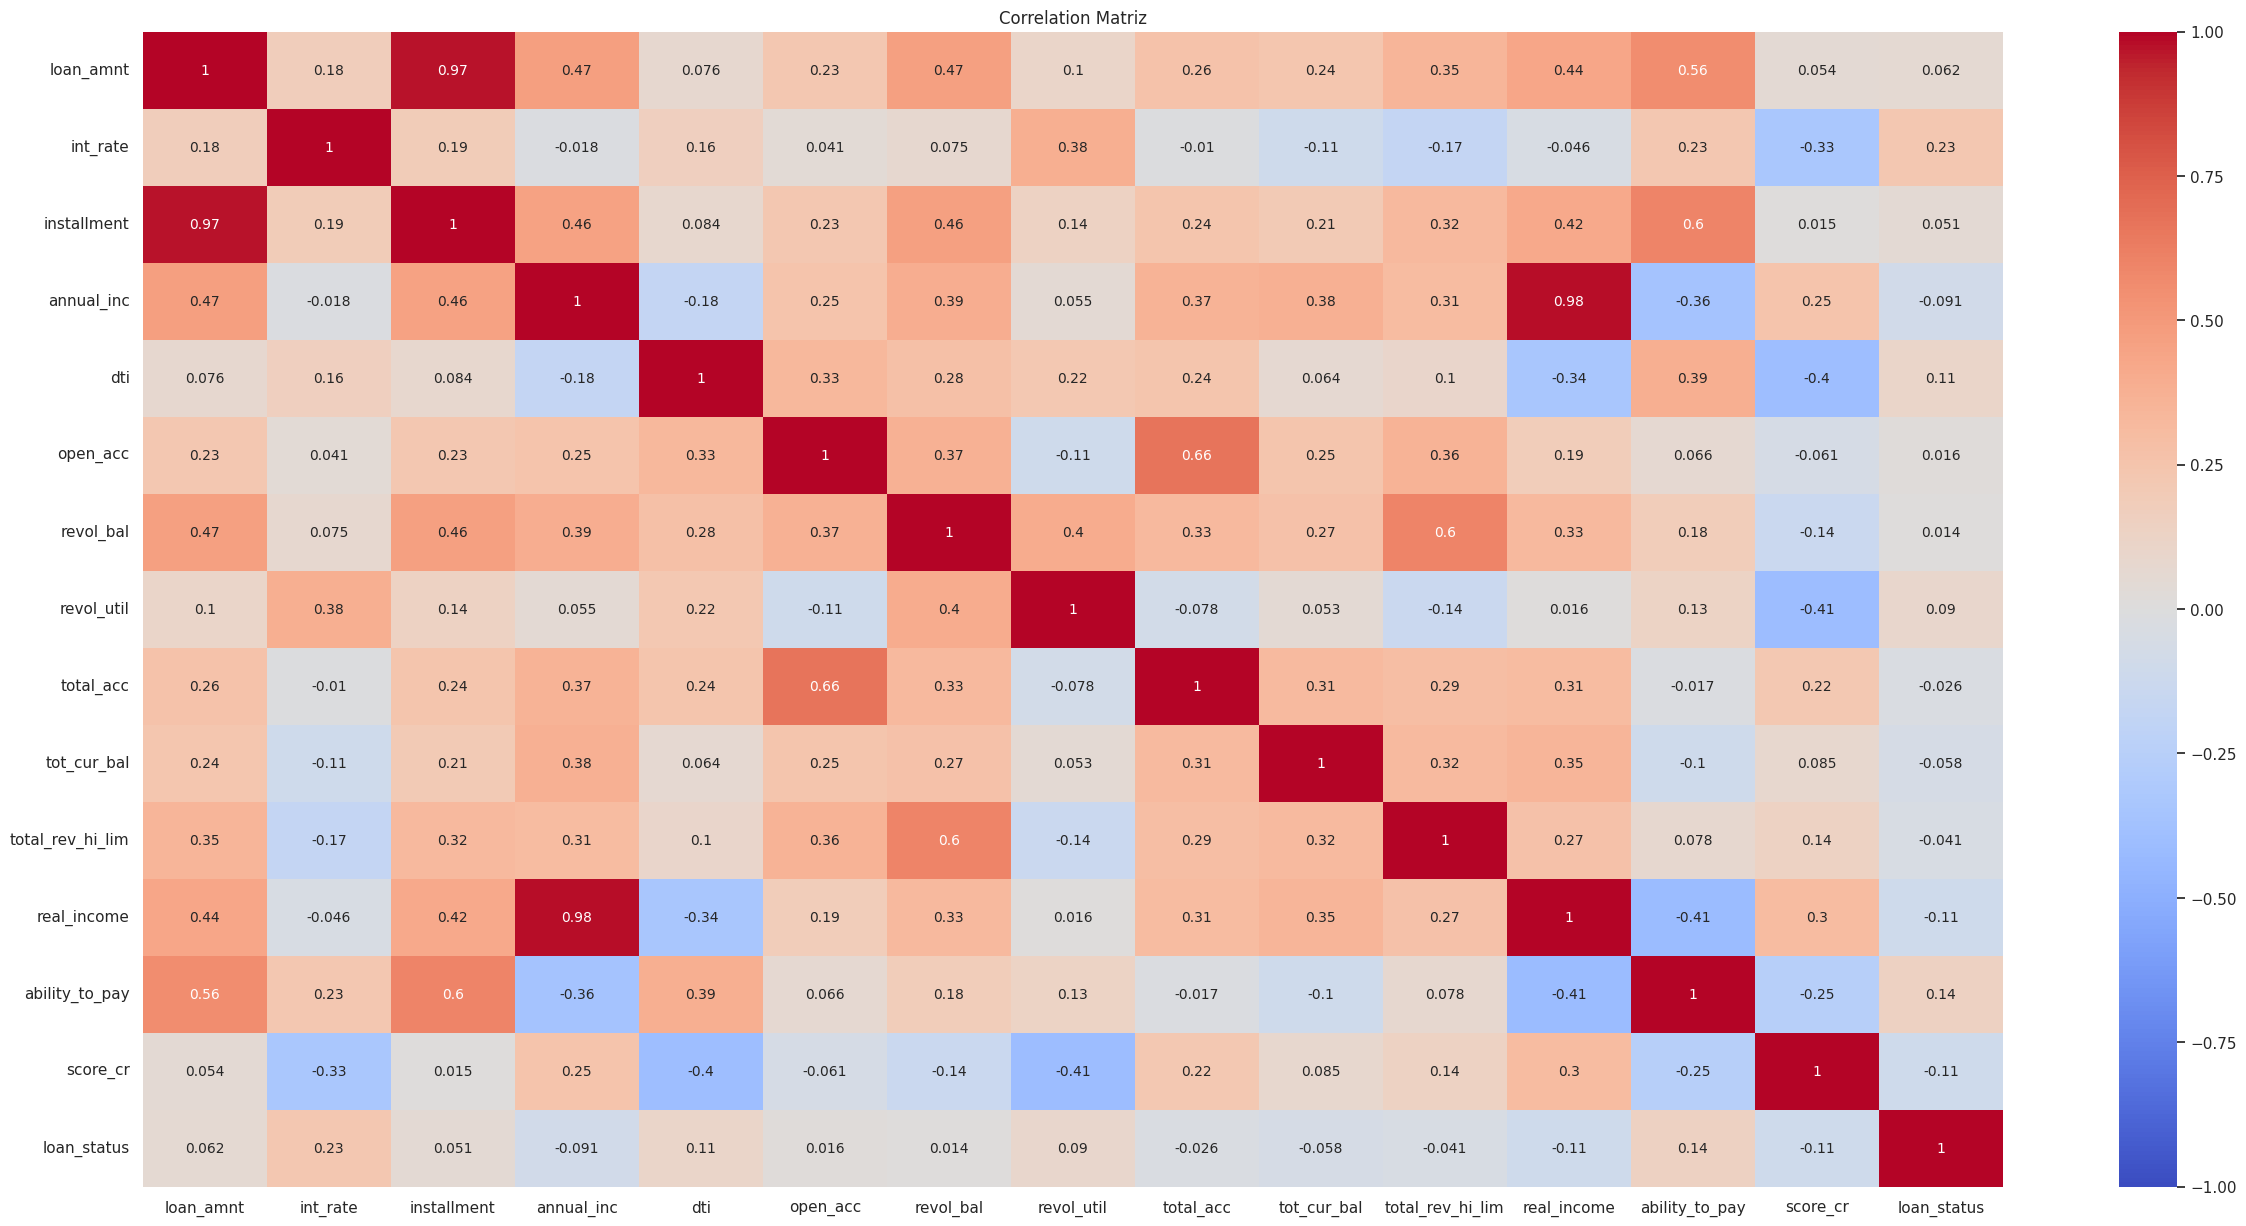

In [0]:
plt.rc('font', size = 10)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(correlation_matrix, annot = True , cmap = 'coolwarm', vmin = -1, vmax = 1, ax = ax)
ax.set_title('Correlation Matriz')
plt.show()

In [0]:
categorical_ordinals.append('expen_cr_inc')
datacorr = indexer_cols(data_corr, categorical_nominals, categorical_ordinals)
categorical_ordinals.remove('expen_cr_inc')
datacorr = datacorr.toPandas()
# Checking if the column has statistical relevance with the loan_status variable
X = datacorr[['expen_cr_inc']]
y = datacorr['loan_status']
# Chi2 and P_values
chi2_stat, p_values = chi2(X, y)

# Show Results
chi2_results = pd.DataFrame({'*feature': X.columns, '*chi2_stat': chi2_stat, '*p_value': p_values})
print(chi2_results)

       *feature  *chi2_stat      *p_value
0  expen_cr_inc  340.495126  4.977843e-76


### Viewing the new features

In [0]:
# Ajusting dataset for analysis
datacorr = datacorr[datacorr['real_income'] <= 250000]

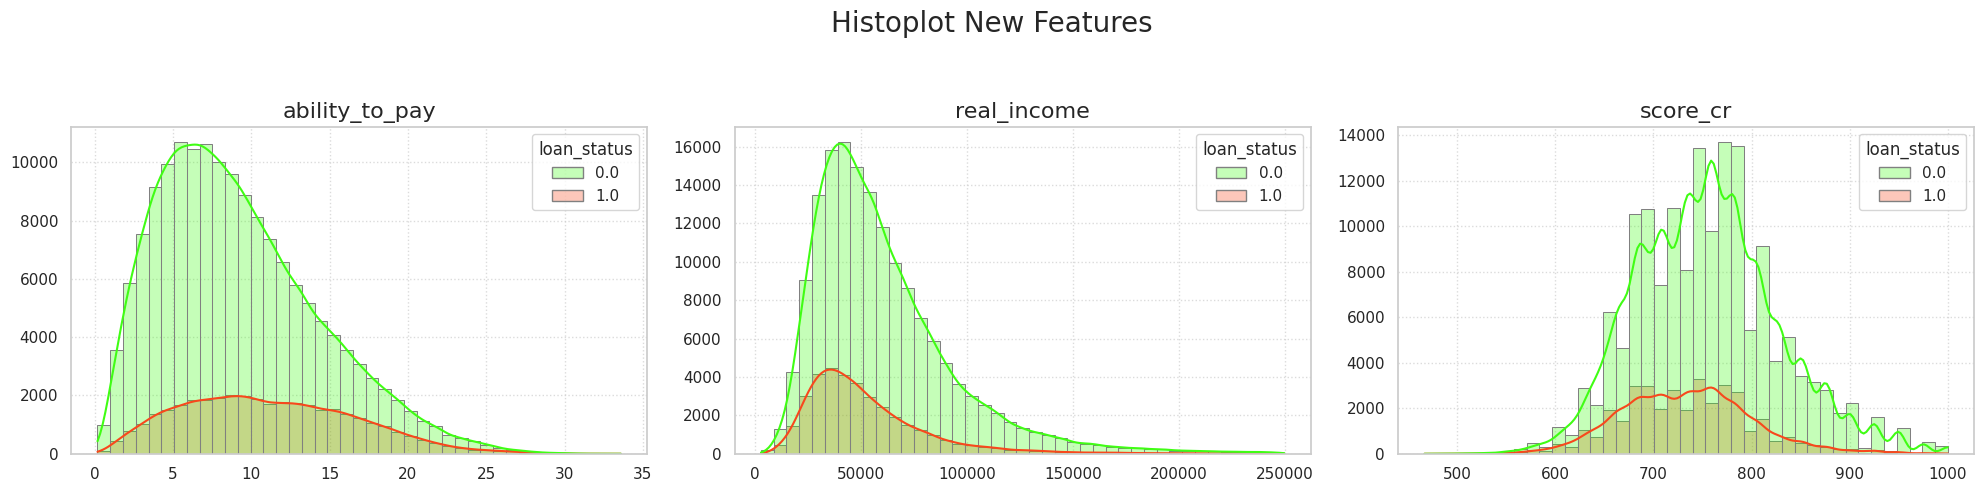

In [0]:
new_columns = ['ability_to_pay', 'real_income', 'score_cr']

plt.rc('font', size = 12)
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax = ax.flatten()
grid_style = dict(alpha = 0.7, linestyle = 'dotted')
for i, col_list in enumerate(new_columns):
    sns.histplot(
        data = datacorr,
        x = col_list,
        bins = bins,
        hue = 'loan_status',
        #multiple = 'fill',
        kde = True,
        alpha = 0.3,
        edgecolor = 'grey',
        palette = ['#40fd14', '#f8481c'],
        ax = ax[i]
        
        )
    sns.set(style = 'whitegrid')
    ax[i].grid(axis = 'y', which = 'major', **grid_style)
    ax[i].grid(axis = 'x', which = 'major', **grid_style)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'\n{col_list}', fontsize = 16)

plt.suptitle('Histoplot New Features', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()

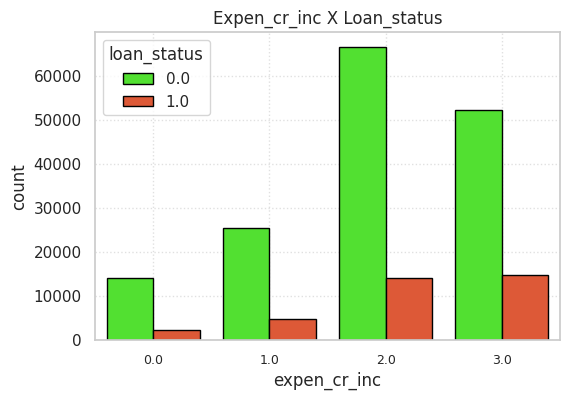

In [0]:
# Data collect
data_ax = datacorr
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

grid_style = dict(alpha = 0.6, linestyle = 'dotted')

sns.countplot(
    data = data_ax,
    x = 'expen_cr_inc',
    edgecolor = 'black',
    hue = 'loan_status',
    palette = ['#40fd14', '#f8481c'],
    ax = ax
    
    )
sns.set(style = 'whitegrid')

ax.grid(axis = 'y', which = 'major', **grid_style)
ax.grid(axis = 'x', which = 'major', **grid_style)
#ax.set_xlabel(None)
#ax.set_ylabel(None)
ax.set_title('Expen_cr_inc X Loan_status', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 9)

plt.show()

### Insights:

* It can be seen that the **ability_to_pay** column has an interesting relationship with payment status compared to the other variables. In a way, it is related to the variables involving the borrower’s income and expenses. The purpose of this column was to add filters to our data. Basically, it is a calculation performed with the data from the dataset itself, considering the customer’s monthly income and debt.

* The **real_income** column maintains the same distribution as the ‘annual_inc’ column, but with the customer’s debts subtracted. This gives us clearer information about the borrower.

* The **expen_cr_inc** variable provides us with information about the profile of this institution's customers. When analyzing the **purpose** column, we can conclude that most of the loans requested by borrowers are for debt_consolidation and credit_card, which leads us to conclude that most of the customers had some outstanding balance on their revolving balance, so they resorted to a loan to be able to pay it off. With this, we can see and understand why some borrowers had more than 300% of their income committed to the revolving balance.

* The **score_cr** variable shows us that higher scores have a lower default rate, while lower scores have a higher default rate.

#### Note:

* I will be adding these columns to the training and testing data right after handling the null data and checking for outliers.

* Some of the new features are correlated with the features that were extracted, which is natural. During training, the performance of each of them will be evaluated and then the features that best contribute to the model will be maintained.

### Checking for null data

Train data

In [0]:
check_null_data(train)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.08 0.0 0.0 0.03 0.0 32.59 32.59 32.59 0.0

Test data

In [0]:
check_null_data(test)

loan_amnt funded_amnt term int_rate installment grade sub_grade emp_length home_ownership annual_inc verification_status loan_status purpose addr_state dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc initial_list_status collections_12_mths_ex_med acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

### Note: 

* We have the columns:  **revol_util**, **tot_coll_amt**, 
 **tot_cur_bal** and **total_rev_hi_lim** with null data. I will choose not to drop them and instead impute these values ​​with the median. This choice is appropriate considering that we have highly skewed data and some outliers in our dataset.

### Checking the outliers

* I will be defining a function to check for the presence of outliers in the columns that will be selected for training and testing.

In [0]:
def find_outliers(dataset, col_num):
    
    """
    Identifies outliers in a dataset based on specified numeric columns.

    Args:
        dataset (DataFrame): The input dataset.
        col_num (list): List of column names containing numeric data.

    Returns:
        None
    """
 

    # List of outliers
    out_col, amount_outliers = [], []

    # Size dataset
    size_dataset = dataset.count()

    # Calculating and checking Outliers
    for column in dataset.columns:
        if column in col_num:

            quantiles = dataset.approxQuantile(column, [0.25, 0.75], 0)

            Q1 = quantiles[0] # Lower quartile
            Q3 = quantiles[1] # Upper quartile
            IQR = Q3 - Q1 # Difference between the third quartile and the first quartile
            
            # Multiplier
            multiplier = 1.5
            
            # Lower bound and Upper bound
            lower_bound =  Q1 - multiplier * IQR
            upper_bound =  Q3 + multiplier * IQR
            
            # Filter and count Outliers
            dataset = dataset.filter(F.col(column).isNotNull()) \
                .withColumn(f'{column}_out', F.when((F.col(column) < lower_bound) | (F.col(column) > upper_bound), None).otherwise(F.col(column)))
            
            # Calculating Outlier Percentages
            n_outliers = dataset.filter(F.col(f'{column}_out').isNull()).count()
            percentage_out = round((n_outliers / size_dataset) * 100, 2)
            
            # List of Outliers
            out_col.append(column)
            amount_outliers.append(percentage_out)
            
        else:
            continue
    
    # Output
    # Creating dataset to visualize the count of outliers 

    print('\nTotal outlier count by columns')
    columns = out_col
    data_out = tuple(amount_outliers)
    amount_data_out = spark.createDataFrame([data_out], columns)
    amount_data_out.display()

    return None 

Selected columns that will be sent to training

In [0]:
# Columns to analyze
numerical_colums = [
    'loan_amnt','int_rate','installment','annual_inc','dti', 'mo_earliest_cr_line','open_acc','revol_bal','revol_util','total_acc','tot_cur_bal','total_rev_hi_lim', 'mo_earliest_cr_line', 'total_acc', 'open_acc', 'inq_last_6mths',
    ]
find_outliers(train, numerical_colums)


Total outlier count by columns


loan_amnt int_rate installment annual_inc dti inq_last_6mths open_acc revol_bal revol_util total_acc tot_cur_bal total_rev_hi_lim mo_earliest_cr_line 2.88 0.75 2.68 4.82 0.0 8.99 1.99 4.83 0.0 1.87 2.01 3.64 2.28

### Note:

* We have a significant number of outliers in our data. Some columns have a significantly higher number of outliers due to their skewed distribution.

* I will choose to keep the outliers because they are part of the natural distribution of the data in this dataset. The data is mostly skewed to the right, which leads to us identifying a higher number of outliers because this distribution has a greater concentration in the numbers with lower values ​​and a much smaller distribution in the numbers with higher values.

## Final data processing

*
**Irrelevant data**:

  * I will remove from the training and test sets the columns that were excluded according to the above analyses.

* **Null or missing data**:

  * **Numeric data**: The numeric data from the columns:

    * revol_util

    * tot_coll_amt

    * tot_cur_bal

    * total_rev_hi_lim

  * will be imputed using the median, a sensible choice for filling in missing data, especially considering the presence of outliers in the numeric data in this set.

  * **Categorical data**: We have no missing values ​​in our categorical columns.

  * **Note**:

    I chose to impute the null data to preserve the natural distribution of the data in this dataset.

* **New features**:

  * New columns will be created right after the null data is discarded, preventing these new columns from containing null data.

* **Correlated variables**:

  * These columns will be removed from our training data, so that there is no noise caused by correlation in our training since they are correlated with the new features:

    * revolution_bal

    * annual_inc

  * **loan_amnt x installment**:


  * I will choose to remove the **installment** column and keep the **loan_amnt** column, since this column has a stronger relationship with the payment statuses.

In [0]:
def final_processing(dataset):

    """
    A function for preprocessing data in a DataFrame.

    This function performs several preprocessing operations, including:
    - Null imputation: uses the median for numeric columns and the mode for categorical columns.
    - Categorical adjustments: recategorizing values ​​in categorical columns, such as 'home_ownership'.
    - Variable binning: creating categories based on numeric thresholds in specific columns.
    - Creating new columns: deriving new features, such as 'real_income', 'ability_to_pay', and 'expen_cr_inc'.
    - Calculating credit score (score_cr): calculating a score based on multiple features.

    Parameters:
    ----------
    datset: Pyspark.DataFrame
    The DataFrame that contains the data to be preprocessed.

    Returns:
    ----
    train, test
    Returns the Pyspark.DataFrame split between training and test data with the changes and applied data cleaning and processing processes.

    """
    # Splitting training and test data

    # Defining separation margin
    # Train
    train = dataset
    train = train.withColumn('drop', F.when(F.col('mo_issue_d') > 17, False).otherwise(True))
    # Test
    test = dataset
    test = test.withColumn('drop', F.when(F.col('mo_issue_d') <= 17, False).otherwise(True))
    
    # Train
    train = train.filter(F.col('drop') == False)
    # Test
    test = test.filter(F.col('drop') == False)

    
    # Imput Null data
    num_input = [
        'revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
    ] 
       
    # Numeric cols
    for column in num_input:    
        # Median of column
        median = train.filter(F.col(column).isNotNull()).approxQuantile(column, [0.50], 0)[0]
        
        # Imputing to the median in null values in training and test data
        
        # Train data
        train = train.withColumn(column, F.when(F.col(column).isNull(), median).otherwise(F.col(column)))
        # Test data
        test = test.withColumn(column, F.when(F.col(column).isNull(), median).otherwise(F.col(column)))

    # Ajuting column  home_ownership
    home_list = ['NONE', 'ANY', 'OTHER']
    # Train
    train = train.withColumn('home_ownership', F.when(F.col('home_ownership').isin(home_list), 'RENT').otherwise(F.col('home_ownership')))
    # Test
    test = test.withColumn('home_ownership', F.when(F.col('home_ownership').isin(home_list), 'RENT').otherwise(F.col('home_ownership')))

    # Ajuting column  purpose
    purpose_list = ['educational', 'renewable_energy']
    # Train
    train = train.withColumn('purpose', F.when(F.col('purpose').isin(purpose_list), 'other').otherwise(F.col('purpose')))
    # Test
    test = test.withColumn('purpose', F.when(F.col('purpose').isin(purpose_list), 'other').otherwise(F.col('purpose')))
    
    # Binning columns
    binning_cols = ['tot_coll_amt', 'delinq_2yrs', 'pub_rec', 'inq_last_6mths', ]

    for column in binning_cols:
        train = train.withColumn(column, F.when(F.col(column) <= 0, 'A').otherwise('B'))
        test = test.withColumn(column, F.when(F.col(column)  <= 0, 'A').otherwise('B'))

    # Adding new columns

    # real_income
    # Train
    train = train.withColumn('real_income', F.round((F.col('annual_inc') - (F.col('annual_inc') * F.col('dti')) / 100), 2))
    # Test
    test = test.withColumn('real_income', F.round((F.col('annual_inc') - (F.col('annual_inc') * F.col('dti')) / 100), 2))
    
    # ability_to_pay
    # Train
    train = train.withColumn('ability_to_pay', F.round(((F.col('installment') / (F.col('real_income') / 12)  * 100 )), 2))
    # Test
    test = test.withColumn('ability_to_pay', F.round(((F.col('installment') / (F.col('real_income') / 12)  * 100 )), 2))
    
    # expen_cr_inc
    # Train
    train = train.withColumn('mo_income', F.round(F.col('annual_inc') / 12, 2)) \
        .withColumn('expen_cr_inc', F.when((F.round(F.col('revol_bal') / (F.col('mo_income')), 2) <= 0.5) , 'A').otherwise(None)) \
        .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 0.5) & 
                                        (F.col('revol_bal') / (F.col('mo_income')) <= 1.2), 'B').otherwise(F.col('expen_cr_inc'))) \
        .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 1.2) & 
                                        (F.col('revol_bal') / (F.col('mo_income')) <= 3), 'C').otherwise(F.col('expen_cr_inc'))) \
        .withColumn('expen_cr_inc', F.when(F.col('revol_bal') / (F.col('mo_income')) > 3 , 'D').otherwise(F.col('expen_cr_inc')))
    
    # Test
    test = test.withColumn('mo_income', F.round(F.col('annual_inc') / 12, 2)) \
        .withColumn('expen_cr_inc', F.when((F.round(F.col('revol_bal') / (F.col('mo_income')), 2) <= 0.5) , 'A').otherwise(None)) \
        .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 0.5) & 
                                        (F.col('revol_bal') / (F.col('mo_income')) <= 1.2), 'B').otherwise(F.col('expen_cr_inc'))) \
        .withColumn('expen_cr_inc', F.when((F.col('revol_bal') / (F.col('mo_income')) > 1.2) & 
                                        (F.col('revol_bal') / (F.col('mo_income')) <= 3), 'C').otherwise(F.col('expen_cr_inc'))) \
        .withColumn('expen_cr_inc', F.when(F.col('revol_bal') / (F.col('mo_income')) > 3 , 'D').otherwise(F.col('expen_cr_inc'))) 
    

    # score_cr
    # Payment history: 350 points divided by 3 features('delinq_2yrs', 'collections_12_mths_ex_med', 'tot_coll_amt') = 166.66.
    weigth_pay_history = (350 / 3)

    # Amounts due: 350 points divided by 3 features('expen_cr_inc', 'revol_util', 'dti') = 100.
    weigth_amnt_due = (300 / 3)

    # Length of credit: 150 points only feature('credit_time') = 150.
    weigth_length_cr = 150

    # Credit mix: 100 points only feature('total_acc') = 100.
    weigth_cr_mix = 100

    # New credit: 100 points divided by 2 features('open_acc', 'inq_last_6mths') = 50.
    weigth_new_cr = (100 / 2)

    # Train
    train = train.withColumn('score_cr', F.lit(0)) \
        .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('pub_rec') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('pub_rec') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'A', 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'B', 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'C', 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'D', 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('dti') <= 10, 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('dti') <= 20) & ( F.col('dti') > 10)), 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('dti') <= 30) & (F.col('dti') > 20)), 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('dti') > 30, 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('revol_util') <= 30, 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('revol_util') <= 60) & ( F.col('revol_util') > 30)), 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('revol_util') <= 90) & (F.col('revol_util') > 60)), 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('revol_util') > 90, 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') > 150, 
                                        F.col('score_cr') + (weigth_length_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') <= 150, 
                                        F.col('score_cr') + (weigth_length_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('total_acc') > 20, 
                                        F.col('score_cr') + (weigth_cr_mix)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('total_acc') <= 20, 
                                        F.col('score_cr') + (weigth_cr_mix / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('open_acc') <= 10, 
                                        F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('open_acc') > 10, 
                                        F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 'A', 
                                        F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 'B', 
                                        F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.round(F.col('score_cr'), 2))

    # Test
    test = test.withColumn('score_cr', F.lit(0)) \
        .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('delinq_2yrs') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('pub_rec') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('pub_rec') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 'A', 
                                        F.col('score_cr') + (weigth_pay_history)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('tot_coll_amt') == 'B', 
                                        F.col('score_cr') + (weigth_pay_history / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'A', 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'B', 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'C', 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('expen_cr_inc') == 'D', 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('dti') <= 10, 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('dti') <= 20) & ( F.col('dti') > 10)), 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('dti') <= 30) & (F.col('dti') > 20)), 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('dti') > 30, 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('revol_util') <= 30, 
                                        F.col('score_cr') + (weigth_amnt_due)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('revol_util') <= 60) & ( F.col('revol_util') > 30)), 
                                        F.col('score_cr') + (weigth_amnt_due / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(((F.col('revol_util') <= 90) & (F.col('revol_util') > 60)), 
                                        F.col('score_cr') + (weigth_amnt_due / 3)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('revol_util') > 90, 
                                        F.col('score_cr') + (weigth_amnt_due / 4)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') > 150, 
                                        F.col('score_cr') + (weigth_length_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('mo_earliest_cr_line') <= 150, 
                                        F.col('score_cr') + (weigth_length_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('total_acc') > 20, 
                                        F.col('score_cr') + (weigth_cr_mix)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('total_acc') <= 20, 
                                        F.col('score_cr') + (weigth_cr_mix / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('open_acc') <= 10, 
                                        F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('open_acc') > 10, 
                                        F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 'A', 
                                        F.col('score_cr') + (weigth_new_cr)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.when(F.col('inq_last_6mths') == 'B', 
                                        F.col('score_cr') + (weigth_new_cr / 2)).otherwise(F.col('score_cr'))) \
        .withColumn('score_cr', F.round(F.col('score_cr'), 2))

    # Dropping irrelevant columns
    var_to_discart = [
        'funded_amnt', 'acc_now_delinq', 'collections_12_mths_ex_med', 'addr_state', 'mo_income', 'installment', 'annual_inc', 'grade', 'verification_status', 'revol_bal', 'drop', 'mo_issue_d' 
    ] 
    # Train
    train = train.drop(*var_to_discart)
    # Test
    test = test.drop(*var_to_discart)

    # Return function
    return train, test

In [0]:
train_final, test_final = final_processing(df)

### Salving data training an data test

In [0]:
# Train
# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Gold/train'
file_type = 'parquet'

# Mode
mode = 'overwrite'

# Options Parquet Files
compression = 'gzip'

# Writing dataset
train_final.write.format(file_type) \
    .option('compression', compression) \
    .mode(mode) \
    .save(file_location) 

# Test
# File location and type
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Gold/test'
file_type = 'parquet'

# Mode
mode = 'overwrite'

# Options Parquet Files
compression = 'gzip'

# Writing dataset
test_final.write.format(file_type) \
    .option('compression', compression) \
    .mode(mode) \
    .save(file_location) 

# Reading Train
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Gold/train'
train_final = spark.read.format(file_type) \
    .option('compression', compression) \
    .load(file_location)

# Reading Test
file_location = 'dbfs:/FileStore/Data_Science_Credit_Risk_Analysis-Lending_Club/Datasets/Gold/test'
test_final = spark.read.format(file_type) \
    .option('compression', compression) \
    .load(file_location)

## Final analysis of statistical relationships with the 'loan_status' variable

Checking train dataset

In [0]:
# The size dataset
train_final.count(), len(train_final.columns)

(195422, 24)

In [0]:
train_final.printSchema()

root
 |-- loan_amnt: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- inq_last_6mths: string (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- tot_coll_amt: string (nullable = true)
 |-- tot_cur_bal: double (nullable = true)
 |-- total_rev_hi_lim: double (nullable = true)
 |-- mo_earliest_cr_line: integer (nullable = true)
 |-- real_income: double (nullable = true)
 |-- ability_to_pay: double (nullable = true)
 |-- expen_cr_inc: string (nullable = true)
 |-- sco

In [0]:
check_null_data(train_final)

loan_amnt term int_rate sub_grade emp_length home_ownership loan_status purpose dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_util total_acc initial_list_status tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line real_income ability_to_pay expen_cr_inc score_cr 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Checking test dataset

In [0]:
# The size dataset
test_final.count(), len(train_final.columns)

(57509, 24)

In [0]:
test_final.printSchema()

root
 |-- loan_amnt: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- inq_last_6mths: string (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- tot_coll_amt: string (nullable = true)
 |-- tot_cur_bal: double (nullable = true)
 |-- total_rev_hi_lim: double (nullable = true)
 |-- mo_earliest_cr_line: integer (nullable = true)
 |-- real_income: double (nullable = true)
 |-- ability_to_pay: double (nullable = true)
 |-- expen_cr_inc: string (nullable = true)
 |-- sco

In [0]:
check_null_data(test_final)

loan_amnt term int_rate sub_grade emp_length home_ownership loan_status purpose dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_util total_acc initial_list_status tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line real_income ability_to_pay expen_cr_inc score_cr 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

#### Indexing columns to calculate correlation

In [0]:
categorical_nominals = ['home_ownership', 'purpose', 'initial_list_status', 'tot_coll_amt', 'delinq_2yrs', 'pub_rec', 'inq_last_6mths',]

categorical_ordinals = [
    'term', 'sub_grade', 'expen_cr_inc','emp_length',
]

In [0]:
numeric_var = [
    'loan_amnt', 'int_rate', 'dti', 'open_acc', 'revol_util', 'total_acc','tot_cur_bal', 'total_rev_hi_lim', 'real_income', 'ability_to_pay', 'score_cr', 'mo_earliest_cr_line', 'loan_status',

    ]

In [0]:
categorical_ordinals.remove('emp_length') # The column will be indexed manually
data_corr = indexer_cols(train_final, categorical_nominals, categorical_ordinals)
categorical_ordinals.append('emp_length') # The column will be indexed manually

# loan_status
data_corr = data_corr.withColumn('loan_status', F.when(F.col('loan_status') == 'Fully Paid', 0).otherwise(1).cast(IntegerType()))

# emp_length
data_corr = data_corr.withColumn('emp_length', F.when(F.col('emp_length') == '0', 0).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '1', 1).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '2', 2).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '3', 3).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '4', 4).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '5', 5).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '6', 6).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '7', 7).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '8', 8).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '9', 9).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.when(F.col('emp_length') == '10', 10).otherwise(F.col('emp_length'))) \
  .withColumn('emp_length', F.col('emp_length').cast(IntegerType())) 
  
data_corr.limit(10).display()

loan_amnt term int_rate sub_grade emp_length home_ownership loan_status purpose dti delinq_2yrs inq_last_6mths open_acc pub_rec revol_util total_acc initial_list_status tot_coll_amt tot_cur_bal total_rev_hi_lim mo_earliest_cr_line real_income ability_to_pay expen_cr_inc score_cr 5000.0 0.0 10.65 6.0 10 1.0 0 1.0 27.65 0.0 0.0 3 0.0 83.7 9 0.0 0.0 79803.0 22100.0 323 17364.0 11.26 3.0 716.67 2500.0 1.0 15.27 13.0 0 1.0 1 6.0 1.0 0.0 0.0 3 0.0 9.4 4 0.0 0.0 79803.0 22100.0 152 29700.0 2.42 1.0 875.0 2400.0 0.0 15.96 14.0 10 1.0 0 5.0 8.72 0.0 0.0 2 0.0 98.5 10 0.0 0.0 79803.0 22100.0 121 11183.63 9.05 2.0 708.33 10000.0 0.0 13.49 10.0 10 1.0 0 2.0 20.0 0.0 0.0 10 0.0 21.0 37 0.0 0.0 79803.0 22100.0 190 39360.0 10.34 2.0 858.33 5000.0 0.0 7.9 3.0 3 1.0 0 8.0 11.2 0.0 0.0 9 0.0 28.3 12 0.0 0.0 79803.0 22100.0 85 31968.0 5.87 2.0 733.33 3000.0 0.0 18.64 20.0 9 1.0 0 6.0 5.35 0.0 0.0 4 0.0 87.5 4 0.0 0.0 79803.0 22100.0 59 45432.0 2.89 2.0 716.67 5600.0 1.0 21.28 26.0 4 2.0 1 5.0 5.55 0.0 0.0 11 0.0 32.6 13 0.0 0.0 79803.0 22100.0 92 37780.0 4.84 2.0 708.33 5375.0 1.0 12.69 9.0 0 1.0 1 2.0 18.08 0.0 1.0 2 0.0 36.5 3 0.0 0.0 79803.0 22100.0 87 12288.0 11.86 3.0 700.0 6500.0 1.0 14.65 12.0 5 2.0 0 0.0 16.12 0.0 0.0 14 0.0 20.6 23 0.0 0.0 79803.0 22100.0 167 60393.6 3.05 1.0 850.0 12000.0 0.0 12.69 9.0 10 2.0 0 0.0 10.78 0.0 1.0 12 0.0 67.1 34 0.0 0.0 79803.0 22100.0 266 66915.0 7.22 3.0 783.33

### Numeric variables

In [0]:
datacorr = data_corr.toPandas()
correlation_matrix = datacorr[numeric_var].corr(method = 'spearman', numeric_only = True).abs()


In [0]:
correlation_matrix['loan_status'].sort_values(ascending = False)

loan_status            1.000000
int_rate               0.233229
ability_to_pay         0.143408
score_cr               0.109220
real_income            0.106148
dti                    0.105098
revol_util             0.090274
loan_amnt              0.061605
tot_cur_bal            0.057755
total_rev_hi_lim       0.040759
total_acc              0.026106
mo_earliest_cr_line    0.023245
open_acc               0.015811
Name: loan_status, dtype: float64

### Categorical variables

In [0]:
X = datacorr[['home_ownership', 'purpose', 'initial_list_status', 'tot_coll_amt', 'delinq_2yrs', 'pub_rec', 'inq_last_6mths', 'term', 'sub_grade', 'expen_cr_inc','emp_length',]]
y = datacorr['loan_status']
# Chi2 and P_values
chi2_stat, p_values = chi2(X, y)

# Show Results
chi2_results = pd.DataFrame({'*feature': X.columns, '*chi2_stat': chi2_stat, '*p_value': p_values})
print(chi2_results)

               *feature    *chi2_stat      *p_value
0        home_ownership    194.089358  4.071564e-44
1               purpose     86.602399  1.326861e-20
2   initial_list_status     12.346698  4.417672e-04
3          tot_coll_amt     73.869495  8.345611e-18
4           delinq_2yrs     33.568560  6.879577e-09
5               pub_rec     19.022551  1.291827e-05
6        inq_last_6mths    275.794820  6.194440e-62
7                  term   4326.733479  0.000000e+00
8             sub_grade  43546.894076  0.000000e+00
9          expen_cr_inc    340.495126  4.977843e-76
10           emp_length     13.079114  2.986066e-04


## EDA conclusion


* We have a significant rate of non-performing loans at this bank. Overall, approximately 2 in 10 customers have possibly defaulted on their loans.

* I believe that the most appropriate solution for this data is to seek a balance between the **prediction of non-performing loans and the loans that will be paid**. This is because, if there is a **prediction error in either of these situations**, this can lead to potential losses for the bank.

* Among all the variables in this dataset, the one that has the greatest **relation** with the payment status is **sub_grade**. This may indicate that the bank is performing an adequate and assertive classification regarding the risks of the loans.

* We also have the variable **int_rate**, which has a strong **correlation** with the payment statuses; of the numerical variables, it is the one that has the most relevance with our payment statuses in this dataset.

* Loans paid in 36 installments are more likely to be paid than loans paid in 60 months. There is a strong correlation with payment status, as loans that were repaid over 60 months have a much higher default rate than loans that were repaid over 36 months.

* The bank’s source of income verifications do not reflect their true purpose, as loans that were not verified by the bank had a higher payment rate than loans that were verified.

* Borrowers’ debt-to-income ratio, or DTI, has been shown to be strongly correlated with their payment status. Borrowers with more debt have a higher default rate.

* Borrowers with zero delinquencies or collection history are significantly more committed to repaying their loans than those with a history of delinquency.

* We have data with highly skewed and asymmetric distributions. Most of them have distributions that are skewed to the right, indicating that the highest amounts are distributed in smaller amounts than the others. That is, of the continuous numerical variables, the values ​​in income, limit or account balance, for example, tend to be made up of lower values.

* Employment duration, contrary to expectations, did not show a strong relationship with loan status. It does have a significant relationship, but compared to the others, it is slightly below expectations.

* Borrowers with **mortgaged homes** had a satisfactory rate of payment of their loans compared to borrowers with **rented homes** or **owned homes**.

* The variable **tot_coll_amt** showed a moderate but important significance with payment status. After treating the column, transforming it into a categorical column, the labels of type 'A' are borrowers who have never had to pay for any debt or collection, and the labels of type 'B' are borrowers who have already paid for debt collections in the past.

* The variable **delinq_2yrs**, after being transformed into a categorical column, became relevant and significant with the payment status. The labels of type 'A' are borrowers who, in the last 2 years, did not commit any financial delinquency, and the labels of type 'B' are borrowers who committed at least one delinquency in the last 2 years.

* The variable **pub_rec** provides information about the borrower's adverse public records. The labels of type 'A' are borrowers who did not have any adverse public records in the last 12 months, and the labels of type 'B' are borrowers who had some adverse public record in the last 12 months. It was shown to have a low but significant relationship with the payment status.

* The variable **inq_last_6mths** provides information about the borrowers' credit inquiries, which may reflect attempts to acquire new credit. Like the other columns, it was transformed into a categorical variable, where labels of type 'A' are borrowers who have not made any inquiries in the last 6 months, and labels of type 'B' are borrowers who have made at least one inquiry in the last 6 months. This variable showed a strong relevance and significance with the payment status. Borrowers who have not had any credit inquiries in the last 6 months were significantly less likely to default than the others.

* The variable **expen_cr_inc** was a reinterpretation of the variable **revol_bal**, which considered the borrower's monthly income in relation to his/her current revolving balance, considering how much of his/her monthly salary was committed in relation to his/her revolving balance. The classes 'A', 'B', 'C' and 'D' were created. This variable proved to have a strong relevance and significance with the payment status. Borrowers with the classifications 'A' and 'B' were shown to be less likely to default compared to the other borrowers.

* The variable **ability_to_pay** has been shown to have a strong correlation with payment status. This variable takes into account the borrower's monthly income and also considers their debt. This calculates the percentage of commitment of the loan installment released with the monthly salary, with previous debts already discounted. Borrowers with a lower percentage of commitment in their salaries in this column have been shown to be less delinquent than others.

* The variable **score_cr** is a column that takes into account the principles and some calculations of the **Fico** score. This variable is the result of a calculation that considers only the variables present in this dataset, and has been shown to have a significant correlation with payment status. Borrowers with the highest scores had a lower delinquency rate compared to borrowers with the lowest scores.

* The variable **real_income** considers the annual income with the borrower's debts already subtracted. It has also been shown to have a relevant significance with payment status.

* The **revol_util** variable provides information on the percentage of revolving credit utilization in relation to its available limit. It has shown to have considerable significance with payment status, where borrowers with a lower utilization rate also had a lower default rate.

* The **annual_inc** variable has shown to have a significant relationship with payment status, although the **real_income** variable has shown to be more significant during the analyses. 

* The **tot_cur_bal** variable provides information on the total balance of all the borrower's accounts. It has shown to have a low, but significant, relationship with payment status. Borrowers with a much lower balance were more likely to default than the others.

* The **funded_amnt** variable has a low but significant presence with payment statuses. It can be seen that loans with lower amounts have a lower default rate than loans with higher amounts.


* The **total_rev_hi_lim** variable represents the value of the borrower's total revolving credit limit. It has shown to have a low brightness with payment statuses, but there is specific significance. It can be seen that borrowers with a lower revolving credit limit have a higher default rate.

* The **total_acc** variable has a low but significant presence with payment statuses. It provides us with information about the borrower's credit history, including the total number of accounts on the borrower's records.

* The **mo_earliest_cr_line** variable also provides information on the borrower's credit history. It is possible to observe that borrowers with a longer time since opening their first line of credit have a lower default rate than others.

* The **open_acc** variable has a low relationship with payment status, but contextually it provides us with important information. It reports the number of credit accounts opened in recent months by month, which may indicate a possible urgent need for credit, resulting in potential default.

* Most of the data selected for processing is of good quality. Few of them were incomplete or had invalid data. We have some atypical values, but, as mentioned previously, some of them are part of the natural distribution of this data.

* The **ability_to_pay** variable has been shown to have a strong correlation with payment status. This variable takes into account the borrower's monthly income and also considers their debts. This calculates the percentage of the loan installment committed to the monthly salary, with previous debts already discounted. Borrowers with a lower percentage of their salary commitment in this column have been shown to be less delinquent than others.

* The **score_cr** variable is a column that takes into account the principles and some calculations of the **Fico** score. This variable is the result of a calculation that considers only the variables present in this data set and has been shown to have a significant correlation with payment status. Borrowers with the highest scores had a lower delinquency rate compared to borrowers with the lowest scores.

* The **real_income** variable considers the borrower's annual income with the borrower's debts already subtracted. It has also been shown to have a relevant significance with payment status.

* The **revol_util** variable provides information on the percentage of revolving credit utilization in relation to the available limit. It has been shown to have considerable significance with payment status, where borrowers with a lower utilization rate also had a lower delinquency rate.

* The **annual_inc** variable has been shown to have a significant relationship with payment status, although the **real_income** variable has been shown to be more significant during the analyses.

* The **tot_cur_bal** variable provides information on the total balance of all the borrower’s accounts. It has been shown to have a low but significant relationship with payment status. Borrowers with a much lower balance were more likely to default than others.

* The **loan_amnt** variable has a low but significant presence with payment status. It can be seen that loans with smaller amounts have a lower delinquency rate than loans with larger amounts.

* The **total_rev_hi_lim** variable represents the value of the borrower’s total revolving credit limit. It has been shown to have a low correlation with payment status, but there is specific significance. It can be seen that borrowers with a lower revolving credit limit have a higher default rate.

* The variable **total_acc** has a low but significant presence with payment status. It provides us with information about the borrower’s credit history, including the total number of accounts on the borrower’s records.

* The variable **mo_earliest_cr_line** also provides information about the borrower’s credit history. It can be seen that borrowers with a longer time since opening their first line of credit have a lower default rate than others.

* The variable **open_acc** has a low correlation with payment status, but contextually it provides us with important information. It reports the number of credit accounts opened in the last few months, which may indicate a possible urgent need for credit, resulting in potential default.

* Most of the data selected for processing is of good quality. Few of them were incomplete or had invalid data. We have some outliers, but as mentioned earlier, some of them are part of the natural distribution of this data.